<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

#  Adaptation Statistique d'un Modèle de Prévision du Pic d'Ozone avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

**Résumé**: Exploration puis modélisation de données climatiques en utilisant R. L'objectif est de prévoir pour le lendemain un possible dépassement d'un seuil de concentration en ozone à partir d'une prévision déterministe sur un maillage grossier et de variables climatiques locales. Estimation par différentes méthodes: régression [linéaire](http://wikistat.fr/pdf/st-m-app-select.pdf) ou   [logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf), [arbre de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf), [agrégation de modèle](http://wikistat.fr/pdf/st-m-app-agreg.pdf), [SVM](http://wikistat.fr/pdf/st-m-app-svm.pdf). Comparaison des [erreurs de prévision](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf) sur un échantillon test puis des courbes ROC. Industrialisaiton avec le package `caret` et itération sur plusieurs échantillons tests pour analyser la distribution de l'erreur de prévision.

**Avertissement** Ce tutoriel est découpé en 5 séances / épisodes de travaux dirigés syncronisées avec le cours d'apprentissage machine. Réfléchir aux réponses aux questions marquées **Q** issues du sujet d'examen.

## Introduction

L'objectif, sur ces données, est d'améliorer la prévision déterministe (MOCAGE), calculée par les services de MétéoFrance,  de la concentration d'ozone dans certaines stations de prélèvement.  Il s'agit d'un problème dit d'*adaptation statistique* d'une prévision locale de modèles à trop grande échelle en s'aidant d'autres variables également gérées par MétéoFrance, mais à plus petite échelle (température, force du vent...). C'est une première façon de concevoir de l'l'*IA hybride* entre un modèle déterministe et un algorithme d'apprentissage automatique. Plus précisément, deux variables peuvent être prévues : soit la concentration quantitative d'ozone, soit le dépassement (qualitatif) d'un certain seuil fixé à 150 $\mu g$. Dans chaque cas, deux approches sont considérées : soit prévoir la *concentration quantitative* puis en déduire l'éventuel dépassement ou bien prévoir directement le *dépassement*. Dans le premier cas, il s'agit d'abord d'une *régression* tandis que dans le deuxième il s'agit d'un problème de *discrimination* à deux classes ou de régression logistique. 

La question posée est donc: quelles sont les meilleures méthodes et stratégies pour prévoir la concentration d'ozone du lendemain d'une part et l'occurrence d'un pic de pollution d'autre part.

On se propose de tester différentes méthodes : régression [logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf), [réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf), [arbre de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [agrégation d'arbres](http://wikistat.fr/pdf/st-m-app-agreg.pdf) (bagging, boosting, random forest), [SVM](http://wikistat.fr/pdf/st-m-app-svm.pdf).  L'objectif final, à ne pas perdre de vue, est la comparaison de ces méthodes afin de déterminer la plus efficace pour répondre au problème de prévision. Ceci passe par la mise en place d'un protocole très strict afin de s'assurer d'un minimum d'objectivité pour cette comparaison.

Toutes les opérations sont réalisées dans R avec l'appui de bibliothèques complémentaires éventuellement à télécharger (`ROCR, mlbench, MASS, boot, class, e1071, rpart, partykit, nnet, ipred, gbm, randomForest, caret`). 

L'objectif, sur ces données, est d'améliorer la prévision déterministe (MOCAGE), calculée par les services de MétéoFrance,  de la concentration d'ozone dans certaines stations de prélèvement.  Il s'agit d'un problème dit d'*adaptation statistique* d'une prévision locale de modèles à trop grande échelle en s'aidant d'autres variables également gérées par MétéoFrance, mais à plus petite échelle (température, force du vent...). Plus précisément, deux variables peuvent être prévues : soit la concentration quantitative d'ozone, soit le dépassement (qualitatif) d'un certain seuil fixé à 150 $\mu g$. Dans chaque cas, deux approches sont considérées : soit prévoir la *concentration quantitative* puis en déduire l'éventuel dépassement ou bien prévoir directement le *dépassement*. Dans le premier cas, il s'agit d'abord d'une *régression* tandis que dans le deuxième il s'agit d'un problème de *discrimination* à deux classes ou de régression logistique. 
L'objectif, sur ces données, est d'améliorer la prévision déterministe (MOCAGE), calculée par les services de MétéoFrance,  de la concentration d'ozone dans certaines stations de prélèvement.  Il s'agit d'un problème dit d'*adaptation statistique* d'une prévision locale de modèles à trop grande échelle en s'aidant d'autres variables également gérées par MétéoFrance, mais à plus petite échelle (température, force du vent...). Plus précisément, deux variables peuvent être prévues : soit la concentration quantitative d'ozone, soit le dépassement (qualitatif) d'un certain seuil fixé à 150 $\mu g$. Dans chaque cas, deux approches sont considérées : soit prévoir la *concentration quantitative* puis en déduire l'éventuel dépassement ou bien prévoir directement le *dépassement*. Dans le premier cas, il s'agit d'abord d'une *régression* tandis que dans le deuxième il s'agit d'un problème de *discrimination* à deux classes ou de régression logistique. 

Python (consulter le [calepin](https://github.com/wikistat/Apprentissage/blob/master/Pic-ozone/Apprent-Python-Ozone.ipynb)) conduit à des résultats comparables mais moins complets pour leur interprétation. En particulier, l'absence du type *DataFrame* dans la librairie scikit-learn n'autorise pas une sélection fine des variables dans les modèles statistiques usuels. En revanche, l'exécution de la validation croisée Monte Carlo est plus rapide en python

# <FONT COLOR="Red">Épisode 1</font>

## Prise en charge des données

Les données ont été extraites et mises en forme par le service concerné de Météo France. Elles sont décrites par les variables suivantes:


* **JOUR** Le type de jour ; férié (1) ou pas (0) ;
* **O3obs** La concentration d'ozone effectivement observée le lendemain à 17h locales correspondant souvent au maximum de pollution observée ;
* **MOCAGE** Prévision de cette pollution obtenue par un modèle déterministe de mécanique des fluides (équation de Navier et Stockes);
* **TEMPE** Température prévue par MétéoFrance pour le lendemain 17h ;
* **RMH2O** Rapport d'humidité ;
* **NO2** Concentration en dioxyde d'azote ;
* **NO** Concentration en monoxyde d'azote ;
* **STATION** Lieu de l'observation : Aix-en-Provence, Rambouillet, Munchhausen, Cadarache et Plan de Cuques ;
* **VentMOD** Force du vent ;
* **VentANG** Orientation du vent. 

Ce sont des données "propres", sans trous, bien codées et de petites tailles. Elles présentent donc avant tout un caractère pédagogique car permettant de décliner puis comparer toutes les approches de régression et classification supervisée.

**Attention**: Même si les données sont de qualité, une étude exploratoire préalable es toujours nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

In [1]:
# Lecture des données
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
#path=""
ozone=read.table(paste(path,"depSeuil.dat",sep=""),sep=",",header=T)
# Vérification du contenu
summary(ozone)

      JOUR            O3obs           MOCAGE          TEMPE      
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2               NO         STATION  
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Aix:199  
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Als:222  
 Median :0.00985   Median : 2.109   Median :0.3880   Cad:202  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574   Pla:208  
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440   Ram:210  
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290            
    VentMOD           VentANG       
 Min.   : 0.1414   Min.   :-1.5708  
 1st Qu.: 3.9623   1st 

In [2]:


ozone

JOUR,O3obs,MOCAGE,TEMPE,RMH2O,NO2,NO,STATION,VentMOD,VentANG
1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822
0,150,114.3,23.6,0.01182,5.316,1.343,Aix,6.3127,0.06341
0,164,127.7,26.6,0.00937,2.841,0.550,Aix,4.8042,0.04164
1,135,164.3,23.5,0.01087,15.733,2.911,Aix,4.8795,0.79989
1,121,144.1,23.3,0.01168,8.807,1.867,Aix,5.1088,0.70226
0,129,112.8,23.7,0.01091,18.911,4.700,Aix,5.4406,0.94200


In [3]:
# Changement du type de la variable jour en facteur
ozone[,"JOUR"]=as.factor(ozone[,"JOUR"]
                        )

## 2. Exploration élémentaire

Remarquer le type des variables. Il est nécessaire d'en étudier la distribution. Noter la symétrie ou non de celles-ci.

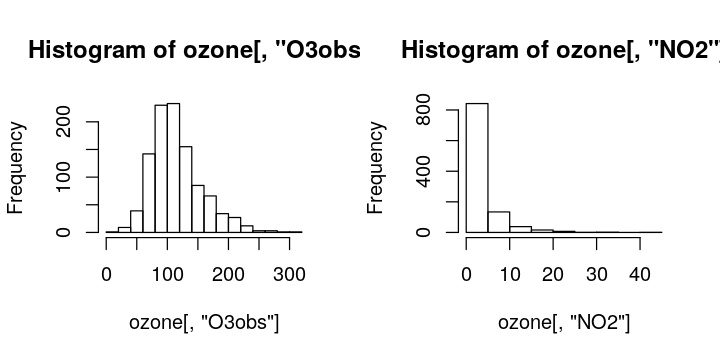

In [4]:
par(mfrow=c(1,2))
options(repr.plot.width=6, repr.plot.height=3)
hist(ozone[,"O3obs"])
hist(ozone[,"NO2"])

In [5]:
par

function (..., no.readonly = FALSE) 
{
    .Pars.readonly <- c("cin", "cra", "csi", "cxy", "din", "page")
    single <- FALSE
    args <- list(...)
    if (!length(args)) 
        args <- as.list(if (no.readonly) 
            .Pars[-match(.Pars.readonly, .Pars)]
        else .Pars)
    else {
        if (all(unlist(lapply(args, is.character)))) 
            args <- as.list(unlist(args))
        if (length(args) == 1) {
            if (is.list(args[[1L]]) | is.null(args[[1L]])) 
                args <- args[[1L]]
            else if (is.null(names(args))) 
                single <- TRUE
        }
    }
    value <- .External2(C_par, args)
    if (single) 
        value <- value[[1L]]
    if (!is.null(names(args))) 
        invisible(value)
    else value
}
<bytecode: 0x560c11670e40>
<environment: namespace:graphics>

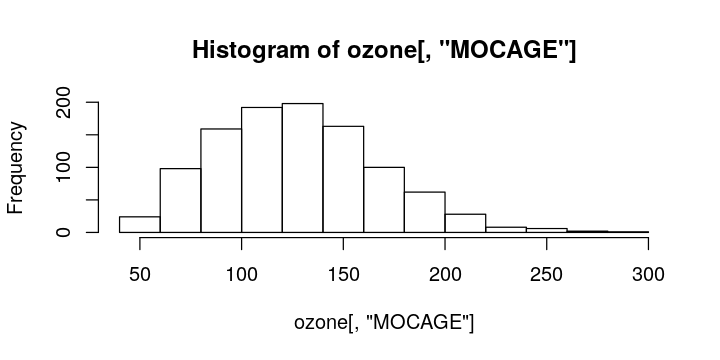

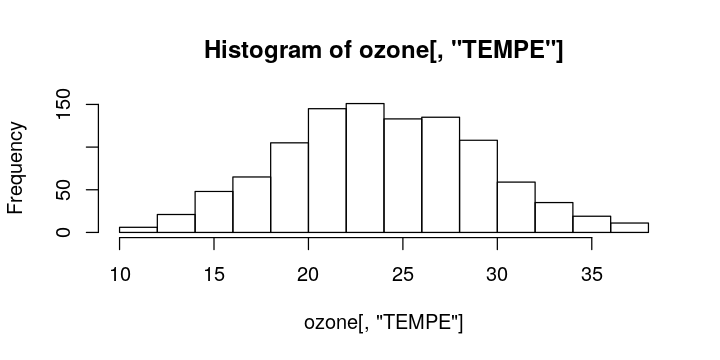

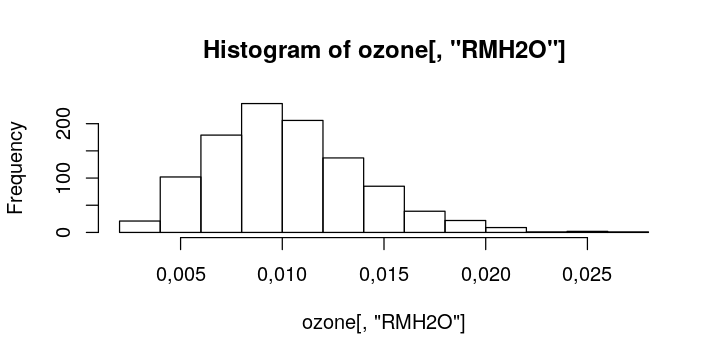

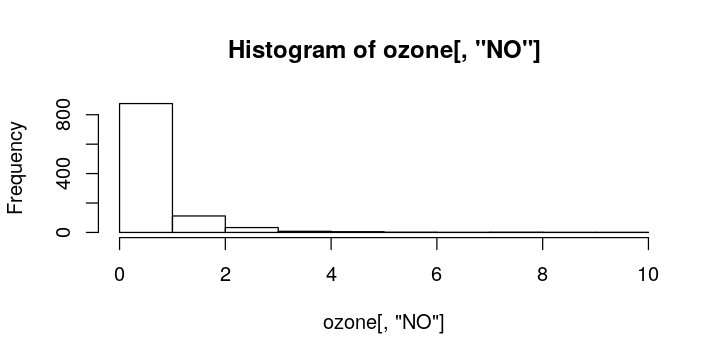

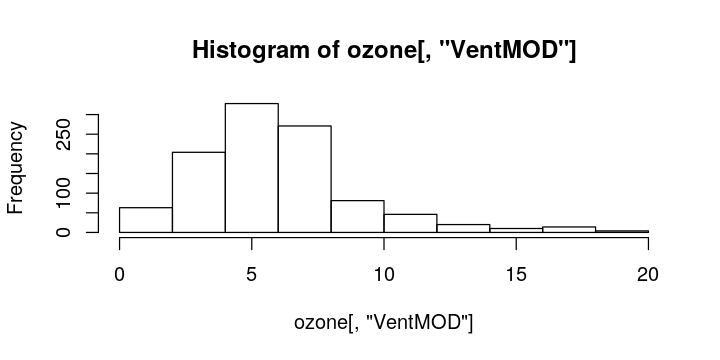

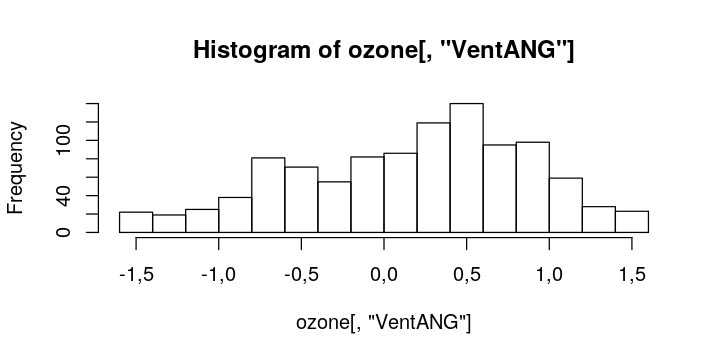

In [6]:
# Même chose pour les autres variables
hist(ozone[,"MOCAGE"]);
hist(ozone[,"TEMPE"]);
hist(ozone[,"RMH2O"])
hist(ozone[,"NO"]);
hist(ozone[,"VentMOD"]);
hist(ozone[,"VentANG"])

Des transformations sont proposées pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), par pour toutes (arbres).

In [7]:
#
ozone[,"SRMH2O"]=sqrt(ozone[,"RMH2O"])
ozone[,"LNO2"]=log(ozone[,"NO2"])
ozone[,"LNO"]=log(ozone[,"NO"])

Vérifier l'opportunité de ces transformations puis retirer les variables initiales et construire la variable "dépassement de seuil" pour obtenir le fichier qui sera effectivement utilisé.


In [8]:
ozone=ozone[,c(1:4,8:13)]
ozone[,"DepSeuil"]=as.factor(ozone[,"O3obs"]>150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19,0   Min.   : 46,4   Min.   :10,40   Aix:199  
 1:317   1st Qu.: 87,0   1st Qu.: 97,5   1st Qu.:20,20   Als:222  
         Median :109,0   Median :125,6   Median :23,80   Cad:202  
         Mean   :115,4   Mean   :127,2   Mean   :23,88   Pla:208  
         3rd Qu.:135,0   3rd Qu.:153,6   3rd Qu.:27,60   Ram:210  
         Max.   :319,0   Max.   :284,7   Max.   :38,00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0,1414   Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548  
 1st Qu.: 3,9623   1st Qu.:-0,3948   1st Qu.:0,08735   1st Qu.: 0,2215  
 Median : 5,5973   Median : 0,2783   Median :0,09925   Median : 0,7462  
 Mean   : 5,9072   Mean   : 0,1631   Mean   :0,09957   Mean   : 0,8440  
 3rd Qu.: 7,1063   3rd Qu.: 0,6926   3rd Qu.:0,11153   3rd Qu.: 1,4017  
 Max.   :19,8910   Max.   : 1,5708   Max.   :0,16592   Max.   : 3,7931  
      LNO           

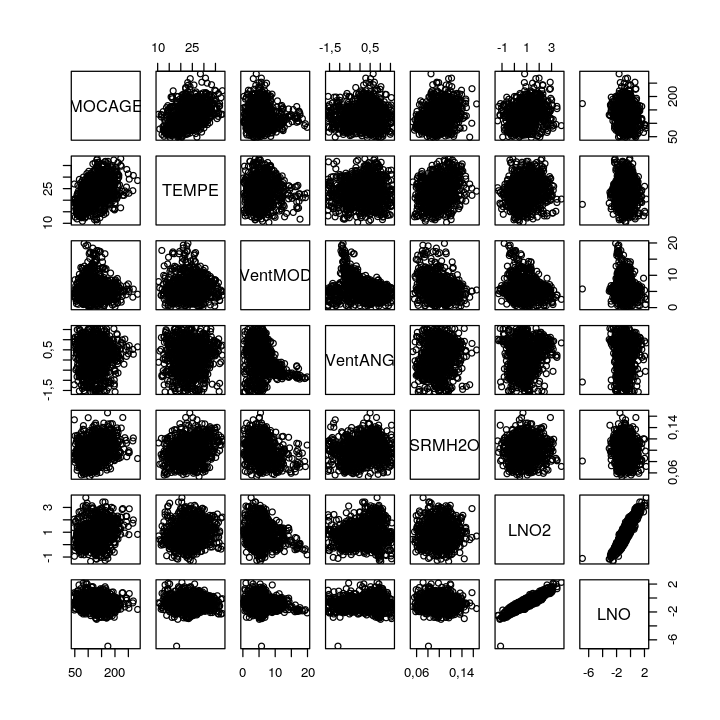

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
pairs(ozone[,c(3,4,6:10)])

**Q** Que dire sur les relations des varibles 2 à 2?

->  Lorsque les deux variables augmentent ou diminuent  simultanément et à un taux constante, il existe une relation linéaire positive entre ces deux variables.

-> Vu la figure suivante on remarque que NO (Concentration en monoxyde d'azote) et NO2 (Concentration en dioxyde d'azote) on une relation lineaire.
Toute les autres valeurs ne montre pas de linéarités entre eux.

Les commandes suivantes permettent de réaliser une [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) sur les seules variables quantitatives. Par ailleurs la variable à modéliser  (O3obs, concentration observée) n'est pas utilisée.

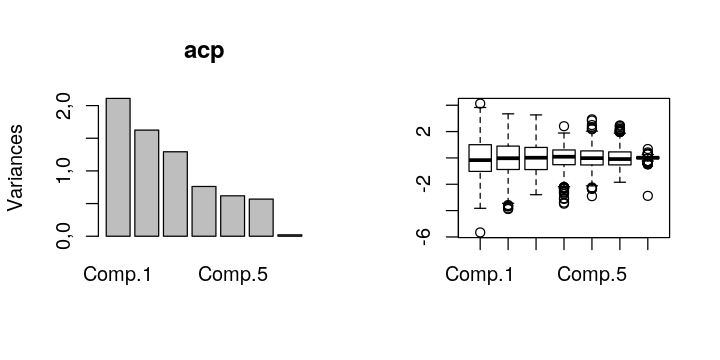

In [10]:
# ACP réduite
acp=princomp(ozone[,c(3:4,6:10)],cor=TRUE)

# Décroissance des valeurs propres
options(repr.plot.width=6, repr.plot.height=3)
par(mfrow = c(1,2))

plot(acp); boxplot(data.frame(acp$scores))

In [11]:
c(3:4,6:10)

[1]  3  4  6  7  8  9 10

In [12]:
acp$scores

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7
"-1,3276884","-1,060937214","0,789455461","-0,465746304","-0,48995478","-0,08155153","0,048477729"
"-0,5966286","-0,976383087","0,108200107","-0,094030145","-0,39199460","0,25626916","0,049090263"
"-1,0919706","-1,084074398","0,123619434","-0,260185550","-0,68425468","0,77817378","0,095800299"
"-0,7334883","-1,584957485","0,442658631","-0,356825483","-0,66047546","0,35178352","0,095602409"
"-0,9738933","-0,877274475","0,607544637","-0,063997663","-0,04608804","-0,47569640","0,148900018"
"1,2096833","-0,838760455","0,085859929","-0,593523343","-0,68017605","-0,09507490","0,120903408"
"0,4397713","0,005050863","0,157319821","-0,060105409","0,26921189","-0,53445355","0,074128669"
"3,1999875","-0,942590568","-0,004770669","0,180387314","-0,18979127","0,60270617","0,097209662"
"2,3230459","-0,676726313","-0,249176101","-0,004727645","-0,42899259","0,38624962","0,120970426"
"3,2326648","-1,768489820","-0,439635624","0,149059677","-1,02194889","-0,12534061","0,042000089"


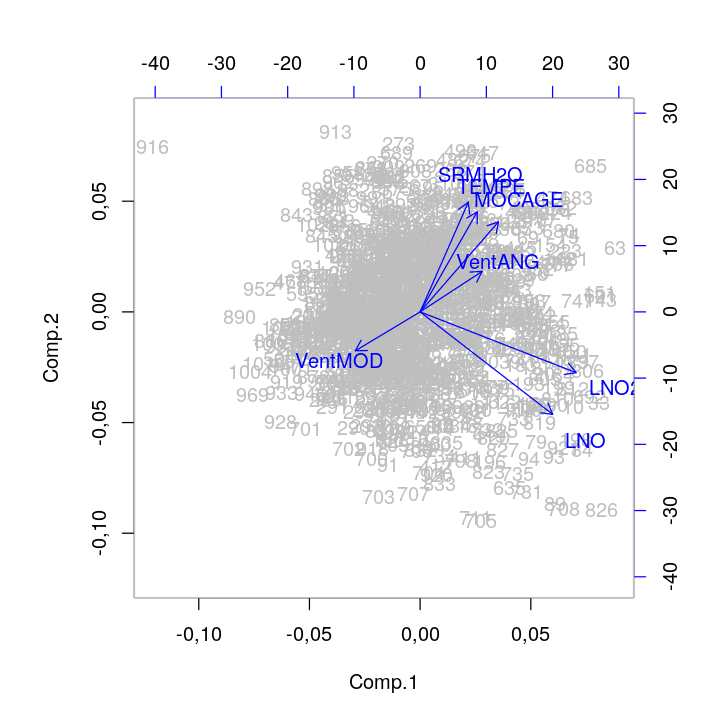

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(acp, col=c("grey","blue"))

**Q** Que sont ces graphiques?

**Réponse**  Représentation simultanée : individus(gris) x variables(bleu)

**Q** Que dire du choix de la dimension, des valeurs atypiques?

**Réponse** Le biplot suivant ne montre pas toutes les variables contruites donc pas la totalité .

In [14]:
c1 <- acp$loadings[,1]*acp$sdev[1]
c2 <- acp$loadings[,2]*acp$sdev[2]
correlation <- cbind(c1,c2)
print(correlation,digits=2)

           c1    c2
MOCAGE   0,46  0,53
TEMPE    0,33  0,58
VentMOD -0,38 -0,23
VentANG  0,36  0,24
SRMH2O   0,28  0,64
LNO2     0,91 -0,36
LNO      0,78 -0,60


**Q** Que dire de la structure de corrélation des variables ? Est-elle intuitive ?

**Réponse** Les variables comme LNO2 et LNO sont beaucoup plus correllees avec l’axe1 avec un
correlation negative pour l’axe2.
Les reste des var est plus correlles avec l’axe2 comme SRMH2O, TEMPE.
Visible VentMOD est correllee negativement aux deux axes.

Le même graphique en coloriant les jours.

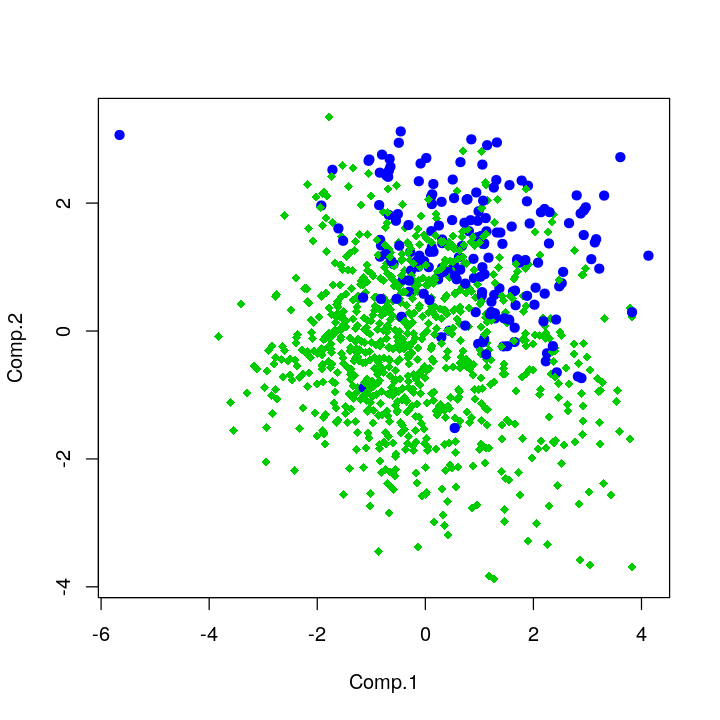

In [15]:
coul=as.integer(ozone[,"DepSeuil"])+2
plot(acp$scores,col=coul, pch=17+coul-2)

L'objectif est donc de définir une surface séparant les deux classes. 

**Q** Une discriminaiton linéaire (hyperplan) semble-t-elle possible? 
**Réponse** Pour aboutir Une discriminaiton linéaire  il fut que les données soivent linéairement séparable donc non ce n'est pas possible.

Ce n'est pas utile ici mais une classification non supervisée est facile à obtenir. Par exemple en 4 classes, par l'algorithme k-means:

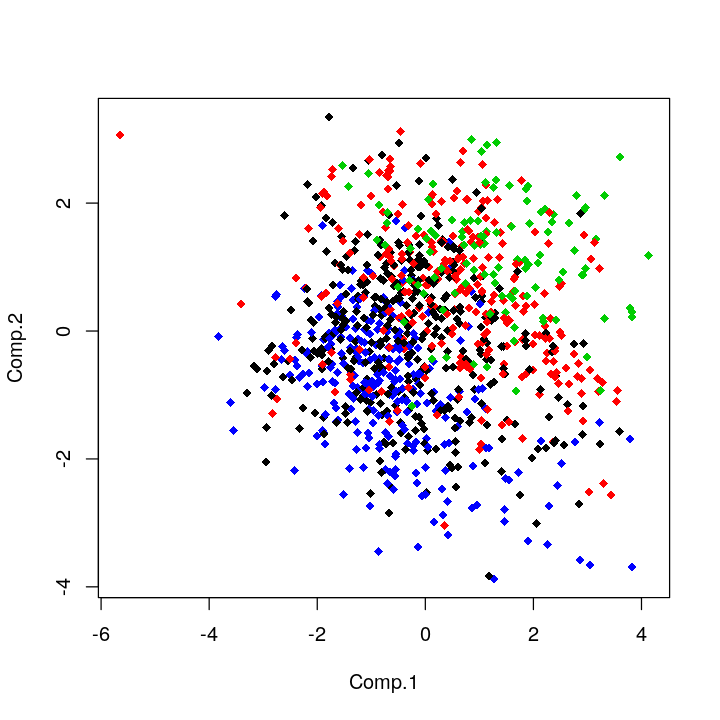

In [16]:
km.ozone=kmeans(ozone[,c(3:4,6:10)],centers=4)
# Représentatino dans les coordonnées de l'acp
coul=km.ozone$cluster
plot(acp$scores,col=coul, pch=18)

## 3. Protocole de comparaison

### Stratégie

La recherche  d'une meilleure méthode de prévision suit le protocole suivant.

1. Etape descriptive préliminaire uni et multidimensionnelle visant à repérer les incohérences, les variables non significatives ou de distribution exotique, les individus non concernés ou atypiques... et à étudier les structures des données. Ce peut être aussi la longue étape de construction de variables, attributs ou *features* spécifiques des données. 
2. Procéder à un tirage aléatoire d'un échantillon *test* qui ne sera utilisé que lors de la *dernière étape* de comparaison des méthodes.
3. La partie restante est l'échantillon d'*apprentissage* pour l'estimation des paramètres des modèles.
4. Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par [*validation croisée*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf):
    - Variables et interactions à prendre en compte dans la régression linéaire ou logistique;
    - variables et méthode pour l'analyse discriminante;
    - nombre de feuilles dans l'arbre de régression ou de classification;
    - architecture (nombre de neurones, pénalisation) du perceptron;
    - algorithme d'agrégation, 
    - noyau et pénalisation des SVMs.
5.  Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test qui est resté à l'écart de tout effort ou "acharnement" pour l'optimisation des modèles.

**Remarques**
* En cas d'échantillon relativement "petit" il est recommandé d'itérer la procédure de découpage apprentissage / test, afin de réduire la variance (moyenne) des estimations des erreurs de prévision.


**Q** Commenta appelle-t-on cette procédure spécifique de validation croisée?

**Réponse** La variante de validation croisée est « k-fold cross-validation » 
* *Attention*: ne pas "tricher" en modifiant le modèle obtenu lors de l'étape précédente afin d'améliorer le résultat sur l'échantillon test!
* Le critère utilisé dépend du problème : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, *log loss function*...

### Extraction des échantillons

Les commandes ci-dessous réalisent l'extraction du sous-ensemble des données d'apprentissage et de test. 

Utiliser trois chiffres au hasard, et **remplacer** "111" ci-dessous, comme initialisation du générateur de nombres aléatoires. Attention, chaque participant tire un échantillon différent ; il est donc "normal" de na pas obtenir les mêmes modèles, les mêmes résultats.

In [17]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio=.2   # part de l'échantillon test
npop=nrow(ozone) # nombre de lignes dans les données
nvar=ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest=ceiling(npop*test.ratio) 
# indices de l'échantillon test
testi=sample(1:npop,ntest)
# indices de l'échantillon d'apprentissage
appri=setdiff(1:npop,testi) 

Construction des échantillons pour la régression: prévision de la concentration en ozone.

In [18]:
# construction de l'échantillon d'apprentissage
datappr=ozone[appri,-11] 
# construction de l'échantillon test
datestr=ozone[testi,-11] 
summary(datappr) # vérification

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:581   Min.   : 19,0   Min.   : 46,4   Min.   :10,40   Aix:158  
 1:251   1st Qu.: 88,0   1st Qu.: 98,0   1st Qu.:20,27   Als:179  
         Median :110,0   Median :125,9   Median :23,90   Cad:165  
         Mean   :115,8   Mean   :127,7   Mean   :23,94   Pla:171  
         3rd Qu.:135,0   3rd Qu.:154,9   3rd Qu.:27,60   Ram:159  
         Max.   :319,0   Max.   :268,6   Max.   :38,00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0,1414   Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548  
 1st Qu.: 3,9825   1st Qu.:-0,3940   1st Qu.:0,08813   1st Qu.: 0,2042  
 Median : 5,5938   Median : 0,3019   Median :0,09932   Median : 0,7405  
 Mean   : 5,9413   Mean   : 0,1687   Mean   :0,09967   Mean   : 0,8458  
 3rd Qu.: 7,1694   3rd Qu.: 0,6875   3rd Qu.:0,11155   3rd Qu.: 1,4301  
 Max.   :19,8910   Max.   : 1,5708   Max.   :0,16592   Max.   : 3,4377  
      LNO         
 

Construction des échantillons pour la discrimination: prévision de dépassement.

In [19]:
# construction de l'échantillon d'apprentissage
datappq=ozone[appri,-2]
# construction de l'échantillon test 
datestq=ozone[testi,-2] 
summary(datappq) # vérification

 JOUR        MOCAGE          TEMPE       STATION      VentMOD       
 0:581   Min.   : 46,4   Min.   :10,40   Aix:158   Min.   : 0,1414  
 1:251   1st Qu.: 98,0   1st Qu.:20,27   Als:179   1st Qu.: 3,9825  
         Median :125,9   Median :23,90   Cad:165   Median : 5,5938  
         Mean   :127,7   Mean   :23,94   Pla:171   Mean   : 5,9413  
         3rd Qu.:154,9   3rd Qu.:27,60   Ram:159   3rd Qu.: 7,1694  
         Max.   :268,6   Max.   :38,00             Max.   :19,8910  
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548   Min.   :-6,9078  
 1st Qu.:-0,3940   1st Qu.:0,08813   1st Qu.: 0,2042   1st Qu.:-1,4610  
 Median : 0,3019   Median :0,09932   Median : 0,7405   Median :-0,9455  
 Mean   : 0,1687   Mean   :0,09967   Mean   : 0,8458   Mean   :-0,8418  
 3rd Qu.: 0,6875   3rd Qu.:0,11155   3rd Qu.: 1,4301   3rd Qu.:-0,2884  
 Max.   : 1,5708   Max.   :0,16592   Max.   : 3,4377   Max.   : 2,1416  
  DepS

## [Prévision par modèle gaussien](http://wikistat.fr/pdf/st-m-app-select.pdf)

Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomiale d'ordre 2 ou quadratique.

### Modèle linéaire

Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.

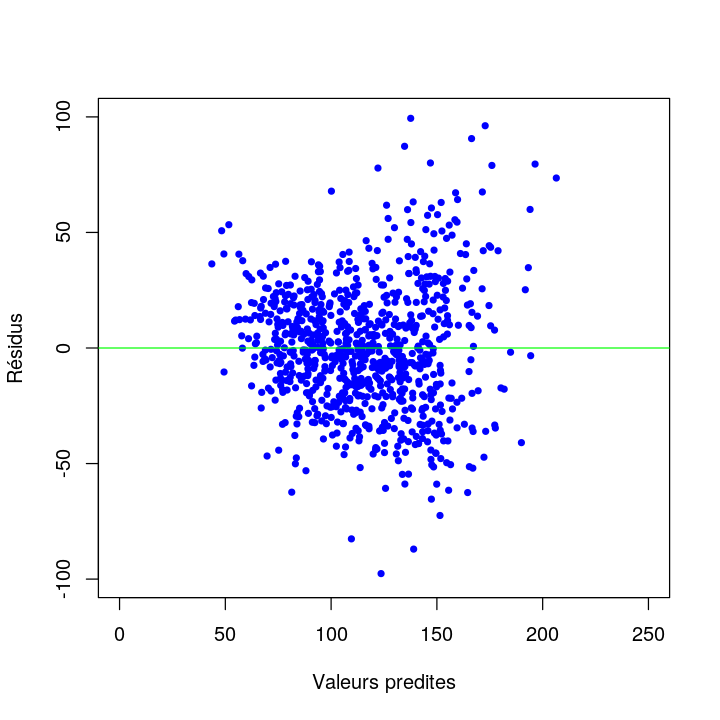

In [20]:
# estimation du modèle sans interaction
reg.lm=aov(O3obs~.,data=datappr)
# Extraction des résidus et des valeurs ajustées
# de ce modèle
res.lm=reg.lm$residuals
fit.lm=reg.lm$fitted.values
# graphe des résidus
# Définition d'une fonction pour un graphe coloré et 
# des échelles fixes sur les axes
plot.res=function(x,y,titre="titre")
{
plot(x,y,col="blue",xlim=c(0,250),ylim=c(-100,100),
ylab="Résidus",xlab="Valeurs predites",main=titre,pch=20)
# points(x2,y,col="red")
abline(h=0,col="green")
}
plot.res(fit.lm,res.lm,"")

**Q** Que dire de la distribution de ces résidus? 

**Réponse**  Pas de linéarité

**Q** La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle?

**Réponse**La figure montre que le résidu n’apporte pas de changement avec X , par contre on remarque que la propagation n’est pas stable . 

Le modèle est invalide par ce que le graphe des résidus versus les valeurs prédites ne présente pas de structure (indépendance, homoscédasticité, normalité). 

Apprécier néanmoins sa significativité par la commande suivante.

In [21]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1    106     106   0,134 0,714791    
MOCAGE        1 470173  470173 590,680  < 2e-16 ***
TEMPE         1 225427  225427 283,204  < 2e-16 ***
STATION       4  10163    2541   3,192 0,012926 *  
VentMOD       1  13846   13846  17,395 3,36e-05 ***
VentANG       1  10088   10088  12,673 0,000392 ***
SRMH2O        1    273     273   0,343 0,558101    
LNO2          1   3337    3337   4,193 0,040918 *  
LNO           1   9006    9006  11,314 0,000805 ***
Residuals   819 651913     796                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

**Q** Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?

**Réponse** 
On parle d'homoscédasticité lorsque la variance des erreurs stochastiques de la régression est la même pour chaque observation i (de 1 à n observations). 
Le dernier modèle aussi ne vérifie pas l'homoscédasticité et il y une large variance entre les résidus 


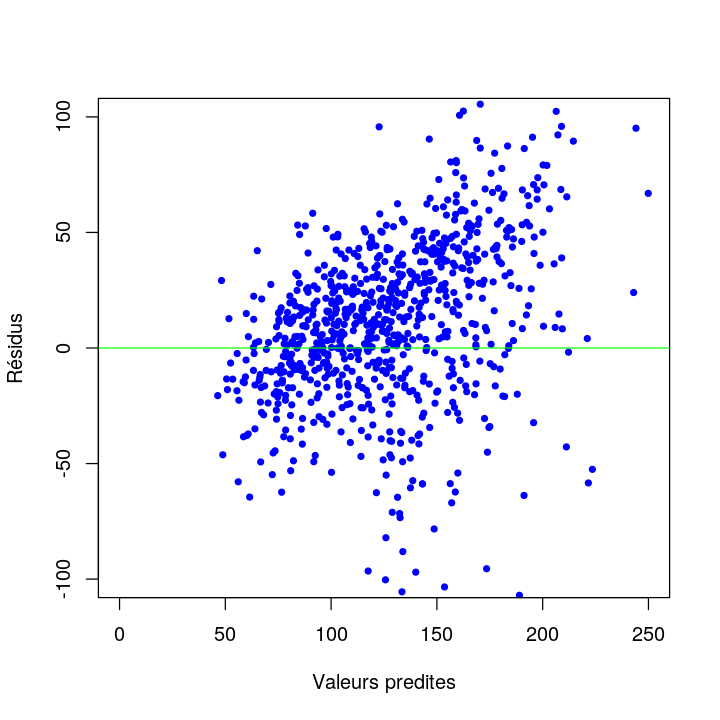

In [22]:
# Graphe des résidus du modèle déterministe MOCAGE
plot.res(datappr[,"MOCAGE"],datappr[,"MOCAGE"]-datappr[,"O3obs"],"")

### Modèle quadratique

L'étude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un modèle de régression quadratique. Il est estimé avec la fonction glm qui permet une sélection automatique de modèle. La méthode descendante est utilisée mais celle pas-à-pas pourrait également l'être. Ce type de procédure n'est pas implémentée en python.

Sélection descendante: à chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC ou *Akaïke Information Criterion*. 

**Q** Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisée en régression linéaire? 

**Réponse** Il existe de nombreux critères d'informations inspirés du critère d'Akaike. Parmi ceux-ci, le critère d'information bayésien est l'un des plus populaires. Il se définit comme suit :

    B I C = − 2ln ⁡ ( L ) + ln ⁡ ( n ) k 

avec n le nombre d'observations dans l'échantillon étudié et k le nombre de paramètres.

L'AIC pénalise le nombre de paramètres moins fortement que le BIC



**Q** Pourquoi n'est-il pas utilisable ici?

**Réponse**

 En particulier, l'AIC est asymptotiquement optimal lorsque l'on souhaite sélectionner le modèle avec l'erreur quadratique moyenne (si l'on fait l'hypothèse que le modèle générant les données n'est pas parmi les candidats, ce qui est en fait presque toujours le cas en pratique); ce n'est pas le cas du BIC par ce q'uil dépond du Nombre d'observations est quand il est grang il n'est pas optimal. 


In [23]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm=glm(O3obs~(.)^2,data=datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step=step(reg.glm,direction="backward")

Start:  AIC=7783,44
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:STATION     4   471877 7776,5
- STATION:VentANG  4   471970 7776,7
- JOUR:TEMPE       1   471262 7781,4
- JOUR:LNO2        1   471262 7781,4
- LNO2:LNO         1   471263 7781,4
- JOUR:SRMH2O      1   471265 7781,4
- MOCAGE:TEMPE     1   471270 7781,5
- JOUR:LNO         1   471321 7781,5
- JOUR:MOCAGE      1   471324 7781,6
- VentMOD:VentANG  1   471374 7781,6
- JOUR:VentANG     1   471464 7781,8
- MOCAGE:VentANG   1   471510 7781,9
- MOCAGE:STATION   4   475115 7782,2
- JOUR:VentMOD     1   471774 7782,3
- VentANG:SRMH2O   1   471804 7782,4
- MOCAGE:SRMH2O    1   471846 7782,5
- VentMOD:LNO2     1   472012 7782,8
- TEMPE:VentMOD    1   472318 7783,3
<none>                 471261 7783,4
- VentMOD:LNO      1   472416 7783,5
- MOCAGE:VentMOD   1   472452 7783,5
- STATION:LNO      4   476488 7784,6
- VentANG:LNO2     1   473094 7784,7
- VentMOD:SRMH2O   1   473263 7785,0
- TEMPE:VentANG    1   473577 7785,5
- SRMH2O:LNO2      1   473719 7785,8
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- STATION:VentANG  4   472669 7769,9
- LNO2:LNO         1   471881 7774,5
- JOUR:LNO2        1   471882 7774,5
- JOUR:SRMH2O      1   471883 7774,5
- MOCAGE:TEMPE     1   471891 7774,6
- JOUR:LNO         1   471894 7774,6
- JOUR:TEMPE       1   471952 7774,7
- JOUR:VentANG     1   471976 7774,7
- VentMOD:VentANG  1   471995 7774,7
- JOUR:MOCAGE      1   472022 7774,8
- MOCAGE:VentANG   1   472086 7774,9
- MOCAGE:STATION   4   475743 7775,3
- JOUR:VentMOD     1   472347 7775,4
- MOCAGE:SRMH2O    1   472458 7775,6
- VentANG:SRMH2O   1   472460 7775,6
- VentMOD:LNO2     1   472527 7775,7
- VentMOD:LNO      1   472923 7776,4
- TEMPE:VentMOD    1   472927 7776,4
- MOCAGE:VentMOD   1   472946 7776,4
<none>                 471877 7776,5
- STATION:LNO      4   476969 7777,5
- VentANG:LNO2     1   473613 7777,6
- VentMOD:SRMH2O   1   473915 7778,1
- TEMPE:VentANG    1   474270 7778,7
- SRMH2O:LNO2      1   474347 7778,9
- SRMH2O:LNO       1   474491 7779,1
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:SRMH2O      1   472669 7767,9
- JOUR:LNO2        1   472669 7767,9
- LNO2:LNO         1   472669 7767,9
- MOCAGE:TEMPE     1   472690 7768,0
- VentMOD:VentANG  1   472694 7768,0
- JOUR:LNO         1   472702 7768,0
- JOUR:TEMPE       1   472732 7768,0
- JOUR:MOCAGE      1   472761 7768,1
- JOUR:VentANG     1   472817 7768,2
- JOUR:VentMOD     1   473064 7768,6
- MOCAGE:STATION   4   476643 7768,9
- MOCAGE:SRMH2O    1   473246 7768,9
- VentANG:SRMH2O   1   473278 7769,0
- VentMOD:LNO2     1   473315 7769,1
- TEMPE:VentMOD    1   473577 7769,5
- MOCAGE:VentANG   1   473648 7769,6
- VentMOD:LNO      1   473648 7769,6
- MOCAGE:VentMOD   1   473723 7769,8
<none>                 472669 7769,9
- STATION:LNO      4   477888 7771,1
- VentMOD:SRMH2O   1   474864 7771,8
- TEMPE:VentANG    1   474994 7772,0
- VentANG:LNO2     1   475028 7772,1
- SRMH2O:LNO2      1   475160 7772,3
- SRMH2O:LNO       1   475309 7772,6
- MOCAGE:LNO       1   475398 7772,7
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:LNO2        1   472669 7765,9
- LNO2:LNO         1   472669 7765,9
- MOCAGE:TEMPE     1   472690 7766,0
- VentMOD:VentANG  1   472694 7766,0
- JOUR:LNO         1   472703 7766,0
- JOUR:TEMPE       1   472736 7766,0
- JOUR:MOCAGE      1   472761 7766,1
- JOUR:VentANG     1   472819 7766,2
- JOUR:VentMOD     1   473112 7766,7
- MOCAGE:STATION   4   476651 7766,9
- MOCAGE:SRMH2O    1   473246 7766,9
- VentANG:SRMH2O   1   473281 7767,0
- VentMOD:LNO2     1   473316 7767,1
- TEMPE:VentMOD    1   473577 7767,5
- MOCAGE:VentANG   1   473648 7767,6
- VentMOD:LNO      1   473649 7767,6
- MOCAGE:VentMOD   1   473723 7767,8
<none>                 472669 7767,9
- STATION:LNO      4   477906 7769,1
- VentMOD:SRMH2O   1   474897 7769,8
- TEMPE:VentANG    1   475000 7770,0
- VentANG:LNO2     1   475028 7770,1
- SRMH2O:LNO2      1   475195 7770,4
- SRMH2O:LNO       1   475338 7770,6
- MOCAGE:LNO       1   475400 7770,7
- STATION:VentMOD  4   478991 7771,0
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- LNO2:LNO         1   472669 7763,9
- MOCAGE:TEMPE     1   472690 7764,0
- VentMOD:VentANG  1   472694 7764,0
- JOUR:TEMPE       1   472748 7764,1
- JOUR:VentANG     1   472820 7764,2
- JOUR:MOCAGE      1   472959 7764,4
- JOUR:VentMOD     1   473146 7764,8
- MOCAGE:SRMH2O    1   473249 7764,9
- VentANG:SRMH2O   1   473282 7765,0
- VentMOD:LNO2     1   473343 7765,1
- MOCAGE:STATION   4   476808 7765,2
- TEMPE:VentMOD    1   473592 7765,5
- VentMOD:LNO      1   473699 7765,7
- MOCAGE:VentANG   1   473722 7765,8
- MOCAGE:VentMOD   1   473747 7765,8
<none>                 472669 7765,9
- JOUR:LNO         1   473888 7766,1
- STATION:LNO      4   478156 7767,5
- VentMOD:SRMH2O   1   474897 7767,8
- TEMPE:VentANG    1   475021 7768,1
- SRMH2O:LNO2      1   475226 7768,4
- VentANG:LNO2     1   475267 7768,5
- SRMH2O:LNO       1   475383 7768,7
- MOCAGE:LNO       1   475401 7768,7
- STATION:VentMOD  4   479071 7769,1
- VentANG:LNO      1   476275 7770,2
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- MOCAGE:TEMPE     1   472690 7762,0
- VentMOD:VentANG  1   472695 7762,0
- JOUR:TEMPE       1   472749 7762,1
- JOUR:VentANG     1   472820 7762,2
- JOUR:MOCAGE      1   472961 7762,4
- JOUR:VentMOD     1   473148 7762,8
- MOCAGE:SRMH2O    1   473253 7763,0
- VentANG:SRMH2O   1   473287 7763,0
- VentMOD:LNO2     1   473375 7763,2
- MOCAGE:STATION   4   476838 7763,2
- TEMPE:VentMOD    1   473592 7763,5
- MOCAGE:VentANG   1   473735 7763,8
- VentMOD:LNO      1   473741 7763,8
- MOCAGE:VentMOD   1   473784 7763,9
<none>                 472669 7763,9
- JOUR:LNO         1   473893 7764,1
- VentMOD:SRMH2O   1   474912 7765,9
- TEMPE:VentANG    1   475021 7766,1
- STATION:LNO      4   478614 7766,3
- SRMH2O:LNO2      1   475251 7766,5
- VentANG:LNO2     1   475301 7766,5
- SRMH2O:LNO       1   475401 7766,7
- MOCAGE:LNO       1   475474 7766,8
- STATION:VentMOD  4   479079 7767,1
- VentANG:LNO      1   476335 7768,4
- STATION:LNO2     4   480065 7768,8
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- VentMOD:VentANG  1   472715 7760,0
- JOUR:TEMPE       1   472776 7760,1
- JOUR:VentANG     1   472837 7760,2
- JOUR:MOCAGE      1   472982 7760,5
- JOUR:VentMOD     1   473184 7760,8
- MOCAGE:SRMH2O    1   473261 7761,0
- VentANG:SRMH2O   1   473313 7761,1
- VentMOD:LNO2     1   473385 7761,2
- MOCAGE:STATION   4   476915 7761,4
- TEMPE:VentMOD    1   473641 7761,6
- MOCAGE:VentANG   1   473736 7761,8
- VentMOD:LNO      1   473753 7761,8
- MOCAGE:VentMOD   1   473784 7761,9
<none>                 472690 7762,0
- JOUR:LNO         1   473929 7762,1
- VentMOD:SRMH2O   1   474935 7763,9
- TEMPE:VentANG    1   475032 7764,1
- STATION:LNO      4   478629 7764,3
- SRMH2O:LNO2      1   475251 7764,5
- VentANG:LNO2     1   475313 7764,6
- SRMH2O:LNO       1   475401 7764,7
- STATION:VentMOD  4   479089 7765,1
- MOCAGE:LNO       1   475933 7765,6
- VentANG:LNO      1   476362 7766,4
- STATION:LNO2     4   480086 7766,9
- MOCAGE:LNO2      1   477424 7768,2
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:TEMPE       1   472800 7758,2
- JOUR:VentANG     1   472853 7758,2
- JOUR:MOCAGE      1   473010 7758,5
- JOUR:VentMOD     1   473207 7758,9
- MOCAGE:SRMH2O    1   473300 7759,0
- VentANG:SRMH2O   1   473383 7759,2
- VentMOD:LNO2     1   473419 7759,2
- MOCAGE:STATION   4   476915 7759,4
- TEMPE:VentMOD    1   473687 7759,7
- MOCAGE:VentANG   1   473744 7759,8
- VentMOD:LNO      1   473775 7759,9
- MOCAGE:VentMOD   1   473799 7759,9
<none>                 472715 7760,0
- JOUR:LNO         1   473959 7760,2
- TEMPE:VentANG    1   475033 7762,1
- VentMOD:SRMH2O   1   475076 7762,1
- STATION:LNO      4   478642 7762,4
- VentANG:LNO2     1   475324 7762,6
- SRMH2O:LNO2      1   475342 7762,6
- SRMH2O:LNO       1   475499 7762,9
- MOCAGE:LNO       1   475934 7763,6
- STATION:VentMOD  4   479682 7764,2
- VentANG:LNO      1   476366 7764,4
- STATION:LNO2     4   480092 7764,9
- MOCAGE:LNO2      1   477424 7766,3
- TEMPE:LNO        1   482753 7775,5
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:VentANG     1   472953 7756,4
- JOUR:VentMOD     1   473287 7757,0
- JOUR:MOCAGE      1   473360 7757,1
- MOCAGE:SRMH2O    1   473391 7757,2
- VentANG:SRMH2O   1   473493 7757,4
- VentMOD:LNO2     1   473519 7757,4
- MOCAGE:STATION   4   476978 7757,5
- TEMPE:VentMOD    1   473787 7757,9
- MOCAGE:VentANG   1   473871 7758,0
- VentMOD:LNO      1   473884 7758,1
- MOCAGE:VentMOD   1   473914 7758,1
<none>                 472800 7758,2
- JOUR:LNO         1   474077 7758,4
- TEMPE:VentANG    1   475079 7760,2
- VentMOD:SRMH2O   1   475135 7760,3
- STATION:LNO      4   478708 7760,5
- VentANG:LNO2     1   475418 7760,7
- SRMH2O:LNO2      1   475460 7760,8
- SRMH2O:LNO       1   475626 7761,1
- MOCAGE:LNO       1   476010 7761,8
- STATION:VentMOD  4   479742 7762,3
- VentANG:LNO      1   476480 7762,6
- STATION:LNO2     4   480144 7763,0
- MOCAGE:LNO2      1   477498 7764,4
- TEMPE:LNO        1   483028 7774,0
- TEMPE:STATION    4   488272 7776,9
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- MOCAGE:SRMH2O    1   473515 7755,4
- JOUR:MOCAGE      1   473556 7755,5
- JOUR:VentMOD     1   473631 7755,6
- VentANG:SRMH2O   1   473649 7755,6
- VentMOD:LNO2     1   473681 7755,7
- MOCAGE:STATION   4   477177 7755,8
- TEMPE:VentMOD    1   473958 7756,2
- VentMOD:LNO      1   474055 7756,4
- MOCAGE:VentMOD   1   474079 7756,4
<none>                 472953 7756,4
- MOCAGE:VentANG   1   474125 7756,5
- JOUR:LNO         1   474182 7756,6
- VentMOD:SRMH2O   1   475310 7758,6
- TEMPE:VentANG    1   475326 7758,6
- STATION:LNO      4   478803 7758,7
- SRMH2O:LNO2      1   475569 7759,0
- VentANG:LNO2     1   475617 7759,1
- SRMH2O:LNO       1   475752 7759,3
- MOCAGE:LNO       1   476095 7759,9
- STATION:VentMOD  4   479862 7760,5
- VentANG:LNO      1   476720 7761,0
- STATION:LNO2     4   480235 7761,1
- MOCAGE:LNO2      1   477588 7762,5
- TEMPE:LNO        1   483206 7772,3
- TEMPE:STATION    4   488374 7775,1
- STATION:SRMH2O   4   489228 7776,6
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- VentMOD:LNO2     1   474063 7754,4
- JOUR:MOCAGE      1   474140 7754,5
- JOUR:VentMOD     1   474210 7754,6
- VentANG:SRMH2O   1   474373 7754,9
- MOCAGE:VentMOD   1   474408 7755,0
- VentMOD:LNO      1   474433 7755,0
- TEMPE:VentMOD    1   474612 7755,3
- MOCAGE:STATION   4   478087 7755,4
<none>                 473515 7755,4
- JOUR:LNO         1   474687 7755,5
- MOCAGE:VentANG   1   474801 7755,7
- TEMPE:VentANG    1   475952 7757,7
- VentMOD:SRMH2O   1   476024 7757,8
- MOCAGE:LNO       1   476221 7758,2
- STATION:LNO      4   479681 7758,2
- VentANG:LNO2     1   476513 7758,7
- SRMH2O:LNO       1   476624 7758,9
- SRMH2O:LNO2      1   476710 7759,0
- STATION:VentMOD  4   480709 7760,0
- MOCAGE:LNO2      1   477635 7760,6
- VentANG:LNO      1   477718 7760,8
- STATION:LNO2     4   481181 7760,8
- TEMPE:LNO        1   483260 7770,4
- TEMPE:STATION    4   488903 7774,0
- TEMPE:LNO2       1   489316 7780,7
- TEMPE:SRMH2O     1   492962 7786,9
-

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- MOCAGE:VentMOD   1   474420 7753,0
- JOUR:MOCAGE      1   474630 7753,4
- MOCAGE:STATION   4   478114 7753,5
- JOUR:VentMOD     1   474850 7753,8
- VentANG:SRMH2O   1   474907 7753,9
- TEMPE:VentMOD    1   474916 7753,9
- JOUR:LNO         1   475108 7754,2
- VentMOD:LNO      1   475134 7754,3
<none>                 474063 7754,4
- MOCAGE:VentANG   1   475292 7754,5
- STATION:LNO      4   479701 7756,2
- TEMPE:VentANG    1   476525 7756,7
- MOCAGE:LNO       1   476674 7756,9
- VentANG:LNO2     1   476942 7757,4
- VentMOD:SRMH2O   1   477121 7757,7
- SRMH2O:LNO2      1   477303 7758,0
- SRMH2O:LNO       1   477313 7758,1
- STATION:LNO2     4   481184 7758,8
- STATION:VentMOD  4   481242 7758,9
- MOCAGE:LNO2      1   477930 7759,1
- VentANG:LNO      1   478165 7759,5
- TEMPE:LNO        1   483995 7769,6
- TEMPE:STATION    4   489350 7772,8
- TEMPE:LNO2       1   489965 7779,8
- TEMPE:SRMH2O     1   493716 7786,2
- STATION:SRMH2O   4   501217 7792,7



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- MOCAGE:STATION   4   478125 7751,5
- JOUR:MOCAGE      1   475029 7752,1
- JOUR:VentMOD     1   475219 7752,4
- VentANG:SRMH2O   1   475273 7752,5
- JOUR:LNO         1   475442 7752,8
<none>                 474420 7753,0
- VentMOD:LNO      1   475623 7753,1
- MOCAGE:VentANG   1   475646 7753,1
- TEMPE:VentMOD    1   475778 7753,4
- STATION:LNO      4   480351 7755,3
- TEMPE:VentANG    1   477165 7755,8
- VentMOD:SRMH2O   1   477311 7756,1
- VentANG:LNO2     1   477626 7756,6
- SRMH2O:LNO2      1   477925 7757,1
- SRMH2O:LNO       1   477945 7757,2
- MOCAGE:LNO       1   478066 7757,4
- STATION:VentMOD  4   481637 7757,6
- STATION:LNO2     4   481875 7758,0
- VentANG:LNO      1   478826 7758,7
- MOCAGE:LNO2      1   480119 7760,9
- TEMPE:LNO        1   485868 7770,8
- TEMPE:STATION    4   490402 7772,6
- TEMPE:LNO2       1   493313 7783,5
- TEMPE:SRMH2O     1   494843 7786,1
- STATION:SRMH2O   4   501543 7791,3

Step:  AIC=7751,47
O3obs ~ JOUR + MOC

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:MOCAGE      1   478645 7750,4
- STATION:LNO      4   482173 7750,5
- JOUR:VentMOD     1   479061 7751,1
- JOUR:LNO         1   479062 7751,1
<none>                 478125 7751,5
- VentANG:SRMH2O   1   479579 7752,0
- VentMOD:LNO      1   479797 7752,4
- TEMPE:VentMOD    1   479997 7752,7
- VentMOD:SRMH2O   1   480879 7754,3
- MOCAGE:VentANG   1   480963 7754,4
- MOCAGE:LNO       1   481164 7754,7
- TEMPE:VentANG    1   481295 7755,0
- SRMH2O:LNO       1   482346 7756,8
- SRMH2O:LNO2      1   482474 7757,0
- MOCAGE:LNO2      1   482602 7757,2
- STATION:LNO2     4   486824 7758,5
- STATION:VentMOD  4   487289 7759,3
- VentANG:LNO2     1   485059 7761,5
- VentANG:LNO      1   486898 7764,6
- TEMPE:LNO        1   490251 7770,3
- TEMPE:STATION    4   496113 7774,2
- TEMPE:LNO2       1   498152 7783,6
- TEMPE:SRMH2O     1   500214 7787,0
- STATION:SRMH2O   4   506272 7791,1

Step:  AIC=7750,38
O3obs ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + Ven

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- STATION:LNO      4   482652 7749,3
- JOUR:VentMOD     1   479540 7749,9
- JOUR:LNO         1   479554 7750,0
<none>                 478645 7750,4
- VentANG:SRMH2O   1   480086 7750,9
- VentMOD:LNO      1   480293 7751,2
- TEMPE:VentMOD    1   480610 7751,8
- VentMOD:SRMH2O   1   481487 7753,3
- MOCAGE:VentANG   1   481518 7753,4
- MOCAGE:LNO       1   481642 7753,6
- TEMPE:VentANG    1   482038 7754,3
- SRMH2O:LNO       1   482579 7755,2
- SRMH2O:LNO2      1   482733 7755,5
- MOCAGE:LNO2      1   483013 7755,9
- STATION:LNO2     4   487315 7757,3
- STATION:VentMOD  4   487987 7758,5
- VentANG:LNO2     1   485765 7760,7
- VentANG:LNO      1   487658 7763,9
- TEMPE:LNO        1   490761 7769,2
- TEMPE:STATION    4   496782 7773,3
- TEMPE:LNO2       1   498798 7782,7
- TEMPE:SRMH2O     1   500412 7785,4
- STATION:SRMH2O   4   507052 7790,3

Step:  AIC=7749,31
O3obs ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO + JOU

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:LNO         1   483467 7748,7
- VentMOD:LNO      1   483483 7748,7
- JOUR:VentMOD     1   483554 7748,9
- MOCAGE:LNO       1   483622 7749,0
<none>                 482652 7749,3
- VentANG:SRMH2O   1   484715 7750,9
- TEMPE:VentMOD    1   484931 7751,2
- VentMOD:SRMH2O   1   485691 7752,5
- MOCAGE:LNO2      1   485714 7752,6
- STATION:VentMOD  4   489557 7753,1
- MOCAGE:VentANG   1   486770 7754,4
- TEMPE:VentANG    1   486906 7754,6
- SRMH2O:LNO       1   488398 7757,2
- SRMH2O:LNO2      1   488580 7757,5
- TEMPE:LNO        1   491617 7762,6
- VentANG:LNO2     1   493633 7766,0
- VentANG:LNO      1   496738 7771,2
- STATION:LNO2     4   501398 7773,0
- TEMPE:LNO2       1   499845 7776,4
- TEMPE:STATION    4   506658 7781,7
- TEMPE:SRMH2O     1   509035 7791,6
- STATION:SRMH2O   4   513913 7793,5

Step:  AIC=7748,72
O3obs ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO + JOUR:VentMOD + MOCAGE:VentANG + MOCAGE:L

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- VentMOD:LNO      1   484219 7748,0
- JOUR:VentMOD     1   484238 7748,0
<none>                 483467 7748,7
- MOCAGE:LNO       1   484693 7748,8
- VentANG:SRMH2O   1   485359 7750,0
- TEMPE:VentMOD    1   485726 7750,6
- VentMOD:SRMH2O   1   486442 7751,8
- STATION:VentMOD  4   490500 7752,7
- MOCAGE:LNO2      1   487066 7752,9
- MOCAGE:VentANG   1   487631 7753,9
- TEMPE:VentANG    1   487673 7753,9
- SRMH2O:LNO       1   488679 7755,6
- SRMH2O:LNO2      1   488914 7756,0
- TEMPE:LNO        1   492631 7762,3
- VentANG:LNO2     1   494359 7765,3
- VentANG:LNO      1   497569 7770,6
- STATION:LNO2     4   502526 7772,9
- TEMPE:LNO2       1   501037 7776,4
- TEMPE:STATION    4   507555 7781,2
- TEMPE:SRMH2O     1   509102 7789,7
- STATION:SRMH2O   4   514404 7792,3

Step:  AIC=7748,01
O3obs ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO + JOUR:VentMOD + MOCAGE:VentANG + MOCAGE:LNO2 + 
    MOCAGE:LNO + TEMPE:STATION

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR:VentMOD     1   485053 7747,4
<none>                 484219 7748,0
- MOCAGE:LNO       1   485726 7748,6
- TEMPE:VentMOD    1   485999 7749,1
- VentANG:SRMH2O   1   486126 7749,3
- STATION:VentMOD  4   490647 7751,0
- VentMOD:SRMH2O   1   487554 7751,7
- MOCAGE:VentANG   1   488617 7753,5
- TEMPE:VentANG    1   488644 7753,6
- MOCAGE:LNO2      1   488837 7753,9
- SRMH2O:LNO       1   489185 7754,5
- SRMH2O:LNO2      1   489546 7755,1
- TEMPE:LNO        1   494277 7763,1
- VentANG:LNO2     1   496163 7766,3
- VentANG:LNO      1   499407 7771,7
- STATION:LNO2     4   503291 7772,2
- TEMPE:LNO2       1   503841 7779,1
- TEMPE:STATION    4   507606 7779,3
- TEMPE:SRMH2O     1   509156 7787,8
- STATION:SRMH2O   4   514926 7791,2

Step:  AIC=7747,44
O3obs ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO + MOCAGE:VentANG + MOCAGE:LNO2 + MOCAGE:LNO + 
    TEMPE:STATION + TEMPE:VentMOD + TEMPE:VentANG + TEMPE:SRMH2O + 
 

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- JOUR             1   485125 7745,6
<none>                 485053 7747,4
- MOCAGE:LNO       1   486627 7748,1
- TEMPE:VentMOD    1   486698 7748,3
- VentANG:SRMH2O   1   486945 7748,7
- STATION:VentMOD  4   491730 7750,8
- VentMOD:SRMH2O   1   488662 7751,6
- MOCAGE:VentANG   1   489407 7752,9
- TEMPE:VentANG    1   489564 7753,1
- MOCAGE:LNO2      1   489686 7753,4
- SRMH2O:LNO       1   489877 7753,7
- SRMH2O:LNO2      1   490191 7754,2
- TEMPE:LNO        1   495103 7762,5
- VentANG:LNO2     1   496851 7765,4
- VentANG:LNO      1   500120 7770,9
- STATION:LNO2     4   504404 7772,0
- TEMPE:LNO2       1   504608 7778,3
- TEMPE:STATION    4   508408 7778,6
- TEMPE:SRMH2O     1   509979 7787,1
- STATION:SRMH2O   4   515498 7790,1

Step:  AIC=7745,56
O3obs ~ MOCAGE + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO + MOCAGE:VentANG + MOCAGE:LNO2 + MOCAGE:LNO + 
    TEMPE:STATION + TEMPE:VentMOD + TEMPE:VentANG + TEMPE:SRMH2O + 
    TEMP

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
<none>                 485125 7745,6
- MOCAGE:LNO       1   486722 7746,3
- TEMPE:VentMOD    1   486786 7746,4
- VentANG:SRMH2O   1   486995 7746,8
- STATION:VentMOD  4   491800 7748,9
- VentMOD:SRMH2O   1   488709 7749,7
- MOCAGE:VentANG   1   489438 7750,9
- TEMPE:VentANG    1   489576 7751,2
- MOCAGE:LNO2      1   489811 7751,6
- SRMH2O:LNO       1   489945 7751,8
- SRMH2O:LNO2      1   490258 7752,3
- TEMPE:LNO        1   495312 7760,9
- VentANG:LNO2     1   496853 7763,4
- VentANG:LNO      1   500120 7768,9
- STATION:LNO2     4   504465 7770,1
- TEMPE:LNO2       1   504903 7776,8
- TEMPE:STATION    4   508588 7776,9
- TEMPE:SRMH2O     1   509988 7785,1
- STATION:SRMH2O   4   515529 7788,1


In [24]:
# Coefficients du modèle
anova(reg.glm.step,test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,831,"1394332,0",NA,NA
MOCAGE,1,"469071,2081",830,"925260,8","763,8571548","3,647061e-118"
TEMPE,1,"225512,0241",829,"699748,7","367,2341644","1,630666e-67"
STATION,4,"10252,6125",825,"689496,1","4,1739566","2,371040e-03"
VentMOD,1,"14316,7164",824,"675179,4","23,3140002","1,652264e-06"
VentANG,1,"10355,9415",823,"664823,5","16,8640919","4,433664e-05"
SRMH2O,1,"244,5782",822,"664578,9","0,3982825","5,281601e-01"
LNO2,1,"3273,0334",821,"661305,9","5,3299583","2,121919e-02"
LNO,1,"9138,5263",820,"652167,3","14,8815971","1,238032e-04"
MOCAGE:VentANG,1,"229,4027",819,"651937,9","0,3735699","5,412406e-01"


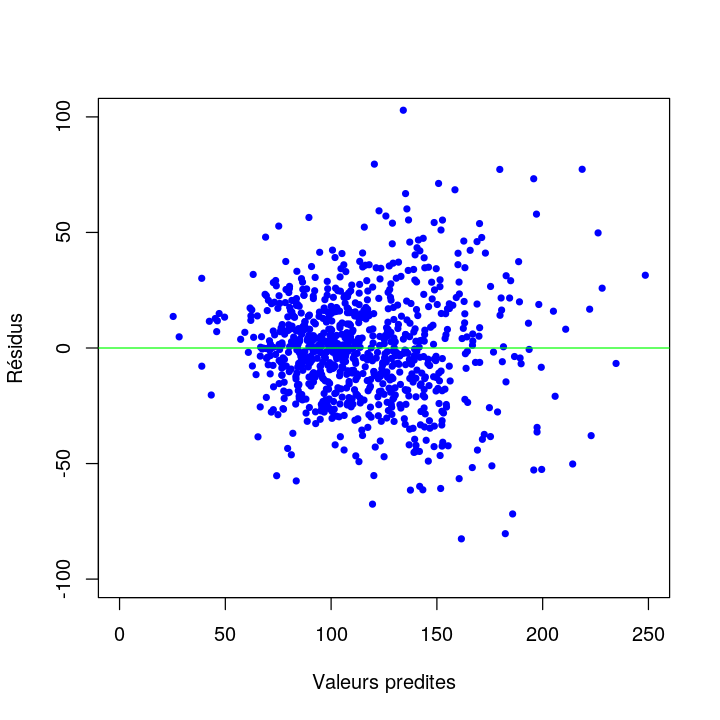

In [25]:
# Extraction des valeurs ajustées et des résidus
fit.glm=reg.glm.step$fitted.values
res.glm=reg.glm.step$residuals
# Graphe des résidus
plot.res(fit.glm,res.glm,"")

 On remarque que la présence de certains interactions ou variables sont pertinentes au sens du critère d'Akaïke mais pas significative au sens du test de Fisher. Cette présence dans le modèle pourrait être plus finement analysée en considérant une estimation de l'erreur par validation croisée. L'idée serait de retirer une à une les variables ou interactions les moins significatives pour voir comment se comporte la validation croisée. D'autre part, si la procédure pas-à-pas conduit à un modèle différent, l'estimation de l'erreur par validation croisée permet également d'optimiser le choix.
 
Ces raffinements ne s'avèrent pas efficace sur ces données. Le modèle obtenu par minimisaiton du critère AIC est conservé.

### Prévision de l'échantillon test

Le modèle "optimal"  obtenu est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. Deux erreurs sont estimées ; la première est celle quadratique pour la régression tandis que la deuxième est issue de la matrice de confusion qui croise les dépassements de seuils prédits avec ceux effectivement observés. 

In [26]:
# Calcul des prévisions
pred.glm=predict(reg.glm.step,newdata=datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 601,5874

In [27]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"]-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 1384,503

In [28]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.glm>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   161   19
  TRUE      5   24

In [29]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil par MOCAGE
table(datestr[,"MOCAGE"]>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   141   19
  TRUE     25   24

Noter ces erreurs pour les comparer avec celles obtenues par les autres méthodes. Noter l'asymétrie des erreurs.

## [Prévision par modèle binomial](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)

Plutôt que de prévoir la concentration puis le dépassement, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la présence ou l'absence d'un dépassement. La variable à modéliser étant binaire, c'est la régression logistique qui va être employée. Comme pour la régression, différentes stratégies de choix de modèle peuvent être utilisées et comparées avant d'estimer l'erreur de prévision sur l'échantillon test.

### Régression logistique sans interaction

In [30]:
# estimation du modèle complet
log.lm=glm(DepSeuil~.,data=datappq,family=binomial)
# significativité des paramètres
anova(log.lm,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,831,"737,8141",NA
JOUR,1,"0,4443555",830,"737,3698","5,050277e-01"
MOCAGE,1,"125,2166123",829,"612,1532","4,563158e-29"
TEMPE,1,"136,8421803",828,"475,3110","1,305601e-31"
STATION,4,"16,9891229",824,"458,3219","1,942378e-03"
VentMOD,1,"11,7860664",823,"446,5358","5,967570e-04"
VentANG,1,"0,8373860",822,"445,6984","3,601454e-01"
SRMH2O,1,"6,4120067",821,"439,2864","1,133512e-02"
LNO2,1,"0,1893011",820,"439,0971","6,634989e-01"
LNO,1,"5,3778575",819,"433,7192","2,039391e-02"


In [31]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step=step(log.lm,direction="backward")

Start:  AIC=459,72
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
- MOCAGE   1   434,25 458,25
- JOUR     1   434,36 458,36
- VentANG  1   434,60 458,60
<none>         433,72 459,72
- LNO      1   439,10 463,10
- LNO2     1   439,21 463,21
- SRMH2O   1   440,49 464,49
- VentMOD  1   440,90 464,90
- STATION  4   455,47 473,47
- TEMPE    1   550,99 574,99

Step:  AIC=458,25
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
- JOUR     1   434,79 456,79
- VentANG  1   435,23 457,23
<none>         434,25 458,25
- SRMH2O   1   441,49 463,49
- VentMOD  1   442,86 464,86
- LNO      1   447,00 469,00
- LNO2     1   451,13 473,13
- STATION  4   471,33 487,33
- TEMPE    1   558,59 580,59

Step:  AIC=456,79
DepSeuil ~ TEMPE + STATION + VentMOD + VentANG + SRMH2O + LNO2 + 
    LNO



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
- VentANG  1   436,01 456,01
<none>         434,79 456,79
- SRMH2O   1   442,19 462,19
- VentMOD  1   443,47 463,47
- LNO      1   447,38 467,38
- LNO2     1   451,41 471,41
- STATION  4   472,00 486,00
- TEMPE    1   559,99 579,99

Step:  AIC=456,01
DepSeuil ~ TEMPE + STATION + VentMOD + SRMH2O + LNO2 + LNO



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
<none>         436,01 456,01
- SRMH2O   1   443,83 461,83
- VentMOD  1   446,97 464,97
- LNO      1   448,16 466,16
- LNO2     1   452,55 470,55
- STATION  4   475,30 487,30
- TEMPE    1   565,19 583,19


In [32]:
# Modèle obtenu
anova(log.lm.step,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,831,"737,8141",NA
TEMPE,1,"214,189011",830,"523,6251","1,674882e-48"
STATION,4,"32,315989",826,"491,3091","1,648689e-06"
VentMOD,1,"29,015384",825,"462,2937","7,180577e-08"
SRMH2O,1,"9,116772",824,"453,1770","2,532764e-03"
LNO2,1,"5,017192",823,"448,1598","2,509684e-02"
LNO,1,"12,150777",822,"436,0090","4,906743e-04"


In [33]:
# matrice de confusion de l'échantillon 
# d'apprentissage et erreur apparente
table(log.lm.step$fitted.values>0.5,
   datappq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   673   70
  TRUE     24   65

### Régression logistique avec interactions

Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique  rencontre des soucis et affiche des *warnings* car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure *forward* ou  mieux *stepwise* de sélection des variables et interactions  conduit à des résultats raisonnables. 

In [34]:
# régression avec le modèle minimum
log.qm=glm(DepSeuil~1,data=datappq,family=binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
log.qm.step1=step(log.qm,direction="both",
  scope=list(lower=~1,upper=~(JOUR + MOCAGE + 
  TEMPE + STATION + VentMOD + VentANG + LNO2 + 
  LNO + SRMH2O)^2), family=binomial)

Start:  AIC=739,81
DepSeuil ~ 1



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
+ TEMPE    1   523,63 527,63
+ MOCAGE   1   613,24 617,24
+ SRMH2O   1   683,87 687,87
+ VentANG  1   726,72 730,72
+ STATION  4   721,68 731,68
+ LNO2     1   727,76 731,76
+ VentMOD  1   733,38 737,38
<none>         737,81 739,81
+ LNO      1   736,47 740,47
+ JOUR     1   737,37 741,37

Step:  AIC=527,63
DepSeuil ~ TEMPE



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

          Df Deviance    AIC
+ MOCAGE   1   476,67 482,67
+ STATION  4   491,31 503,31
+ SRMH2O   1   503,12 509,12
+ VentMOD  1   515,31 521,31
+ VentANG  1   516,54 522,54
<none>         523,63 527,63
+ LNO      1   521,92 527,92
+ JOUR     1   522,78 528,78
+ LNO2     1   523,06 529,06
- TEMPE    1   737,81 739,81

Step:  AIC=482,67
DepSeuil ~ TEMPE + MOCAGE



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

               Df Deviance    AIC
+ SRMH2O        1   465,50 473,50
+ STATION       4   460,11 474,11
+ LNO           1   470,23 478,23
+ LNO2          1   471,61 479,61
+ VentMOD       1   473,42 481,42
+ VentANG       1   473,55 481,55
<none>              476,67 482,67
+ JOUR          1   475,31 483,31
+ MOCAGE:TEMPE  1   475,40 483,40
- MOCAGE        1   523,63 527,63
- TEMPE         1   613,24 617,24

Step:  AIC=473,5
DepSeuil ~ TEMPE + MOCAGE + SRMH2O



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                Df Deviance    AIC
+ STATION        4   449,57 465,57
+ LNO            1   460,12 470,12
+ LNO2           1   461,24 471,24
<none>               465,50 473,50
+ VentANG        1   463,54 473,54
+ MOCAGE:TEMPE   1   463,74 473,74
+ TEMPE:SRMH2O   1   464,07 474,07
+ JOUR           1   464,25 474,25
+ VentMOD        1   464,47 474,47
+ MOCAGE:SRMH2O  1   465,32 475,32
- SRMH2O         1   476,67 482,67
- MOCAGE         1   503,12 509,12
- TEMPE          1   585,77 591,77

Step:  AIC=465,57
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                 Df Deviance    AIC
+ VentMOD         1   440,89 458,89
+ STATION:SRMH2O  4   435,71 459,71
+ TEMPE:STATION   4   436,45 460,45
+ VentANG         1   447,31 465,31
<none>                449,57 465,57
+ JOUR            1   448,13 466,13
+ TEMPE:SRMH2O    1   448,45 466,45
+ LNO             1   449,12 467,12
+ MOCAGE:TEMPE    1   449,40 467,40
+ MOCAGE:SRMH2O   1   449,47 467,47
+ LNO2            1   449,57 467,57
+ MOCAGE:STATION  4   444,97 468,97
- STATION         4   465,50 473,50
- SRMH2O          1   460,11 474,11
- MOCAGE          1   471,95 485,95
- TEMPE           1   568,69 582,69

Step:  AIC=458,89
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ VentMOD:SRMH2O   1   433,12 453,12
+ STATION:SRMH2O   4   428,25 454,25
+ TEMPE:STATION    4   429,21 455,21
+ MOCAGE:VentMOD   1   437,86 457,86
<none>                 440,89 458,89
+ TEMPE:SRMH2O     1   439,14 459,14
+ TEMPE:VentMOD    1   439,52 459,52
+ STATION:VentMOD  4   433,72 459,72
+ JOUR             1   439,89 459,89
+ VentANG          1   440,05 460,05
+ LNO2             1   440,61 460,61
+ MOCAGE:STATION   4   434,82 460,82
+ MOCAGE:SRMH2O    1   440,85 460,85
+ LNO              1   440,87 460,87
+ MOCAGE:TEMPE     1   440,89 460,89
- SRMH2O           1   447,78 463,78
- VentMOD          1   449,57 465,57
- MOCAGE           1   453,18 469,18
- STATION          4   464,47 474,47
- TEMPE            1   568,67 584,67

Step:  AIC=453,12
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + SRMH2O:VentMOD



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ TEMPE:STATION    4   420,27 448,27
<none>                 433,12 453,12
+ TEMPE:VentMOD    1   431,25 453,25
+ MOCAGE:VentMOD   1   431,25 453,25
+ TEMPE:SRMH2O     1   431,30 453,30
+ JOUR             1   432,20 454,20
+ STATION:SRMH2O   4   426,36 454,36
+ VentANG          1   432,88 454,88
+ LNO2             1   432,91 454,91
+ MOCAGE:STATION   4   426,93 454,93
+ MOCAGE:SRMH2O    1   432,97 454,97
+ MOCAGE:TEMPE     1   433,06 455,06
+ LNO              1   433,09 455,09
+ STATION:VentMOD  4   427,21 455,21
- SRMH2O:VentMOD   1   440,89 458,89
- MOCAGE           1   443,95 461,95
- STATION          4   456,16 468,16
- TEMPE            1   562,80 580,80

Step:  AIC=448,27
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + SRMH2O:VentMOD + 
    TEMPE:STATION



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ MOCAGE:VentMOD   1   416,43 446,43
<none>                 420,27 448,27
+ STATION:SRMH2O   4   412,28 448,28
+ JOUR             1   418,96 448,96
+ TEMPE:SRMH2O     1   419,00 449,00
+ MOCAGE:STATION   4   413,75 449,75
+ LNO2             1   419,91 449,91
+ MOCAGE:TEMPE     1   420,07 450,07
+ VentANG          1   420,14 450,14
+ TEMPE:VentMOD    1   420,16 450,16
+ MOCAGE:SRMH2O    1   420,26 450,26
+ LNO              1   420,27 450,27
+ STATION:VentMOD  4   414,31 450,31
- TEMPE:STATION    4   433,12 453,12
- SRMH2O:VentMOD   1   429,21 455,21
- MOCAGE           1   430,46 456,46

Step:  AIC=446,43
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + SRMH2O:VentMOD + 
    TEMPE:STATION + MOCAGE:VentMOD



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ STATION:SRMH2O   4   407,18 445,18
<none>                 416,43 446,43
+ MOCAGE:STATION   4   409,10 447,10
+ STATION:VentMOD  4   409,22 447,22
+ TEMPE:SRMH2O     1   415,32 447,32
+ JOUR             1   415,38 447,38
+ MOCAGE:SRMH2O    1   416,18 448,18
+ LNO              1   416,18 448,18
+ TEMPE:VentMOD    1   416,26 448,26
- MOCAGE:VentMOD   1   420,27 448,27
+ VentANG          1   416,35 448,35
+ LNO2             1   416,42 448,42
+ MOCAGE:TEMPE     1   416,43 448,43
- SRMH2O:VentMOD   1   423,51 451,51
- TEMPE:STATION    4   431,25 453,25

Step:  AIC=445,18
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + SRMH2O:VentMOD + 
    TEMPE:STATION + MOCAGE:VentMOD + SRMH2O:STATION



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ TEMPE:SRMH2O     1   400,92 440,92
- SRMH2O:VentMOD   1   408,29 444,29
+ MOCAGE:STATION   4   399,09 445,09
<none>                 407,18 445,18
+ JOUR             1   406,41 446,41
- SRMH2O:STATION   4   416,43 446,43
+ LNO              1   406,91 446,91
+ MOCAGE:SRMH2O    1   407,09 447,09
+ TEMPE:VentMOD    1   407,09 447,09
+ MOCAGE:TEMPE     1   407,16 447,16
+ LNO2             1   407,17 447,17
+ VentANG          1   407,18 447,18
+ STATION:VentMOD  4   401,87 447,87
- MOCAGE:VentMOD   1   412,28 448,28
- TEMPE:STATION    4   423,74 453,74

Step:  AIC=440,92
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + SRMH2O:VentMOD + 
    TEMPE:STATION + MOCAGE:VentMOD + SRMH2O:STATION + TEMPE:SRMH2O



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
- SRMH2O:VentMOD   1   401,35 439,35
+ MOCAGE:STATION   4   392,59 440,59
<none>                 400,92 440,92
+ LNO              1   400,56 442,56
+ JOUR             1   400,67 442,67
+ TEMPE:VentMOD    1   400,80 442,80
+ MOCAGE:SRMH2O    1   400,85 442,85
+ MOCAGE:TEMPE     1   400,89 442,89
+ VentANG          1   400,91 442,91
+ LNO2             1   400,91 442,91
+ STATION:VentMOD  4   395,74 443,74
- MOCAGE:VentMOD   1   406,40 444,40
- TEMPE:SRMH2O     1   407,18 445,18
- SRMH2O:STATION   4   415,32 447,32
- TEMPE:STATION    4   418,28 450,28

Step:  AIC=439,35
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + TEMPE:STATION + 
    MOCAGE:VentMOD + SRMH2O:STATION + TEMPE:SRMH2O



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
+ MOCAGE:STATION   4   392,81 438,81
<none>                 401,35 439,35
+ VentMOD:SRMH2O   1   400,92 440,92
+ LNO              1   400,99 440,99
+ JOUR             1   401,13 441,13
+ TEMPE:VentMOD    1   401,19 441,19
+ MOCAGE:SRMH2O    1   401,26 441,26
+ MOCAGE:TEMPE     1   401,31 441,31
+ VentANG          1   401,34 441,34
+ LNO2             1   401,35 441,35
+ STATION:VentMOD  4   396,44 442,44
- MOCAGE:VentMOD   1   407,80 443,80
- TEMPE:SRMH2O     1   408,29 444,29
- TEMPE:STATION    4   418,74 448,74
- SRMH2O:STATION   4   422,61 452,61

Step:  AIC=438,81
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + TEMPE:STATION + 
    MOCAGE:VentMOD + SRMH2O:STATION + TEMPE:SRMH2O + MOCAGE:STATION



Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduits lors de la conversion automatique”

                  Df Deviance    AIC
<none>                 392,81 438,81
+ MOCAGE:TEMPE     1   390,84 438,84
- MOCAGE:STATION   4   401,35 439,35
+ STATION:VentMOD  4   385,49 439,49
+ LNO              1   391,76 439,76
+ TEMPE:VentMOD    1   392,45 440,45
+ VentMOD:SRMH2O   1   392,59 440,59
+ LNO2             1   392,62 440,62
+ VentANG          1   392,75 440,75
+ JOUR             1   392,76 440,76
+ MOCAGE:SRMH2O    1   392,80 440,80
- TEMPE:SRMH2O     1   399,88 443,88
- MOCAGE:VentMOD   1   400,05 444,05
- TEMPE:STATION    4   407,76 445,76
- SRMH2O:STATION   4   415,01 453,01


In [35]:
anova(log.qm.step1,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,831,"737,8141",NA
TEMPE,1,"214,189011",830,"523,6251","1,674882e-48"
MOCAGE,1,"46,956415",829,"476,6687","7,258302e-12"
SRMH2O,1,"11,172483",828,"465,4962","8,301945e-04"
STATION,4,"15,922320",824,"449,5739","3,125190e-03"
VentMOD,1,"8,683311",823,"440,8906","3,211370e-03"
TEMPE:STATION,4,"11,682335",819,"429,2083","1,987666e-02"
MOCAGE:VentMOD,1,"5,702069",818,"423,5062","1,694493e-02"
SRMH2O:STATION,4,"15,218744",814,"408,2874","4,268380e-03"
TEMPE:SRMH2O,1,"6,941017",813,"401,3464","8,424122e-03"


In [36]:
# Prévision
pred.log=predict(log.qm.step1,newdata=datestq,type="response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log>0.5,datestq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   164   20
  TRUE      2   23

Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

### [Courbe ROC](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf)

Il est également possible de construire une courbe ROC en association de la prévision obtenue à partir d'un modèle gaussien. En effet, la variation du seuil théorique de dépassement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore à faire varier le seuil d'une "proba" pour les valeurs de prévisions divisées par 300.

In [37]:
library(ROCR)   # Librairie à charger

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [38]:
install.packages("ROCR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


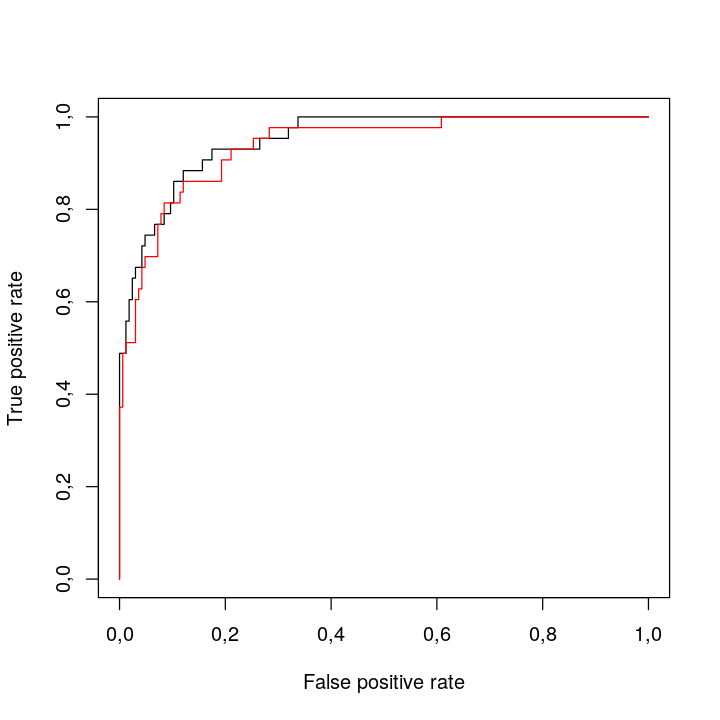

In [39]:
roclogit=predict(log.qm.step1,newdata=datestq,type="response")
predlogit=prediction(roclogit,datestq[,"DepSeuil"])
perflogit=performance(predlogit, "tpr","fpr")
# Tracé de la courbe
plot(perflogit,col=1)
# Calculs pour la régression
rocglm=pred.glm/300
predglm=prediction(rocglm,datestq[,"DepSeuil"])
perfglm=performance(predglm, "tpr","fpr")
# tracé de la courbe et ajout au graphe précédent.
plot(perfglm,col=2,add=TRUE)

**Q** Que sont sensibilité et spécificité d'une courbe ROC?

**Réponse** 
sensibilité/spécificité, est une mesure de la performance d'un classificateur binaire, c'est-à-dire d'un système qui a pour objectif de catégoriser des éléments en deux groupes distincts sur la base d'une ou plusieurs des caractéristiques de chacun de ces éléments. Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction des positifs qui sont effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés). *


* Sensibilité (aussi appelée Fraction de Vrais Positifs): proportion d'individus positifs effectivement bien détectes par le test. Autrement dit, la sensibilité permet de mesurer à quel point le test est performant lorsqu'il est utilisé sur des individus positifs. Le test est parfait pour les individus positifs lorsque la sensibilité vaut 1, équivalent a un tirage au hasard lorsque la sensibilité vaut 0.5. S'il est inferieur à 0.5, le test est contre-performant et on aurait intérêt à inverser la règle pour qu'il soit supérieur à 0.5 (à condition que cela n'affecte pas la spécificité). La définition mathématique est : Sensibilité = VP/(VP + FN).
* Spécificité (aussi appelée Fraction de Vrais Négatifs): proportion d'individus négatifs effectivement bien détectes par le test. Autrement dit, la spécificité permet de mesurer à quel point le test est performant lorsqu'il est utilisé sur des individus négatifs. Le test est parfait pour les individus négatifs lorsque la spécificité vaut 1, équivalent à un tirage au hasard lorsque la spécificité vaut 0.5. S'il est inferieur à 0.5, le test est contre-performant et on aurait intérêt à inverser la règle pour qu'il soit supérieur à 0.5 (à condition que cela n'affecte pas la sensibilité). La définition mathématique est : Spécificité = VN/(VN + FP).






Les résultats obtenus dépendent évidemment en plus de l'échantillonnage initial entre apprentissage et test. Dans le cas où les courbes se croisent, cela signifie qu'il n'y a pas de prévision uniformément meilleure de l'occurrence de dépassement. Cela dépend de la sensibilité ou de la spécificité retenue pour le modèle. Ceci souligne l'importance de la bonne définition du critère à utiliser pour le choix d'une "meilleure" méthode. Ce choix dépend directement de celui , "politique" ou "économique" de sensibilité et / ou spécificité du modèle retenu. En d'autres termes, quel taux de fausse alerte, avec des imputations économiques évidentes, est supportable au regard des dépassements non détectés et donc de la dégradation sanitaire de la population à risque ?
 
C'est une fois ce choix arrêté que le statisticien peut opérer une comparaison des méthodes en présence.

**Q** Les performances des deux approches gaussiennes et binomiales sont-elles très différentes?

**Réponse** Les deux approches ont montré des résultats similaires 

# <FONT COLOR="Red">Épisode 2</font>

## [Analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf)

### Introduction

 L'objectif est de comparer les trois méthodes d'analyses discriminantes disponibles dans R: `lda` paramétrique linéaire (homoscédasticité), `qda` paramétrique quadratique (hétéroscédasticité) sous hypothèse gaussienne et celle non-paramétrique des $k$ plus proches voisins.
 
**Q** Quel critère d'affectation est utilisé en `lda`?

**Réponse**  Il s’agit d’expliquer et de prédire l’appartenance d’un individu à une classe (groupe) prédéfinie à partir de ses caractéristiques mesurées à l’aide de variables prédictives. 



**Q** Que signifient les hypothèses d'homo ou d'hétéroscédasticité?
**Réponse**  
On parle d'homoscédasticité lorsque la variance des erreurs stochastiques de la régression est la même pour chaque observation i (de 1 à n observations) contrairement a hétéroscédasticité cette variance est variable
selon les obeservations.



**Q** Quelle fonction est estimée "non paramétriquement" par l'algorithme des $k$ plus proches voisins?

**Réponse**  
 Méthode non paramétrique d’Elgammalet 
 Soientx1,x2,...,xt−1, les vecteurs de couleur (vecteur de dimension 3 :xi= (xi,1,xi,2,xi,3))d’un pixel aux instants précédents l’instantt. La densité de probabilitépà l’instanttest estiméenon-paramétriquement en utilisant le noyau K
 
 
*Attention*
, ces techniques n'acceptent par principe que des variables explicatives ou prédictives quantitatives. Néanmoins, une variable qualitative à deux modalités, par exemple le type de jour, peut être considérée comme quantitative sous la forme d'une fonction indicatrice prenant ses valeurs dans $\{0, 1\}$ et, de façon plus "abusive", une variable ordinale est considérée comme "réelle". Dans ce dernier cas, il ne faut pas tenter d'interpréter les fonctions de discrimination, juste considérer des erreurs de prévision. La variable *Station* n'est pas prise en compte.

La bibliothèque standard de R (`MASS`) pour l'analyse discriminante ne propose pas de procédure automatique de choix de variable mais, dans cet exemple, les variables sont peu nombreuses.

### Estimation des modèles

In [42]:
library(MASS) # chargement des librairies
library(class) # pour kNN

In [43]:
# analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4]) 
# analyse discriminante quadratique 
disc.qda=qda(DepSeuil~.,data=datappq[,-4]) 
# k plus proches voisins
disc.knn=knn(datappq[,c(-4,-10)],datappq[,c(-4,-10)],datappq$DepSeuil,k=10) 

Warning message in knn(datappq[, c(-4, -10)], datappq[, c(-4, -10)], datappq$DepSeuil, :
“NAs introduits lors de la conversion automatique”Warning message in knn(datappq[, c(-4, -10)], datappq[, c(-4, -10)], datappq$DepSeuil, :
“NAs introduits lors de la conversion automatique”

ERROR: Error in knn(datappq[, c(-4, -10)], datappq[, c(-4, -10)], datappq$DepSeuil, : NA/NaN/Inf dans un appel à une fonction externe (argument 6)


Noter le manque d'homogénéité des commandes de R issues de librairies différentes. L'indice de colonne négatif ($-10$) permet de retirer la colonne contenant la variable à prédire de type facteur. Celle-ci est mentionnée en troisième paramètre pour les données d'apprentissage. La librairie [caret](http://topepo.github.io/caret/index.html) contourne ces difficultés en englobant toutes les librairies d'apprentissage et en homogénéisant les appels pour l'estimation et la prévision des modèles. 

### Estimation de l'erreur de prévision par validation croisée

In [44]:
# erreur par validation croisée  en analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4],CV=T) 
# estimer le taux d'erreur à partir de la matrice de confusion
table(datappq[,"DepSeuil"],disc.lda$class) 

       
        FALSE TRUE
  FALSE   673   24
  TRUE     77   58

In [45]:
# analyse discriminante quadratique
disc.qda=qda(DepSeuil~.,data=datappq[,-4],CV=T)  
table(datappq[,"DepSeuil"],disc.qda$class) 

       
        FALSE TRUE
  FALSE   665   32
  TRUE     78   57

Pour knn, le choix du nombre de voisins $k$ doit être optimisé par validation croisée mais la procédure proposée par la bibliothèque `class` est celle *leave-one-out*, donc trop coûteuse en calcul pour des gros fichiers. Il serait simple de la programmer mais une autre bibliothèque (`e1071`) propose déjà une batterie de fonctions de validation croisée pour de nombreuses techniques de discrimination. 

In [46]:
install.packages("e1071")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [47]:
# k plus proches voisins: optimisation de k
library(e1071)
plot(tune.knn(as.matrix(datappq[,c(-4,-10)]),as.factor(datappq[,10]),k=2:20))

Warning message in knn(train = x$train, cl = x$cl, k = x$k, l = x$l, ...):
“NAs introduits lors de la conversion automatique”Warning message in knn(train = x$train, cl = x$cl, k = x$k, l = x$l, ...):
“NAs introduits lors de la conversion automatique”

ERROR: Error in knn(train = x$train, cl = x$cl, k = x$k, l = x$l, ...): NA/NaN/Inf dans un appel à une fonction externe (argument 6)


**Q** Quelle procédure de validation croisée est exécutée par défaut par la fonction `tune`?

**Réponse** 
Par défaut, la methode de validation croisée utilise est aproche K-fold.

Lancer plusieurs exécutions successives de cette "optimisation".

**Q** Pourquoi la valeur de $k$ optimale diffère à chaque exécution? Comment choisir k ? 

**Réponse** la valeur de K change puisque la methode de CV change a chaque execution les données de input. Le
choix de k dans la méthode des k plus proches voisins est souvent délicat puique chque execution
donne un resultats different On choisi le K minimal.

Comparer avec les erreurs précédentes estimées également par validation croisée. 

**Q** Quelle analyse discriminante retenir ? Pourquoi?


### Erreur sur l'échantillon test

Les commandes suivantes calculent la matrice de confusion pour la "meilleure" méthode d'analyse discriminante au sens de la validation croisée. Cette "meilleure" méthode peut être edifférente d'un participant à l'autre.

In [48]:
disc.lda=lda(DepSeuil~.,data=datappq[,-4])  
table(datestq[,"DepSeuil"],predict(disc.lda,datestq[,-4])$class)

       
        FALSE TRUE
  FALSE   162    4
  TRUE     21   22

A titre indicatif, voici l'estimation de l'erreur sur l'échantillon test pour la méthode des $k$ plus proches voisins.

In [49]:
disc.knn=knn(as.matrix(datappq[,c(-4,-10)]),as.matrix(datestq[,c(-4,-10)]),datappq$DepSeuil,k=15)
table(disc.knn,datestq$DepSeuil)

Warning message in knn(as.matrix(datappq[, c(-4, -10)]), as.matrix(datestq[, c(-4, :
“NAs introduits lors de la conversion automatique”Warning message in knn(as.matrix(datappq[, c(-4, -10)]), as.matrix(datestq[, c(-4, :
“NAs introduits lors de la conversion automatique”

ERROR: Error in knn(as.matrix(datappq[, c(-4, -10)]), as.matrix(datestq[, c(-4, : NA/NaN/Inf dans un appel à une fonction externe (argument 6)


### Courbes ROC

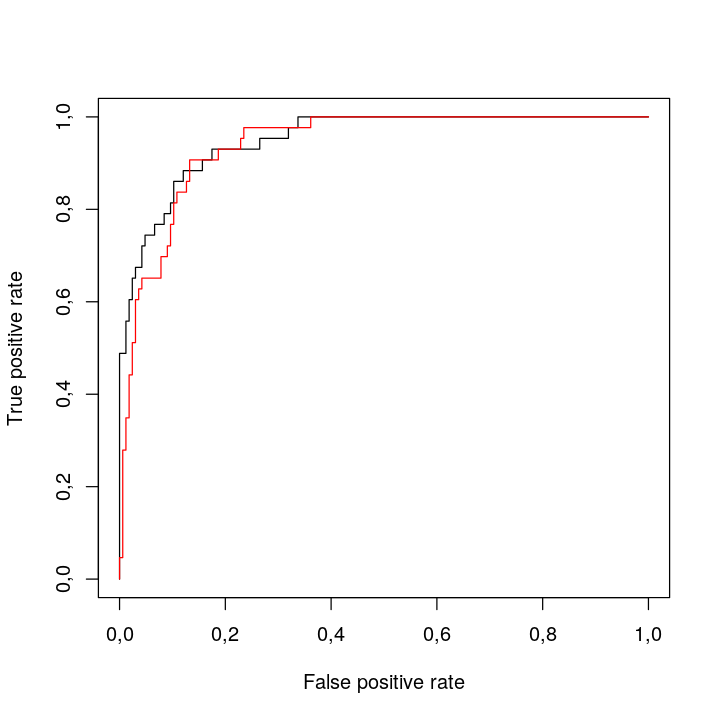

In [50]:
ROCdiscrim=predict(disc.lda,datestq[,c(-4)])$posterior[,2]
preddiscrim=prediction(ROCdiscrim,datestq$DepSeuil)
perfdiscrim=performance(preddiscrim,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1) 
plot(perfdiscrim,col=2,add=TRUE)  

**Q** Une méthode est elle uniformément meilleure sur cet échantillon test ?

**Réponse** Oui le 'lda'

## [Arbre de décision binaire](http://wikistat.fr/pdf/st-m-app-cart.pdf)

La librairie  `rpart` est celle la plus couramment utilisée pour la construction d'arbres de décision. Deux types d'arbre peuvent être estimer selon que la variable à modéliser est la concentration d'ozone (arbre de régression) ou directement le dépassement du seuil (arbre de discrimination ou de décision). Différents paramètres  contrôlent l'exécution de l'algorithme: la pénalisation  minimale (`cp`) pour la construction de l'arbre maximal, le nombre minimal d'observation par noeud, le nombre de validations croisées (par défaut 10)... cf. l'aide en ligne (?rpart.control) pour plus de détails mais celle-ci n'est pas très explicite sur certains paramètres, c'est le travers des logiciels "libres".

**NB.** Une séquence de valeurs de la pénalisation `cp` est associée à une séquence d'arbres emboîtés.


### Estimation et élagage de l'arbre de régression

**Q** Quel critère est optimisé lors de la création d'un noeud? de l'arbre?

**Réponse** 
Dépend du type de la variable Y

In [51]:
library(rpart) # chargement de la librairie
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu
# summary(tree.reg)  
# mais un graphe est  préférable

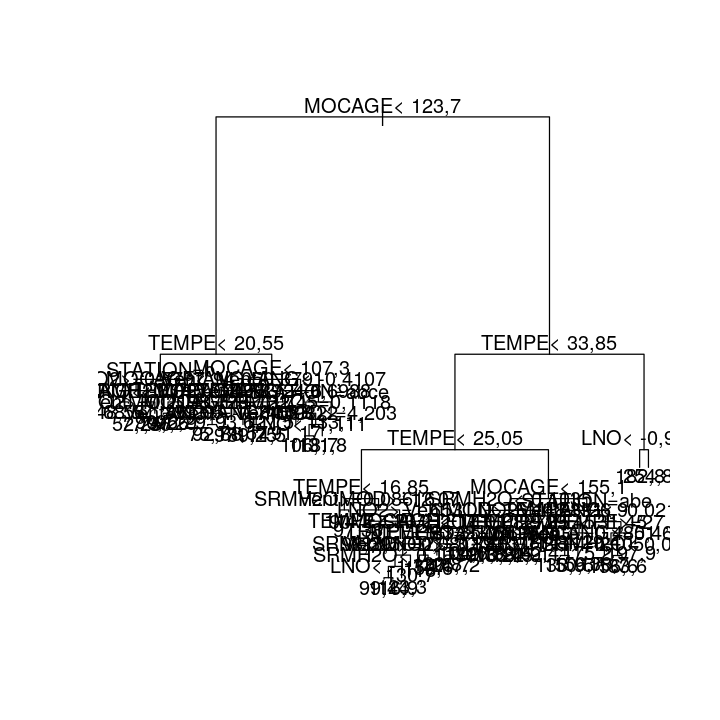

In [52]:
plot(tree.reg)
text(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par  validation croisée *10-fold* pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par `rpart`. 

In [53]:

xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"O3obs"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0,650389937 0,190757054 0,086599002 0,044402955 0,026636689 0,018187164 
  1397492,5    990085,8    909252,8    814752,1    731282,4    739444,7 
0,013732509 0,011084622 0,008362540 0,007221621 0,006956881 0,006653914 
   736083,3    729994,2    743642,2    739293,0    747548,0    748783,1 
0,006487036 0,006270700 0,005972066 0,005319037 0,004732087 0,004557061 
   739117,7    739157,1    746815,0    741732,1    732417,1    736012,1 
0,004513292 0,004302262 0,004031475 0,003886693 0,003757776 0,003456486 
   735210,9    735179,1    740248,4    743210,8    734063,2    735265,4 
0,002930327 0,002647561 0,002567387 0,002437882 0,002374911 0,002342909 
   750484,7    745539,1    748246,2    759093,0    760035,9    758975,4 
0,002280352 0,002186360 0,002005132 0,001884622 0,001785959 0,001682822 
   759679,5    757110,0    756790,5    758336,0    758414,5    761064,7 
0,001630264 0,001587103 0,001579396 0,001451242 0,001333661 0,001326259 
   758346,1    761960,3    761960,3    768295,0    765948,3    765948,3 
0,001314821 0,001281492 0,001246655 0,001224731 0,001193056 0,001087566 
   765776,7    765674,8    764553,0    763260,3    763477,6    766210,7 
0,001004035 
   768021,8

Chercher la valeur de `cp` correspondant à la plus petite erreur puis l'utiliser la construction del'arbre.

In [54]:
minCVerr = attributes(which.min(CVerr))$names
#as.numeric(attributes(which.min(CVerr))$names)
minCVerr

[1] "0,011084622"

In [55]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

Warning message in rpart.control(cp = as.numeric(attributes(which.min(CVerr))$names)):
“NAs introduits lors de la conversion automatique”

In [56]:
install.packages("partykit")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


La librairie `partykit` propose une construction graphique de l'arbre:

Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm


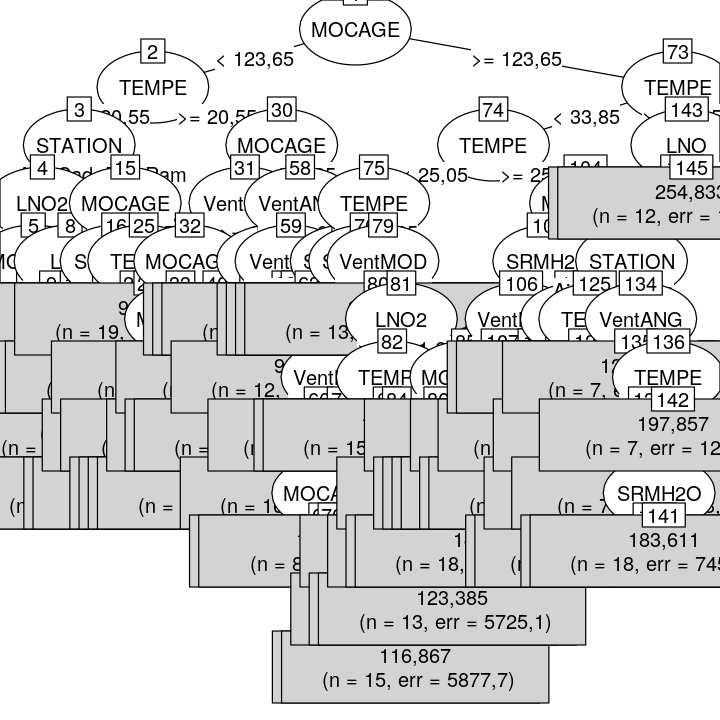

In [57]:
library(partykit)
plot(as.party(tree.reg), type="simple")

La fenêtre est trop petite pour représenter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille. 

**Q** Quelle est la variable qui contribue le plus à l'interprétation?

**Réponse** 
TMPE


Graphe des résidus

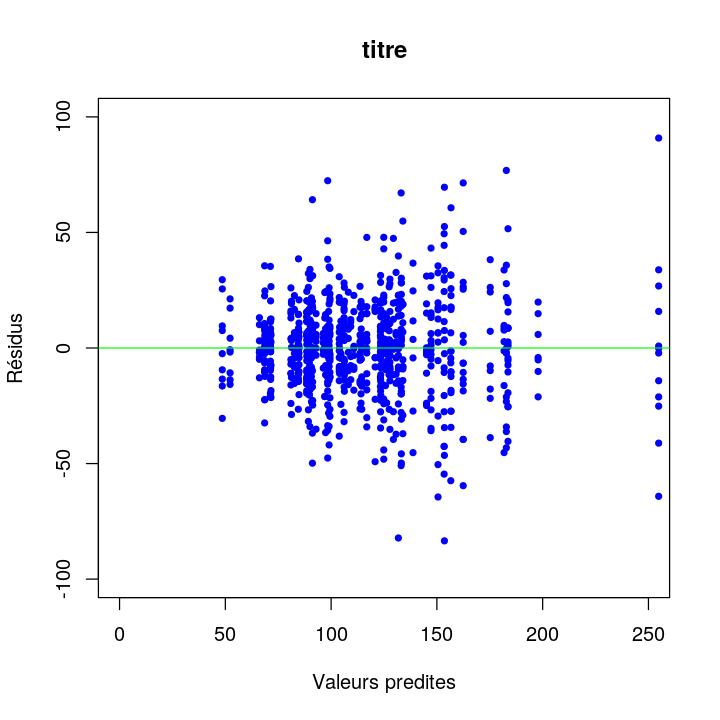

In [58]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
plot.res(fit.tree,res.tree)

**Q** A quoi est due la structure particulière de ce graphe?

**Réponse** 

### Estimation et élagage d'un arbre de discrimination

Dans le cas d'une discrimination, le critère par défaut est l'indice de concentration de Gini ; il est possible de préciser un autre critère (split="information") ainsi que des poids sur les observations, une matrice de coûts de mauvais classement ainsi que des probabilités *a priori* (?rpart pour plus de détails).

**Q** Quel autre critère d'hétérogénéité est utilisé?

**Réponse** un critère défini à partir de la notion d’entropie
L’hétérogénéité  du  nœudκest  définie  par  l’entropie  qui  s’écrit  avec  la convention log(0) = 0:

Dκ = −2m ∑`=1|κ|p` κ log (p`κ) où p`κ est la proportion de la classe T`de Y dans le nœudκ.

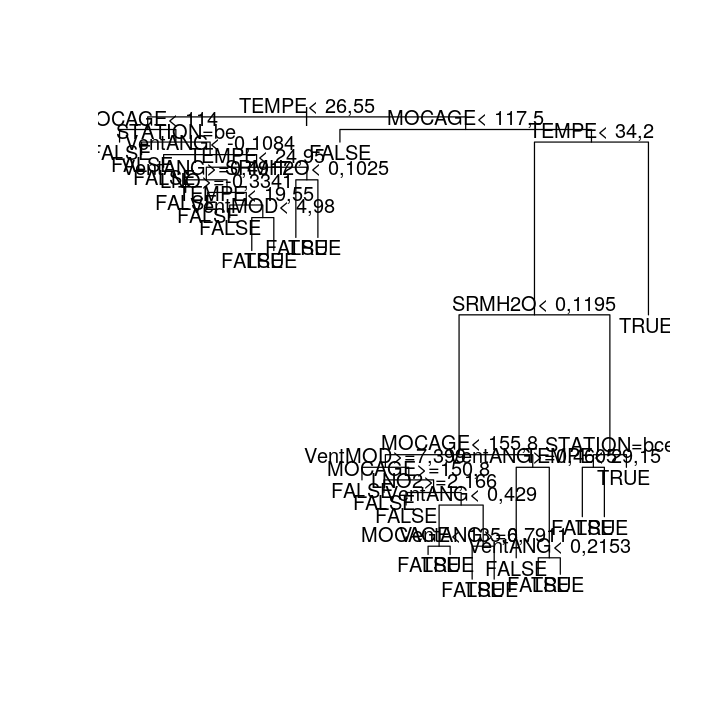

In [59]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)  

La même procédure d'élagage par validation croisée est mise en place mais avec un expression différente de l'erreur de prévision: taux de mal classés plutôt qu'erreur quadratique.

In [60]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5) 
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0,525925926 0,045961754 0,030089031 0,018144368 0,012394963 0,009799079 
  0,1622596   0,1358173   0,1370192   0,1334135   0,1370192   0,1562500 
0,008281733 0,002721655 
  0,1562500   0,1586538

In [61]:
as.numeric(attributes(which.min(CVerr))$names)

Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”

[1] NA

Warning message in rpart(DepSeuil ~ ., data = datappq, parms = list(split = "information"), :
“NAs introduits lors de la conversion automatique”

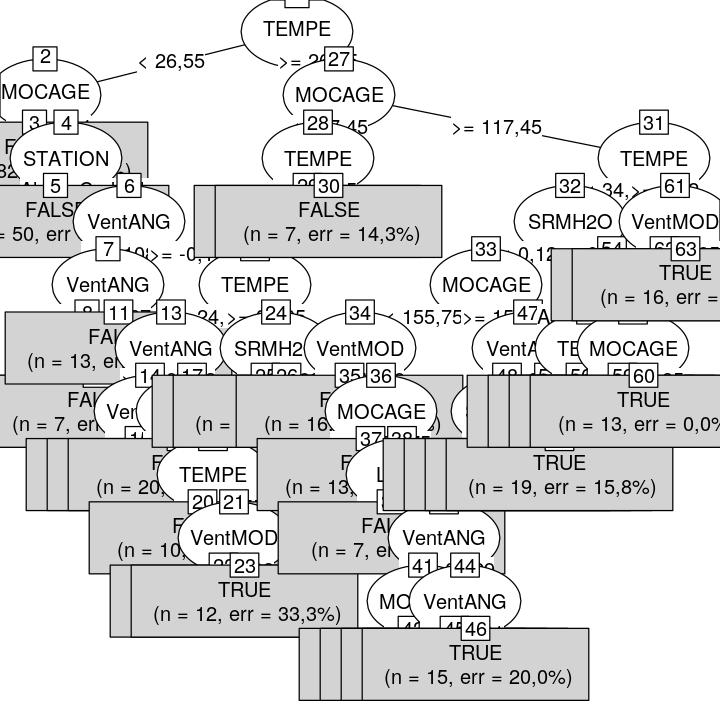

In [62]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

### Prévision de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 

In [63]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 744,8227

In [64]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.treer>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   159   17
  TRUE      7   26

In [65]:
# Même chose pour l'arbre de discrimination
table(pred.treeq,datestq[,"DepSeuil"])

          
pred.treeq FALSE TRUE
     FALSE   155   20
     TRUE     11   23

**Q** Quelle stratégie semble meilleure à ce niveau?

**Réponse** La meilleure stratégie semble etre Matrice de confusion

### Courbes ROC

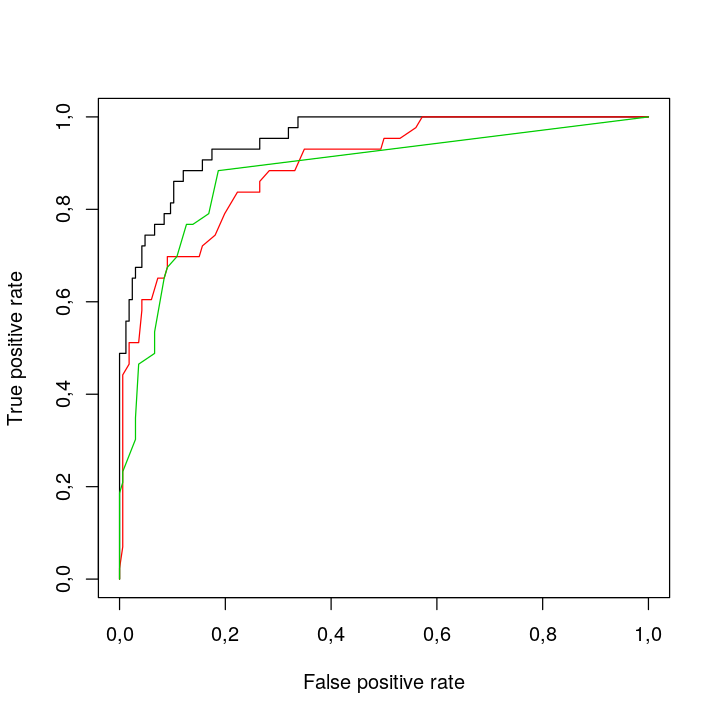

In [66]:
ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfregtree,col=2,add=TRUE) 
plot(perfdistree,col=3,add=TRUE)  

Comparer les qualités  de prévision.

**Q** Une meilleure méthode se dégage-t-elle?

**Réponse** La meilleure méthode est bien la régression logistique 

# <FONT COLOR="Red">Épisode 3</font>

## [Réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf)

### Introduction

Il s'agit d'estimer un modèle de type *perceptron* avec en entrée les variables qualitatives ou quantitatives et en sortie la variable à prévoir. Des fonctions R pour l'apprentissage d'un perceptron élémentaire ont été réalisées par différents auteurs et sont accessibles sur le réseau. La librairie `nnet` de (Ripley, 1999), est limitée au perceptron à une couche. Ce n'est pas de l'*apprentissage profond* ! mais suffisant dans bien des cas. Une librairie R associée au logiciel éponyme H2O propose des réseaux à plusieurs couches et "convolutionnels".

Comme pour les arbres, la variable à expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un réseau doit être adaptée en conséquence. 

**Q** Quelle fonction de transfert pour le dernier neurone en régression ?

**Réponse** le neurone de sortie est muni  de la fonction sigmoïde

**Q** Quelle focntion de transfert pour le dernier neuronne en discrimination binaire?

**Réponse**  la fonction sigmoïde (softmax pour multi classes)

**Q** Quid de la discrimination avec plusieurs classes?


Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première conciste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent être considérés et sur une seule couche cachée. 

**Q** Quel est le paramètre `decay` de la fonction `nnet`?

**Réponse** decay : le paramètre de décomposition 
 le rôle de decay étant d'éviter le sur-ajustement du modèle

**Q** Indiquer une autre façon déviter le sur-apprentissage.

**Réponse**
 on sépare les données en deux sous-ensembles : l'ensemble d'apprentissage et l'ensemble de validation. L'ensemble d'apprentissage comme son nom l'indique permet de faire évoluer les poids du réseau de neurones avec par exemple une rétropropagation. L'ensemble de validation n'est pas utilisé pour l'apprentissage mais permet de vérifier la pertinence du réseau avec des échantillons qu'il ne connait pas. 

### Cas de la régression

In [67]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  71
initial  value 12382216,137118 
iter  10 value 1420171,357719
iter  20 value 1400805,372168
iter  30 value 1375051,723530
iter  40 value 1273680,206652
iter  50 value 1194217,853659
iter  60 value 1172614,237959
iter  70 value 1155547,976696
iter  80 value 1143862,073932
iter  90 value 1104422,497204
iter 100 value 920781,329580
iter 110 value 824243,012569
iter 120 value 792397,093253
iter 130 value 770620,458444
iter 140 value 743504,972096
iter 150 value 725061,353711
iter 160 value 703522,201788
iter 170 value 687980,705591
iter 180 value 637571,751410
iter 190 value 621407,834735
iter 200 value 600258,878026
iter 210 value 591471,956156
iter 220 value 575981,074601
iter 230 value 570164,280978
iter 240 value 557119,016440
iter 250 value 547195,016620
iter 260 value 545147,583789
iter 270 value 542707,267811
iter 280 value 539869,147865
iter 290 value 536751,736323
iter 300 value 532234,048650
iter 310 value 530816,818304
iter 320 value 529821,559070
iter 330 value 5

a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   2,61  -13,67   -0,60    6,06   -0,02    3,57    8,75  -19,27    1,68   -3,58 
i10->h1 i11->h1 i12->h1 
  -5,06  -12,38    3,66 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0,13   -0,03    0,07   -0,02   -0,03   -0,51    1,23   -1,54   -0,34    0,94 
i10->h2 i11->h2 i12->h2 
 -34,53   -0,93    0,94 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  12,16   -0,21   -0,02   -0,30   -1,79   -0,60   -1,26   -0,47    0,04    0,12 
i10->h3 i11->h3 i12->h3 
 -26,32    1,60   -1,78 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  -4,68    5,87    0,23    1,74  -17,65    3,44   -9,61    5,87    1,26  -15,82 
i10->h4 i11->h4 i12->h4 
  -8,44  -21,14   15,24 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

La commande donne la "trace" de l'exécution avec le comportement de la convergence mais le détail des poids de chaque entrée de chaque neurone ne constituent pas des résultats très explicites ! Contrôler le nombre de poids estimés.

L'optimisation des paramètres nécessite encore le passage par la validation croisée. Il n'y a pas de fonction dans la librairie `nnet` permettant de le faire mais la fonction ` tune.nnet` de la librairie `e1071` est adaptée à cette démarche.

In [72]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(0,1,2),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))

Faire éventuellement varier la grille des paramètres (zoom), noter la taille et le `decay` optimaux. Il faudrait aussi  faire varier le nombre total d'itérations. Cela risque de prendre un peu de temps ! Noter également que chaque exécution donne des résultats différents... il n'est donc pas très utile d'y passer beaucoup de temps !

Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus. 

# weights:  43
initial  value 12541262,303139 
iter  10 value 1343635,624156
iter  20 value 1294195,745680
iter  30 value 790969,566493
iter  40 value 720474,707963
iter  50 value 711348,776120
iter  60 value 706637,707722
iter  70 value 687719,060424
iter  80 value 663367,601547
iter  90 value 618209,789445
iter 100 value 611784,511314
iter 110 value 611335,848669
iter 120 value 610375,707821
iter 130 value 607281,312735
iter 140 value 601616,926646
iter 150 value 586000,019466
iter 160 value 583315,218656
iter 170 value 581802,418883
iter 180 value 579579,266743
iter 190 value 574730,375591
iter 200 value 573429,702188
final  value 573429,702188 
stopped after 200 iterations


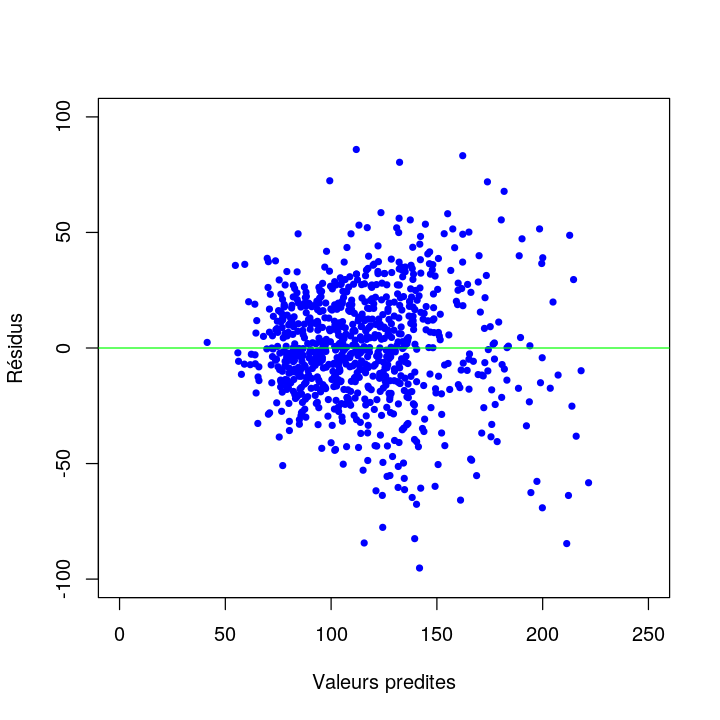

In [69]:
nnet.reg=nnet(O3obs~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"O3obs"]
plot.res(fit.nnetr,res.nnetr,titre="")

### Cas de la discrimination

In [70]:
# apprentissage
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

# weights:  71
initial  value 817,338682 
iter  10 value 368,907070
iter  10 value 368,907067
iter  10 value 368,907067
final  value 368,907067 
converged


a 12-3-1 network with 43 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -14,40   -0,22    0,01    0,43    0,61    0,18    2,82   -0,41   -0,04    0,31 
i10->h1 i11->h1 i12->h1 
  17,54   -1,18    1,86 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0,77    0,41    0,01    0,05    0,85    3,86   -0,58    6,50   -0,15   -0,03 
i10->h2 i11->h2 i12->h2 
   5,28   -0,99    0,28 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -0,10   -0,03   -0,05   -0,16    2,15    2,52  -11,23    3,01    0,12   -0,32 
i10->h3 i11->h3 i12->h3 
  22,36    2,52   -2,78 
  b->o  h1->o  h2->o  h3->o 
 76,25  93,75  56,89 -62,93 

La validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence : nombre de neurones, `decay` et éventuellement le nombre max d'itérations. 

L'initialisation de l'apprentissage d'un réseau de neurone comme celle de l'estimation de l'erreur par validation croisée sont aléatoires. Chaque exécution donne donc des résultats différents. À ce niveau, il serait intéressant de construire un plan d'expérience à deux facteurs (ici, les paramètres de taille et `decay`) de chacun trois niveaux. Plusieurs réalisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une idée plus juste de l'influence de ces facteurs sur l'erreur. 

Noter la taille et le `decay` optimaux et ré-estimer le modèle pour ces valeurs.

In [73]:
plot(tune.nnet(DepSeuil~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

Warning message in pad1.rm.cm(widths, cm.widths, len = num.cols):
“NAs introduits lors de la conversion automatique”

ERROR: Error in plot.new(): outer margins too large (figure region too small)


In [74]:
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=1) 

# weights:  71
initial  value 412,849827 
iter  10 value 369,016472
iter  20 value 357,347718
iter  30 value 310,652306
iter  40 value 288,598988
iter  50 value 283,010949
iter  60 value 278,923745
iter  70 value 276,621617
iter  80 value 276,018216
iter  90 value 275,622887
iter 100 value 275,580295
final  value 275,580295 
stopped after 100 iterations


### Prévisions de l'échantillon test


Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 


In [75]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 609,4618

In [76]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.nnetr>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   162   21
  TRUE      4   22

In [77]:
# Même chose pour la discrimination
table(pred.nnetq>0.5,datestq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   166   33
  TRUE      0   10

### Courbes ROC

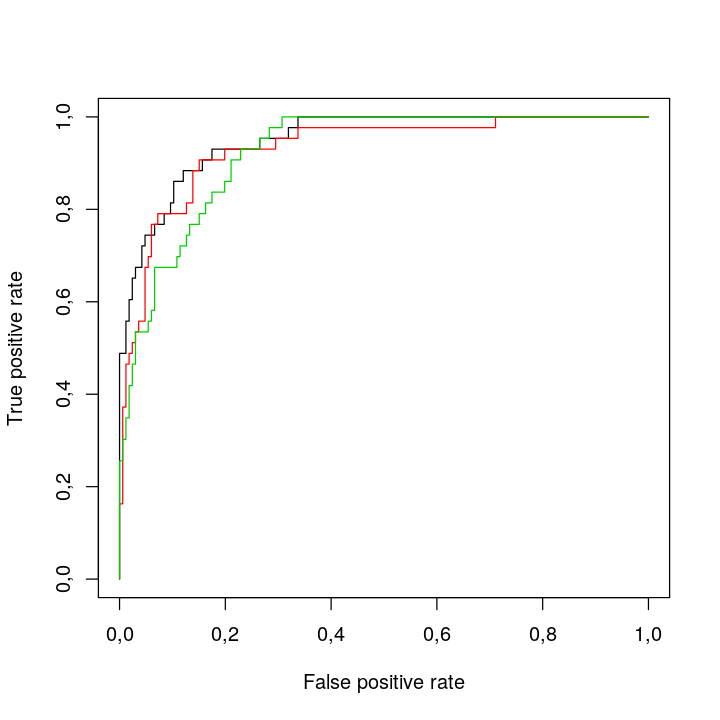

In [78]:
rocnnetr=pred.nnetr/300
prednnetr=prediction(rocnnetr,datestq$DepSeuil)
perfnnetr=performance(prednnetr,"tpr","fpr")
rocnnetq=pred.nnetq
prednnetq=prediction(rocnnetq,datestq$DepSeuil)
perfnnetq=performance(prednnetq,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1)

plot(perfnnetr,col=2,add=TRUE) 
plot(perfnnetq,col=3,add=TRUE)  

**Q** Une méthode semble-t-elle significativement meilleure?

**Réponse** les resultats semble pas trop différentes 

## [Agrégation de modèles](http://wikistat.fr/pdf/st-m-app-agreg.pdf)

### Introduction

Les sections précédentes ont permis d'expérimenter les constructions d'un modèle de prévision assorties du problème récurrent lié à l'optimisation de la complexité d'un modèle. Cette section aborde d'autres stratégies dont l'objectif est de s'affranchir de ce problème de choix, par des méthodes se montrant pas ou très peu sensibles au sur-apprentissage ; c'est le cas des algorithmes d'agrégation de modèles.

Cette section propose de mettre en évidence la plus ou moins grande influence des paramètres de ces méthodes. 
* *Random forest*: nombre d'arbres et `mtry` et intérêt des critères de Breiman permettant de mesurer l'influence des variables au sein d'une famille agrégée de modèles. 
* Le *bagging*, cas particulier de forêt aléatoire, n'est pas traité;
* *Boosting*: profondeur d'arbre, nombre d'itérations ou d'arbres et coefficient de *shrinkage*.

**Q** Quel est le paramètre `mtry` de la fonction `randomForest`?

**Réponse** le nombre de variables testées à chaque division (mtry)

**Q** En quoi le bagging est un cas particulier des forêts aléatoires?


**Réponse** 
Le but est de baisser la variance et l'’assemblage d’arbres de décision construits sur la base d’un tirage aléatoire parmi les observations

### Forêts aléatoires

Le programme est disponible dans la librairie *randomForest*. Il est écrit en fortran, donc en principe efficace en terme de rapidité d'exécution, et facile à utiliser grâce à une interface avec R. La comparaison avec Python montre qu'il n'est finalement pas très efficace sans doute à cause de l'interface avec R. Les paramètres et sorties sont explicités dans l'aide en ligne.

En R et pour des gros fichiers, privilégier la librairie `ranger` à la place de `ranfomForest`. 

#### Régression

In [79]:
library(randomForest)
rf.reg=randomForest(O3obs~., data=datappr,xtest=datestr[,-2],ytest=datestr[,"O3obs"],
   ntree=500,do.trace=50,importance=TRUE)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |    735,2    43,87 |    621,7    36,77 |
 100 |    699,3    41,73 |    604,4    35,75 |
 150 |    689,3    41,13 |    592,1    35,03 |
 200 |    685,8    40,92 |    585,6    34,64 |
 250 |    685,1    40,88 |    584,7    34,59 |
 300 |    682,5    40,73 |    581,6    34,40 |
 350 |    677,1    40,40 |    582,4    34,45 |
 400 |    677,7    40,44 |    581,4    34,39 |
 450 |    677,9    40,45 |    579,9    34,30 |
 500 |    675,9    40,33 |    579,6    34,28 |


**Q** Quelles est la valeur par défaut de `mtry`?

**Réponse** la valeur par défaut de mtry (qui correspond à la racine carrée du nombre de variables) 

Relancer en faisant varier les paramètres `mtry` et `ntree` pour expérimenter leur peu d'influence sur les erreurs.

Calcul et graphe des résidus.

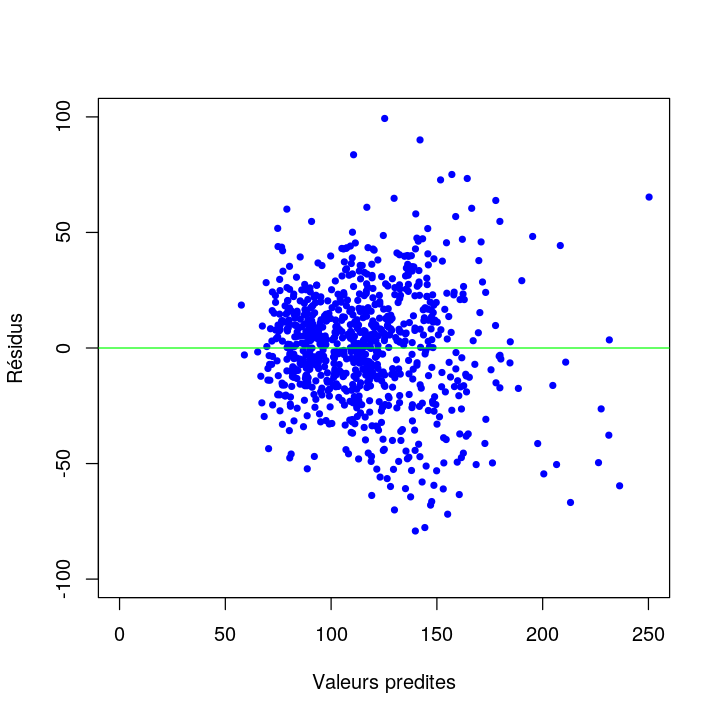

In [80]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"O3obs"]
plot.res(fit.rfr,res.rfr,titre="")

#### Discrimination
**Q** Quelle est la valeur par défaut de `mtry`?

**Réponse**
la valeur par défaut de mtry (qui correspond à la racine carrée du nombre de variables) 

In [81]:
rf.dis=randomForest(DepSeuil~.,data=datappq,xtest=datestq[,-10],ytest=datestq[,
   "DepSeuil"],ntree=500,do.trace=50,importance=TRUE)

ntree      OOB      1      2|    Test      1      2
   50:  12,50%  4,16% 55,56%|  12,44%  2,41% 51,16%
  100:  12,50%  3,87% 57,04%|  11,96%  1,20% 53,49%
  150:  12,38%  4,16% 54,81%|  12,92%  2,41% 53,49%
  200:  12,14%  3,73% 55,56%|  12,92%  2,41% 53,49%
  250:  12,38%  4,16% 54,81%|  13,40%  2,41% 55,81%
  300:  12,14%  3,73% 55,56%|  11,96%  1,81% 51,16%
  350:  11,90%  3,73% 54,07%|  12,44%  1,81% 53,49%
  400:  11,66%  4,02% 51,11%|  11,96%  1,20% 53,49%
  450:  11,42%  3,73% 51,11%|  12,44%  1,81% 53,49%
  500:  11,30%  3,73% 50,37%|  12,44%  1,81% 53,49%


Commenter les erreurs, tester d'autres exécutions avec d'autres valeurs des paramètres.

#### Prévision de l'échantillon test

In [82]:
pred.rfr=rf.reg$test$predicted
pred.rfq=rf.dis$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 579,5899

In [83]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.rfr>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   163   18
  TRUE      3   25

In [84]:
# Même chose pour la discrimination
table(pred.rfq,datestq[,"DepSeuil"])

        
pred.rfq FALSE TRUE
   FALSE   163   23
   TRUE      3   20

#### Importance des variables

Le modèle obtenu est ininterprétable mais des coefficients estiment les contributions des variables dans leur participation à la discrimination. Comparer avec les variables sélectionnées par les autres modèles. deux critères d'importance sont proposés.

**Q** Quelles sont les deux mesures d'importance des variables?

**Réponse** La corrélation entre les variables et la qualité des variables 

In [85]:

sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)
sort(round(importance(rf.dis), 2)[,4], decreasing=TRUE)

TEMPE  MOCAGE STATION VentANG     LNO    LNO2  SRMH2O VentMOD    JOUR 
  53,77   35,14   22,23   16,88   14,86   14,55   14,33   13,82    0,40

TEMPE  MOCAGE  SRMH2O VentANG VentMOD     LNO    LNO2 STATION    JOUR 
  64,59   40,65   25,76   25,30   19,77   18,12   17,69   11,28    2,08

### Boosting

Deux librairies proposent des versions relativement  sophistiquées des algorithmes de *boosting* dans R. La librairie *boost* propose 4 approches : *adaboost, bagboost* et deux *logitboost*. Développées pour une problématique particulière : l'analyse des données d'expression génomique, elle n'est peut-être pas complètement adaptée aux données étudiées ; elles se limitent à des prédicteurs quantitatifs et peut fournir des résultats étranges. La librairie *gbm* lui est préférée ; elle offre aussi plusieurs versions dépendant de la fonction coût choisie. Une librairie plus récente `xgboost` intègre des fonctionnalités de parallélisation (pas sous Windows) et fait intervenir plusieurs autres paramètres.

La variable à prévoir doit être codée numériquement (0,1) pour cette implémentation. Le nombre d'itérations, ou nombre d'arbres, est paramétré ainsi qu'un coefficient de rétrécissement (*shrinkage*).

**Q** Comment intervient le *schrinkage* en *boosting*? 

**Réponse** 
Il définit les étapes prises dans la descente du gradient de boosting, comme le learning
rate avec avec les stochastique gradient. 

Dans le cas de random forest , les algorithmes faibles sont des arbres de décision unitaires, construits de façon totalement indépendante. 

Chaque algorithme dispose de la même voix pour le vote fi nal. Le boosting est un peu moins démocratique et réalise une somme pondérée pour la décision fi nale. 
- soit h 1 ... h 5 le premier fait un résultat, le deuxieme h 2 se base sur le h 1 pour produire sont résultats ainsi de suite. Au finale on obtient un H qui
assemble toues les coupures h i .

**Q** Pour quel boosting? Ou que signifie `gbm`?

**Réponse** Gradient Boosting Machine


*Attention*, par défaut, ce paramètre a une valeur très faible (0.001) et il faut un nombre important d'itérations (d'arbres) pour atteindre une estimation raisonnable. La qualité est visualisée par un graphe représentant l'évolution de l'erreur d'apprentissage. D'autre part, une procédure de validation croisée est incorporée afin d'optimiser le nombre d'arbres car la version de *boosting* considérée est (légèrement) sujette au sur-apprentissage.

#### Régression

In [86]:
 install.packages("gbm") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loaded gbm 2.1.5


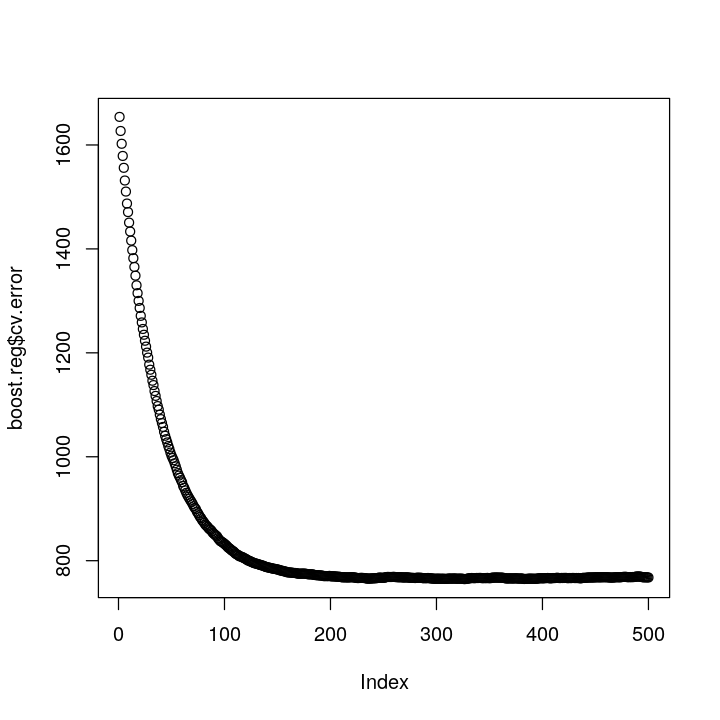

In [87]:
library(gbm)
boost.reg=gbm(O3obs~., data=datappr,distribution="gaussian",n.trees=500, cv.folds=10,
        n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error)

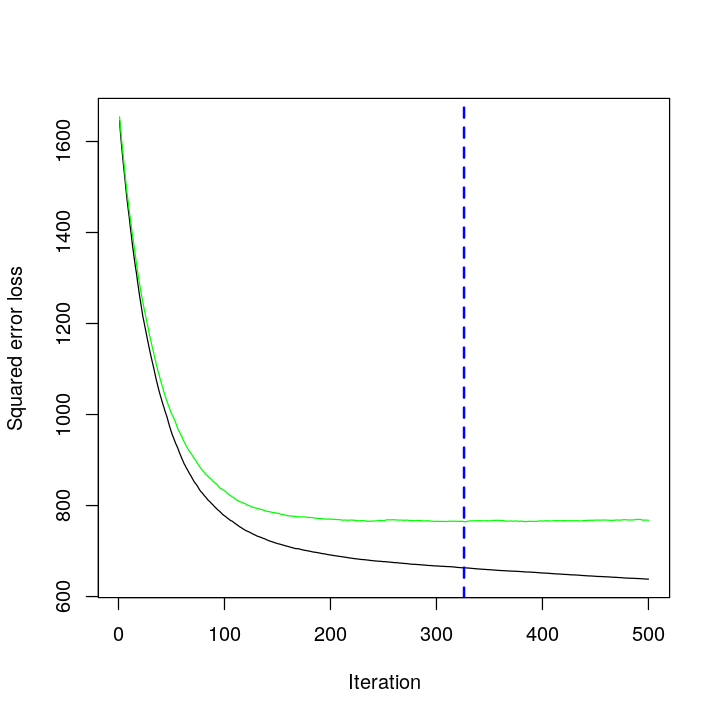

In [88]:


# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")

On peut s'assurer de l'absence d'un phénomène de sur-apprentissage critique en calculant puis traçant l'évolution de l'erreur sur l'échantillon test en fonction du nombre d'arbre dans le modèle. L'erreur reste stable autour du nombre d'arbres sélectionné et matérialisé par la ligne verticale. 

**Q** Tester ces fonctions en faisant varier le coefficient de rétrécissement.

**Réponse**  modif de shrinkage à 0.3


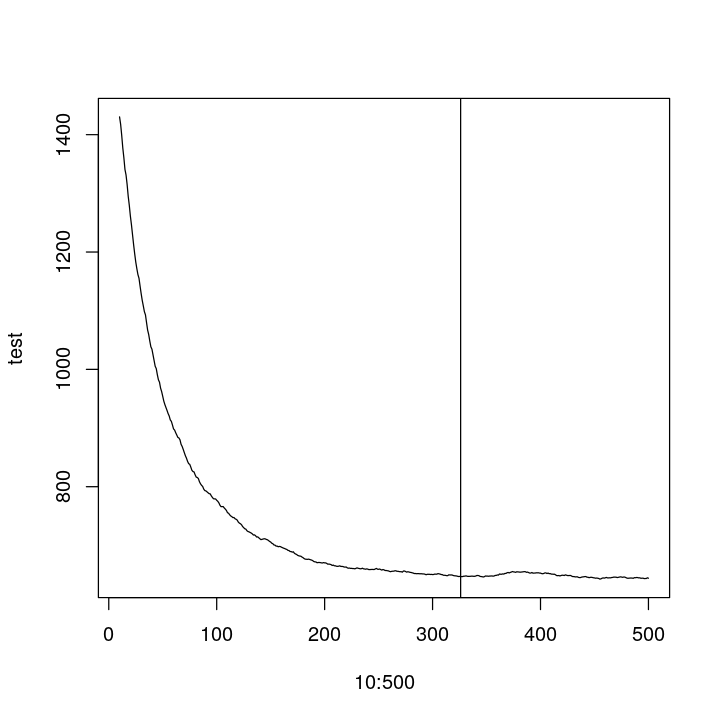

In [89]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"O3obs"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:500,test,type="l")
abline(v=best.iter)

#### Discrimination

Attention, la variable à modéliser doit être codée $(0, 1)$ et il faut préciser un autre paramètre de distribution pour considérer le bon terme d'erreur.

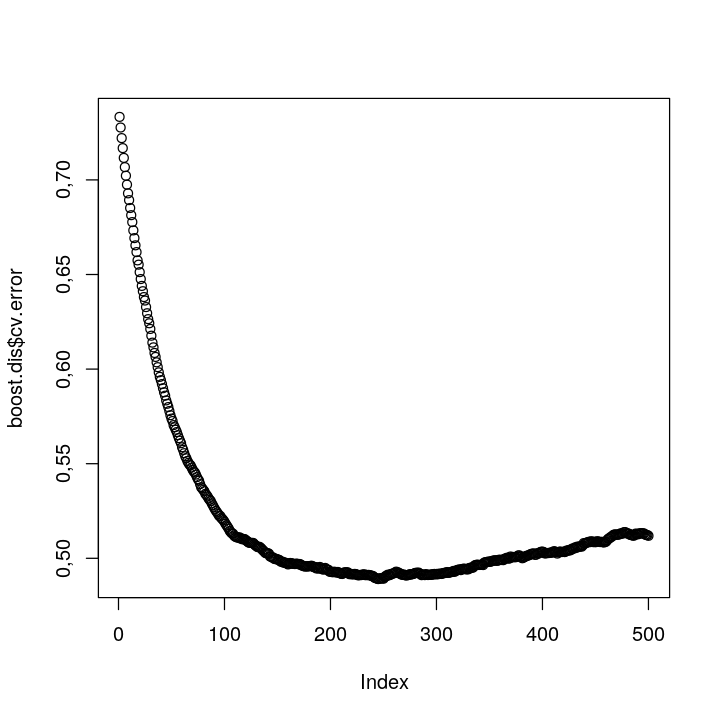

In [90]:
datappq2=datappq
datappq2[,"DepSeuil"]=as.numeric(datappq[,"DepSeuil"])-1
boost.dis=gbm(DepSeuil~.,data=datappq2,distribution="adaboost",n.trees=500, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)
plot(boost.dis$cv.error)

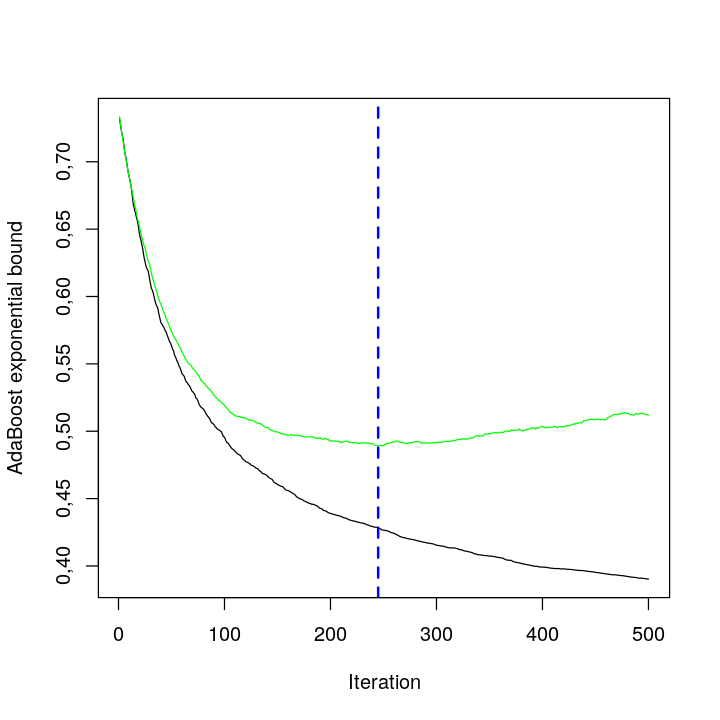

In [91]:
# nombre optimal d'itérations 
best.ited=gbm.perf(boost.dis,method="cv")

Comme pour la régression, il est possible de faire varier le coefficient de rétrécissement en l'associant au nombre d'arbres dans le modèle.

Calcul des résidus et graphe.

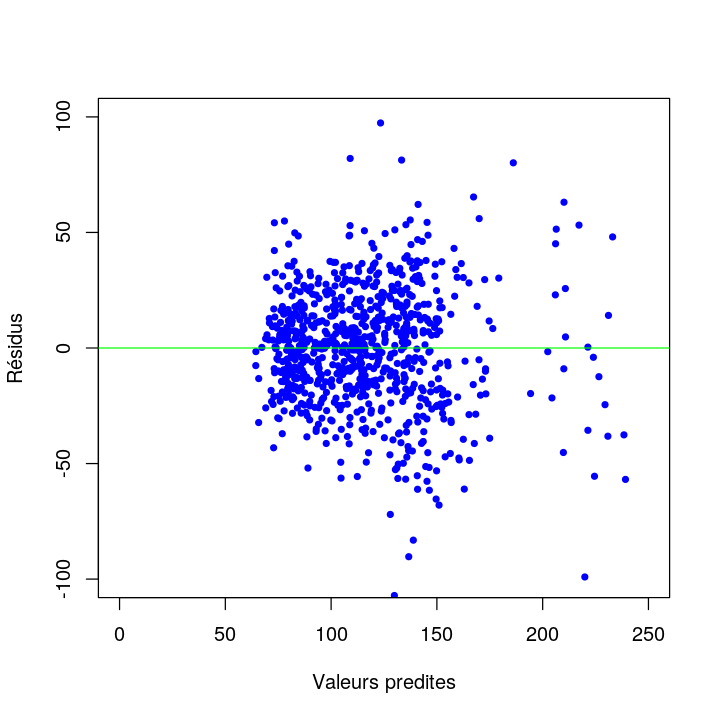

In [92]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"O3obs"]
plot.res(fit.boostr,res.boostr,titre="")

### Echantillon test

In [93]:
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=best.iter)
# Erreur quadratique moyenne de prévision
sum((pred.boostr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 646,8918

In [94]:
# Matrice de confusion pour la prévision 
# du dépassement de seuil (régression)
table(pred.boostr>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   162   24
  TRUE      4   19

In [95]:
# Même chose pour la discrimination
pred.boostd=predict(boost.dis,newdata=datestq,n.trees=best.ited)
table(as.factor(sign(pred.boostd)),datestq[,"DepSeuil"])

    
     FALSE TRUE
  -1   163   24
  1      3   19

**Q** Quelle  stratégie d'agrégation de modèles vous semble fournir le meilleur résultat de prévision? 

**Réponse**  Matrice de confusion pour la prévision 

**Q** Est-elle, sur ce jeu de données, plus efficace que les modèles classiques expérimentés auparavant ?

**Réponse** les modèles sont plus efficace

### Courbes ROC

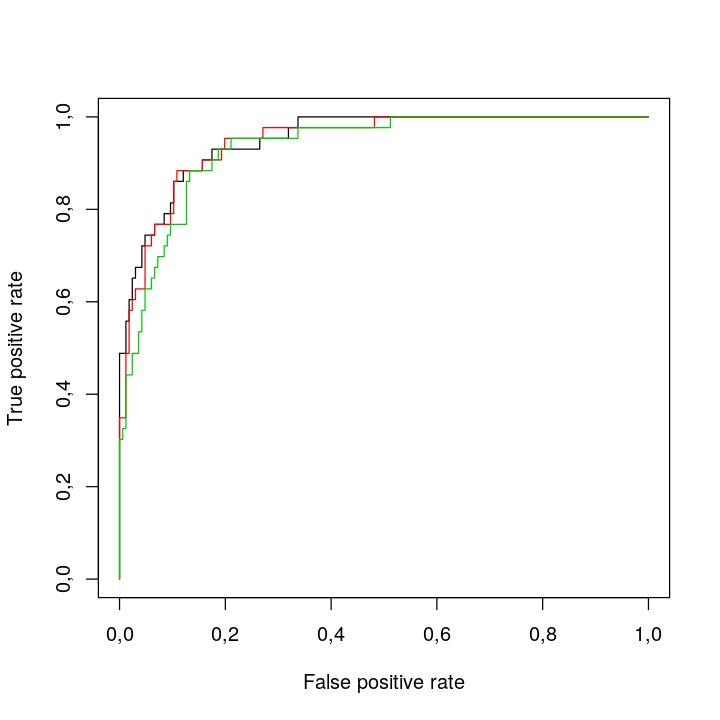

In [96]:
rocrfr=pred.rfr/300
predrfr=prediction(rocrfr,datestq$DepSeuil)
perfrfr=performance(predrfr,"tpr","fpr")

rocbstr=pred.boostr/300
predbstr=prediction(rocbstr,datestq$DepSeuil)
perfbstr=performance(predbstr,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfrfr,col=2,add=TRUE)  
plot(perfbstr,col=3,add=TRUE)  

**Q** Qu'indique la comparaison des coubes ROC?

**Réponse** les modèles ont des résultats proche 

# <FONT COLOR="Red">Épisode 4</font>

## [Séparateur à Vaste Marge (SVM)](http://wikistat.fr/pdf/st-m-app-svm.pdf)

### Introduction

Malgré les assurances théoriques concernant ce type d'algorithme, les résultats dépendant fortement du choix des paramètres. Nous nous limiterons d'abord au noyau gaussien (choix par défaut) ; la fonction `tune.svm` permet de tester facilement plusieurs situations en estimant la qualité de prévision par validation croisée sur une grille. Le temps d'exécution en R est un peu long... 

**Q** Le temps d'exécution pour les SVM est-il plus sensible au nombre d'observations ou au nombre de varaibles ? Pourquoi ?

**Réponse**

dépond du   nombre  des   entrées   à   classer   (d)  et   du   nombre  de   données d’apprentissage (n).En  effet,   on  doit  au  moins  parcourir   tous  les  éléments  de  la  matrice  ainsi  que  toutes  lesentrées..Pour un très grand nombre de données d’apprentissage, le temps de calcul explose. C’estpourquoi les SVMs sont pratiques pour des «petits» problèmes de classification.

### Régression

Bien qu'initialement développés dans le cas d'une variable binaire, les SVM ont été étendus aux problèmes de régression. L'estimation et l'optimisation du coefficient de pénalisation sont obtenues par les commandes suivantes.  


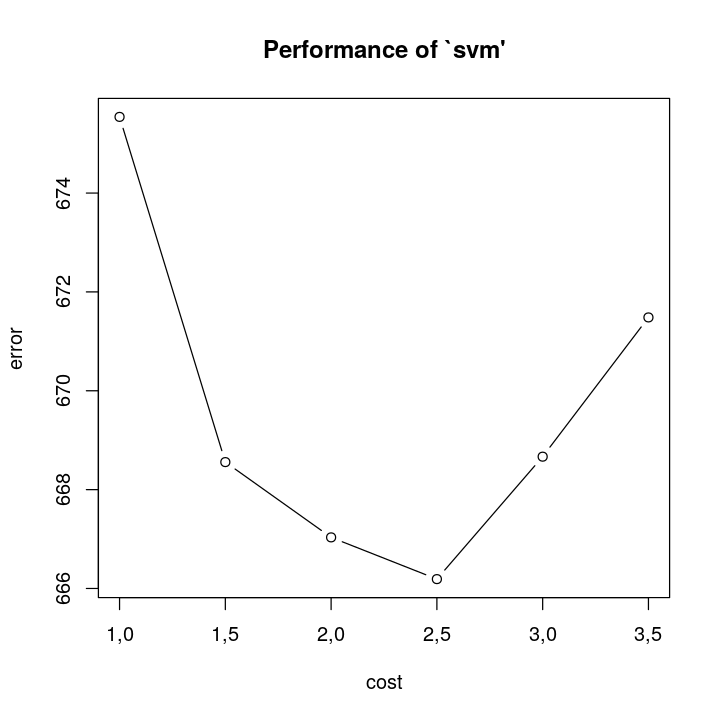

In [97]:
library(e1071)
svm.reg=svm(O3obs~.,data=datappr)
plot(tune.svm(O3obs~.,data=datappr,cost=c(1, 1.5,2,2.5,3,3.5)))

Par défaut la pénalisation (cost) vaut 1. Noter la pénalisation optimale pour le noyau considéré (gaussien). Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus. Comme précédemment, observer que plusieurs exécutions conduisent à des résultats différents et donc que l'optimisaiton de ce paramètre est pour le moins délicate.

**Q** Quels autres noyaux sont dispnibles dans cette implémentation des SVM?

**Réponse** 

Linéaire •Polynomial •Gaussien •Laplacie

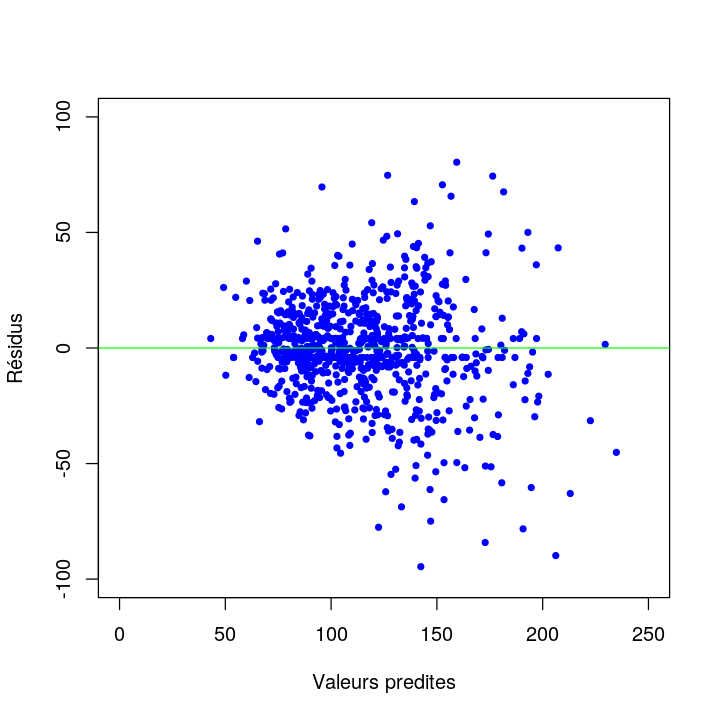

In [98]:
svm.reg=svm(O3obs~.,data=datappr,cost=2)
# calcul et graphe des résidus
fit.svmr=predict(svm.reg,data=datappr)
res.svmr=fit.svmr-datappr[,"O3obs"]
plot.res(fit.svmr,res.svmr,titre="")

Observer l'effet ''couloir'' sur les résidus. 


**Q** Qu'est-ce qui cause le rapprochement des résidus dans un "couloir"? 

**R"ponse**
la fonction d’erreur robuste utilisée pour l’estimation des svm.

### Discrimination

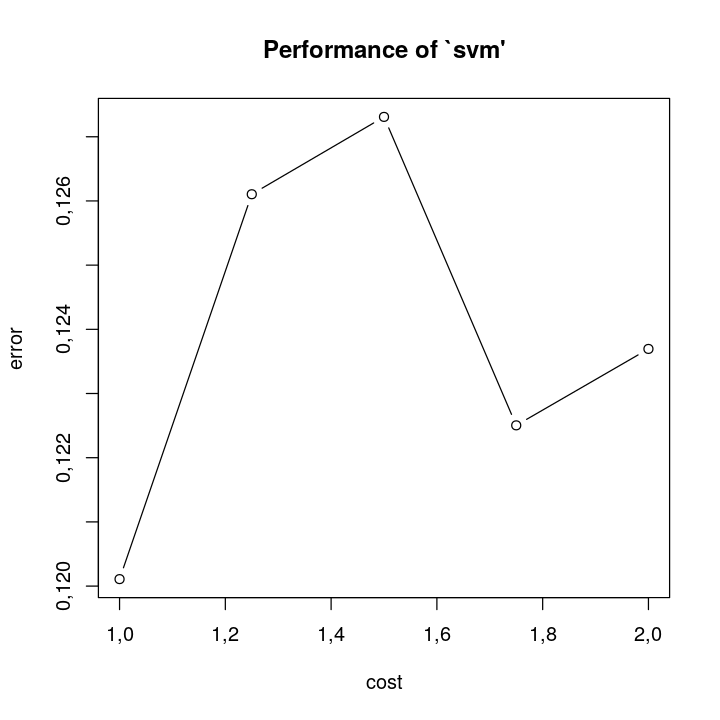

In [99]:
# optimisation
plot(tune.svm(DepSeuil~.,data=datappq,cost=c(1,1.25,1.5,1.75,2))) 

In [100]:
# apprentissage
svm.dis=svm(DepSeuil~.,data=datappq,cost=1.25) 

### Echantillon test

In [101]:
pred.svmr=predict(svm.reg,newdata=datestr)
pred.svmq=predict(svm.dis,newdata=datestq)
# Erreur quadratique moyenne de prévision
sum((pred.svmr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 531,2289

In [102]:
# Matrice de confusion pour la prévision du dépassement de seuil (régression)
table(pred.svmr>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   163   16
  TRUE      3   27

In [103]:
# Même chose pour la discrimination
table(pred.svmq,datestq[,"DepSeuil"])

         
pred.svmq FALSE TRUE
    FALSE   164   23
    TRUE      2   20

### Courbes ROC

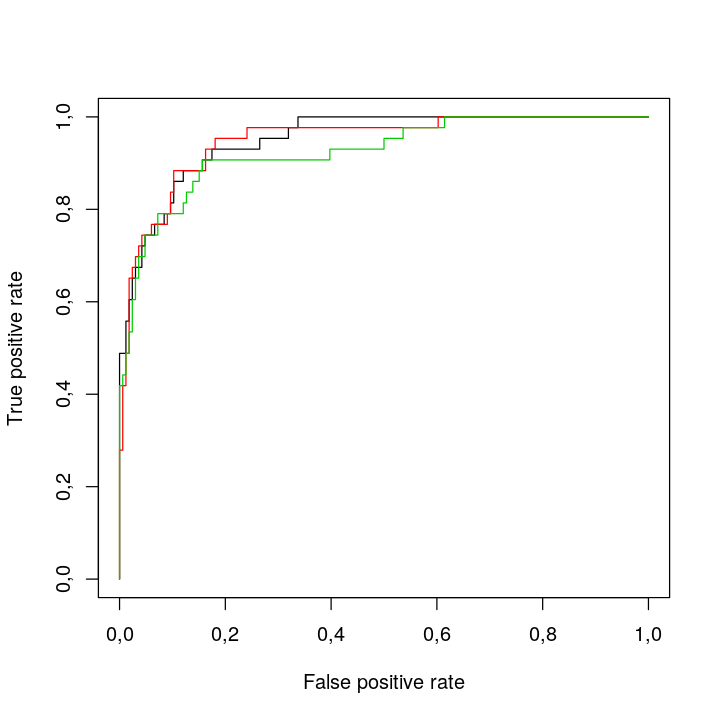

In [104]:
rocsvmr=pred.svmr/300
predsvmr=prediction(rocsvmr,datestq$DepSeuil)
perfsvmr=performance(predsvmr,"tpr","fpr")
# re-estimer le modèle pour obtenir des 
# probabilités  de classe plutôt que des classes
svm.dis=svm(DepSeuil~.,data=datappq,cost=1.25,
  probability=TRUE)
pred.svmq=predict(svm.dis,newdata=datestq,
  probability=TRUE)
rocsvmq=attributes(pred.svmq)$probabilities[,2]
predsvmq=prediction(rocsvmq,datestq$DepSeuil)
perfsvmq=performance(predsvmq,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfsvmr,col=2,add=TRUE) 
plot(perfsvmq,col=3,add=TRUE)  

**Q** Les SVM apportent-ils une amélioration?

**Réponse** une amélioration légère 

## Industrialisation de l'apprentissage
Un avantage de R est le nombre considérables d'utilisateurs qui participent au développement des librairies. cet avantage a un revers: le manque d'homogénéité de celles-ci. Pour y remédier dans les applications d'apprentissage machine, la (méta)librairie [`caret`](https://topepo.github.io/caret/) de [Max Kuhn (2008)](https://www.jstatsoft.org/article/view/v028i05) intègre dans un même usage, une même syntaxe, l'ensemble des fonctionnalités d'apprentissage et propose une approche unifiée des procédures d'optimisation des paramètres.

Les instructions suivantes reprennent rapidement les étapes précédentes afin d'introduire l'usage de `caret`. Elles se limitent à l'objectif de prévision de dépassement du seuil (classification). Le code pour modéliser la concentration par régression s'en déduit facilement.

### Calcul parallèle
Par ailleurs, même sous windows, `caret` offre simplement des possibilités de parallèlisation en utilisant la package `doParallel`. Même si les algorithmes des différentes méthodes d'apprentissage ne sont pas parallélisés, les itérations des calculs de validations croiser pour l'optimisation des paramètres sont effectivement parallélisés avec un gain de temps très appréciable fonciton du nombre de processeurs. Ceci est obtenu en exécutant les commandes suivantes en supposant que 4 processeurs sont disponibles.

In [105]:
 install.packages("doParallel")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [106]:
library(doParallel)
cl <- makeCluster(4)
registerDoParallel(cl) 

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


### Préparation des données
Les données sont celles initiales et la stratégie adoptée pour optimiser les modèles est la validation croisée. D’autres choix sont possibles (bootstrap). La librairie `caret` intègre des fonctions d’échantillonnage et de normalisation des données.

In [107]:
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19,0   Min.   : 46,4   Min.   :10,40   Aix:199  
 1:317   1st Qu.: 87,0   1st Qu.: 97,5   1st Qu.:20,20   Als:222  
         Median :109,0   Median :125,6   Median :23,80   Cad:202  
         Mean   :115,4   Mean   :127,2   Mean   :23,88   Pla:208  
         3rd Qu.:135,0   3rd Qu.:153,6   3rd Qu.:27,60   Ram:210  
         Max.   :319,0   Max.   :284,7   Max.   :38,00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0,1414   Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548  
 1st Qu.: 3,9623   1st Qu.:-0,3948   1st Qu.:0,08735   1st Qu.: 0,2215  
 Median : 5,5973   Median : 0,2783   Median :0,09925   Median : 0,7462  
 Mean   : 5,9072   Mean   : 0,1631   Mean   :0,09957   Mean   : 0,8440  
 3rd Qu.: 7,1063   3rd Qu.: 0,6926   3rd Qu.:0,11153   3rd Qu.: 1,4017  
 Max.   :19,8910   Max.   : 1,5708   Max.   :0,16592   Max.   : 3,7931  
      LNO           

In [108]:
 install.packages("ggplot2") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [109]:
library(caret)
# extraction des données
# Variable cible
Y=ozone[,"DepSeuil"]
# Variables explicatives
X=ozone[,-c(2,11)]
# Transformation des facteurs en indicatrices pour utiliser certains algorithmes
# notamment xgboost
library(FactoMineR)
X=data.frame(tab.disjonctif(X[,c(1,4)]),X[,-c(1,4)])
summary(Y);summary(X)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



FALSE  TRUE 
  863   178

       X0               X1              Aix              Als        
 Min.   :0,0000   Min.   :0,0000   Min.   :0,0000   Min.   :0,0000  
 1st Qu.:0,0000   1st Qu.:0,0000   1st Qu.:0,0000   1st Qu.:0,0000  
 Median :1,0000   Median :0,0000   Median :0,0000   Median :0,0000  
 Mean   :0,6955   Mean   :0,3045   Mean   :0,1912   Mean   :0,2133  
 3rd Qu.:1,0000   3rd Qu.:1,0000   3rd Qu.:0,0000   3rd Qu.:0,0000  
 Max.   :1,0000   Max.   :1,0000   Max.   :1,0000   Max.   :1,0000  
      Cad             Pla              Ram             MOCAGE     
 Min.   :0,000   Min.   :0,0000   Min.   :0,0000   Min.   : 46,4  
 1st Qu.:0,000   1st Qu.:0,0000   1st Qu.:0,0000   1st Qu.: 97,5  
 Median :0,000   Median :0,0000   Median :0,0000   Median :125,6  
 Mean   :0,194   Mean   :0,1998   Mean   :0,2017   Mean   :127,2  
 3rd Qu.:0,000   3rd Qu.:0,0000   3rd Qu.:0,0000   3rd Qu.:153,6  
 Max.   :1,000   Max.   :1,0000   Max.   :1,0000   Max.   :284,7  
     TEMPE          VentMOD           VentANG   

In [110]:
# indices de l’échantillon d’apprentissage
xx=11 # Changer cette valeur pour personnaliser l'échantillonnage
set.seed(xx)
inTrain = createDataPartition(X[,1],p = 0.8, list = FALSE)
# Extraction des échantillons
trainDescr=X[inTrain,]
testDescr=X[-inTrain,]
testY=Y[-inTrain]
trainY=Y[inTrain]

Certaines méthodes sont sensibles à des effets de variance ou d'unité des variables. Il est préférable d'introduire une normalisation.

In [111]:
# Normalisation calculée sur les paramètres de l'échantillon d'apprentissage
xTrans=preProcess(trainDescr)
trainDescr=predict(xTrans,trainDescr)
# Puis appliquée également à l'échantillon test
testDescr=predict(xTrans,testDescr)
# Choix de la validation croisée
cvControl=trainControl(method="cv",number=10)

### Estimation des modèles
La librairie intègre beaucoup de modèles ou méthodes (233!) et celles sélectionnées ci-dessous font partie des plus utilisées. Consulter   la   [liste   des   méthodes](http://topepo.github.io/caret/available-models.html)   disponibles   en option   de   la   fonction: `train`.  Le choix est en principe limité également aux méthodes acceptant des variables quantitatives et qualitatives mais, en transformant préalablement les variables qualitatives en paquets d'indicatrices (*dummies*) les autres méthodes sont accessibles. Exécuter chaque blocs de commandes pour tracer séparamment chacun des graphes afin de contrôler le bon comportement
de l’optimisation du paramètre de complexité de chaque modèle.

L'automatisation  de l'optimisation  de  certaines méthodes comme  la régression logistique est moins flexible qu’en utilisation  "manuelle"; en particulier pour le choix de l’algorithme de sélection de variables. Il faut se montrer (très) patient pour certaines optimisations alors que d'autres sont immédiates, voire inutiles. 

Le paramètre `tuneLength` caractérise  un "effort" d'optimisation, c'est en gros le nombre de valeurs de paramètres testées sur une grille fixée automatiquement. En prenant plus de soin et aussi plus de temps, il est possible de fixer précisément des grilles pour les valeurs du ou des paramètres optimisés pour chaque méthode. Néanmoins, comme expérimenté précédemment, il n'est pas toujours utile de passer beaucoup de temps à optimiser un paramètre. L'approche sommaire de `caret` s'avère souvent suffisante et l'optimisation d'un modèle, de sa complexité, peut être affinée après sélection de la méthode.

**Q** Dans chaque cas, identifier la méthode, préciser les paramètres associés et noter celui ou ceux optimisés par défaut par `caret`.

In [112]:
#1 Régression logistique
# Attention, la régression logistique sans interaction (linéaire) est estimée ci-dessous
set.seed(2)
rlogFit = train(trainDescr, trainY,method = "glmStepAIC", tuneLength = 10,
                trControl = cvControl, trace=FALSE)
rlogFit

Generalized Linear Model with Stepwise Feature Selection 

833 samples
 14 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 749, 750, 749, 750, 749, 749, ... 
Resampling results:

  Accuracy   Kappa    
  0,8824378  0,5487131


CART 

833 samples
 14 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 749, 750, 749, 750, 749, 749, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0,00000000  0,8608654  0,4926230
  0,02327327  0,8680800  0,4910456
  0,04654655  0,8632023  0,4872548
  0,06981982  0,8632023  0,4872548
  0,09309309  0,8619975  0,4913082
  0,11636637  0,8596022  0,4904804
  0,13963964  0,8596022  0,4904804
  0,16291291  0,8596022  0,4904804
  0,18618619  0,8596022  0,4904804
  0,20945946  0,8331521  0,2150705

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0,02327327.

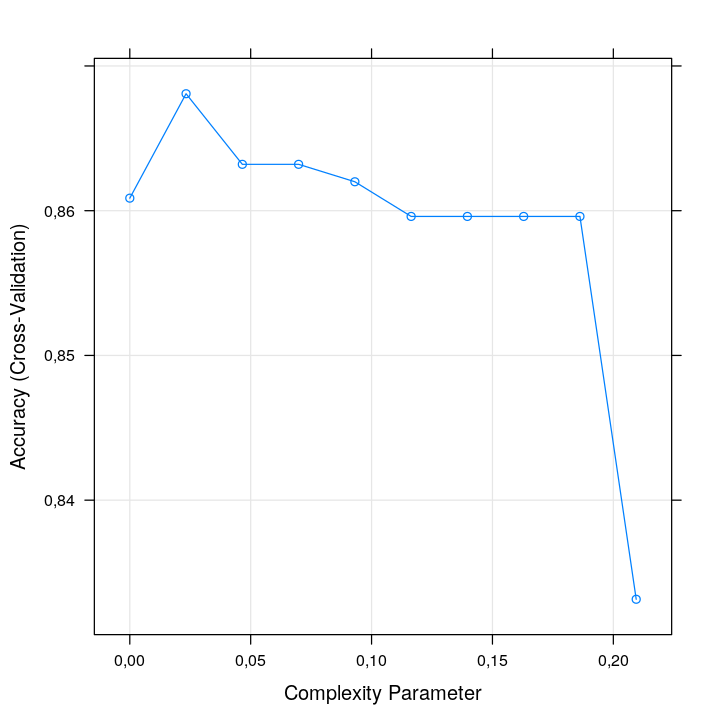

In [113]:
#2 Arbre de décision
set.seed(2)
rpartFit = train(trainDescr, trainY, method = "rpart", tuneLength = 10,
    trControl = cvControl)
rpartFit
plot(rpartFit)

**Réponse**
- La méthode `rpart`
- Parametres optimisés:
          cp    |   
      ----------+
      0.02327327| 

Neural Network 

833 samples
 14 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 749, 750, 749, 750, 749, 749, ... 
Resampling results across tuning parameters:

  size  decay         Accuracy   Kappa    
   1    0,0000000000  0,8630998  0,3846689
   1    0,0001000000  0,8777483  0,5155020
   1    0,0005623413  0,8777192  0,5085342
   1    0,0031622777  0,8692117  0,5293552
   1    0,0177827941  0,8741478  0,5403675
   1    0,1000000000  0,8693863  0,5321617
   3    0,0000000000  0,8283010  0,4371075
   3    0,0001000000  0,8500336  0,4906574
   3    0,0005623413  0,8523876  0,4819648
   3    0,0031622777  0,8356195  0,4353143
   3    0,0177827941  0,8609364  0,4797602
   3    0,1000000000  0,8694146  0,5250000
   5    0,0000000000  0,8451723  0,4747225
   5    0,0001000000  0,8378259  0,4335501
   5    0,0005623413  0,8561311  0,4738087
   5    0,0031622777  0,8513983  0,4985783
   5    0,0177827941  0,8548833 

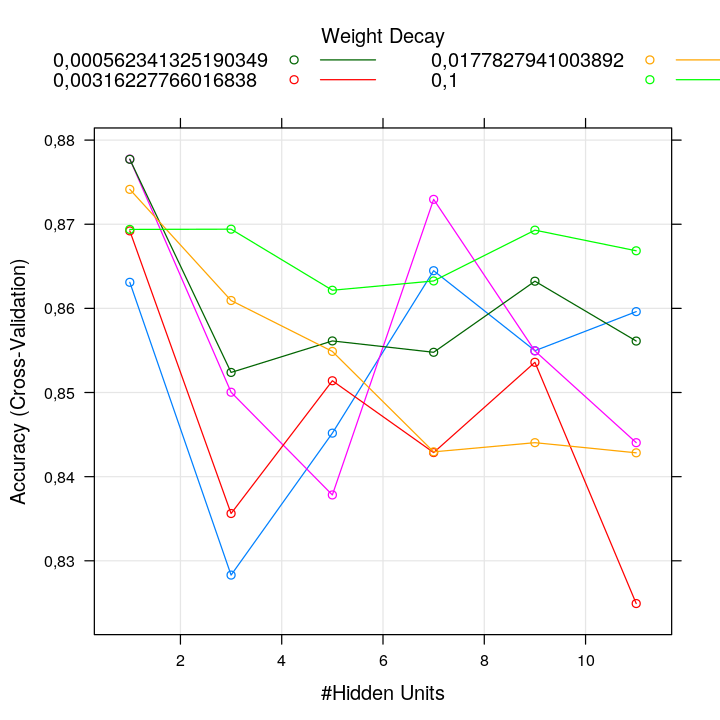

In [114]:

#3 Réseau de neurones
set.seed(2)
nnetFit = train(trainDescr, trainY, method = "nnet", tuneLength = 6,
                trControl = cvControl, trace=FALSE)
nnetFit
plot(nnetFit)

**Réponse**
- La méthode est  `nnet`
- Parametres optimisés:
      size |  decay  
      -----+-------
      1    | 1e-04

Random Forest 

833 samples
 14 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 749, 750, 749, 750, 749, 749, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0,8884629  0,5354073
   3    0,8932678  0,5649234
   5    0,8933112  0,5790526
   7    0,8909450  0,5760858
   8    0,8849492  0,5567080
  10    0,8885203  0,5724191
  12    0,8825102  0,5570439
  14    0,8813344  0,5454202

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.

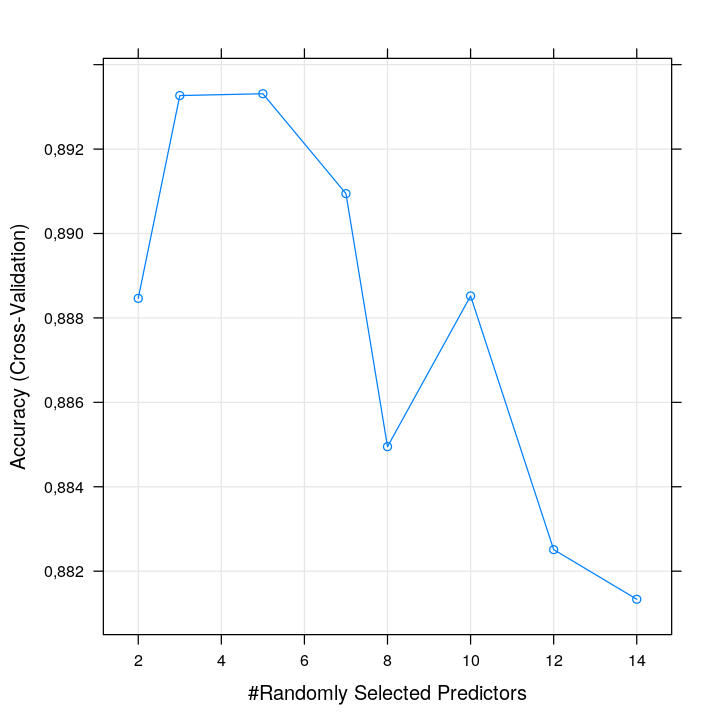

In [115]:
#4 Random forest
set.seed(2)
rfFit = train(trainDescr, trainY,method = "rf", tuneLength = 8,
              trControl = cvControl, trace=FALSE)
rfFit
plot(rfFit)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0,8650            -nan     0,1000    0,0255
     2        0,8079            -nan     0,1000    0,0235
     3        0,7631            -nan     0,1000    0,0162
     4        0,7270            -nan     0,1000    0,0145
     5        0,6983            -nan     0,1000    0,0090
     6        0,6673            -nan     0,1000    0,0092
     7        0,6442            -nan     0,1000    0,0048
     8        0,6255            -nan     0,1000    0,0067
     9        0,6095            -nan     0,1000    0,0022
    10        0,5917            -nan     0,1000    0,0046
    20        0,4838            -nan     0,1000    0,0019
    40        0,3873            -nan     0,1000   -0,0015
    50        0,3531            -nan     0,1000   -0,0005



Stochastic Gradient Boosting 

833 samples
 14 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 749, 750, 749, 750, 749, 749, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0,8765004  0,4911496
  1                  100      0,8801005  0,5174576
  1                  150      0,8836720  0,5448157
  1                  200      0,8860242  0,5637417
  1                  250      0,8908729  0,5788705
  1                  300      0,8920634  0,5790234
  1                  350      0,8896824  0,5760244
  1                  400      0,8872437  0,5742997
  2                   50      0,8824815  0,5300383
  2                  100      0,8812770  0,5503314
  2                  150      0,8824962  0,5463853
  2                  200      0,8789391  0,5484006
  2                  250      0,8813057  0,5602253
  2                  300      0,878

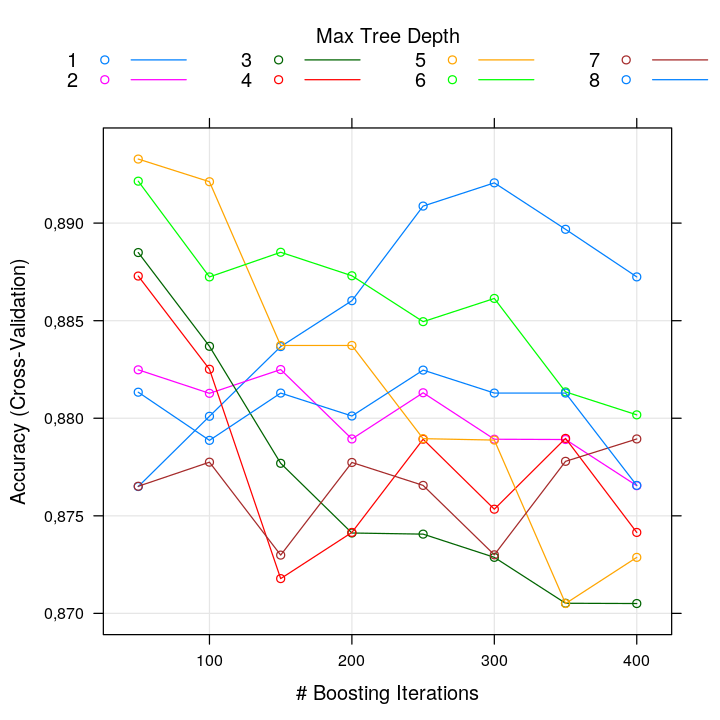

In [116]:
#5 Boosting 
set.seed(2)
gbmFit = train(trainDescr, trainY,method = "gbm", tuneLength = 8,
               trControl = cvControl)
gbmFit
plot(gbmFit)

In [123]:
xgbGrid <- expand.grid(nrounds = c(50,100),  # this is n_estimators in the python code above
                       max_depth = c(10, 15, 20),
                       colsample_bytree = seq(0.5, 0.9, length.out = 5),
                       ## The values below are default values in the sklearn-api. 
                       eta = 0.1,
                       gamma=0,
                       min_child_weight = 1,
                       subsample = 1
                      )

xgb_trcontrol = trainControl(
  method = "cv",
  number = 5,  
  allowParallel = TRUE,
  verboseIter = FALSE,
  returnData = FALSE
)

Comme l'algoritme *extreme gradient boosting* (approximation du gradient par décoposition de taylor et parallélisation des codes) est très présent dans les solutions des concours *Kaggle* celui-ci est testé. *Attention*, les bons résultats des concours sont obtenus au prix d'une lourde et complexe procédure d'optimisation des nombreux paramètres de cette approche; procédure rendue possible par la parallélisation avancée de la librairie [`xgboost`](https://xgboost.readthedocs.io/en/latest/) et l'utilisation de cartes graphiques (GPU). Si cet environnement n'est pas disponible l'optimisation est assez longue, même avec la parallélisation sur 4 processeurs...

In [122]:
#6 Extrême boosting
set.seed(2)
xgbFit = train(trainDescr, trainY,method = "xgbTree", tuneLength = 4,
               trControl = xgb_trcontrol, tuneGrid = xgbGrid, trace=FALSE)
xgbFit
plot(xgbFit)

### Prévision et erreur de test
Les méthodes sélectionnées et optimisées sont ensuite appliquées à la prévision de l’échantillon test. Estimation du taux de bien classés:

In [119]:
models=list(logit=rlogFit,cart=rpartFit,nnet=nnetFit,rf=rfFit,gbm=gbmFit,xgb=xgbFit)
testPred=predict(models, newdata = testDescr)
# taux de bien classés
lapply(testPred,function(x)mean(x==testY))

ERROR: Error in eval(expr, envir, enclos): objet 'xgbFit' introuvable


Tracer  les  courbes  ROC  pour  analyser  spécificité  et  sensibilité  des  différentes  méthodes.  

Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”Warning message in plot.window(...):
“"add" n'est pas un paramètre graphique”

ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies


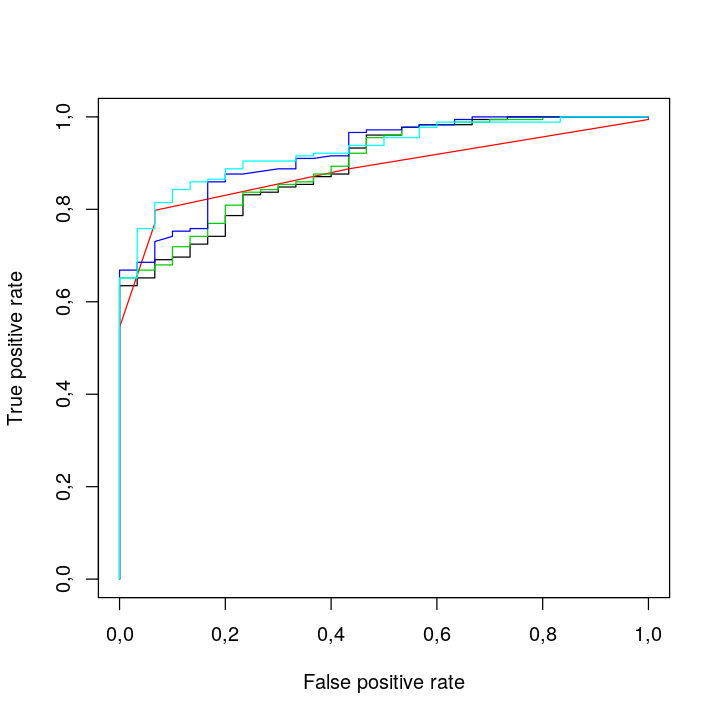

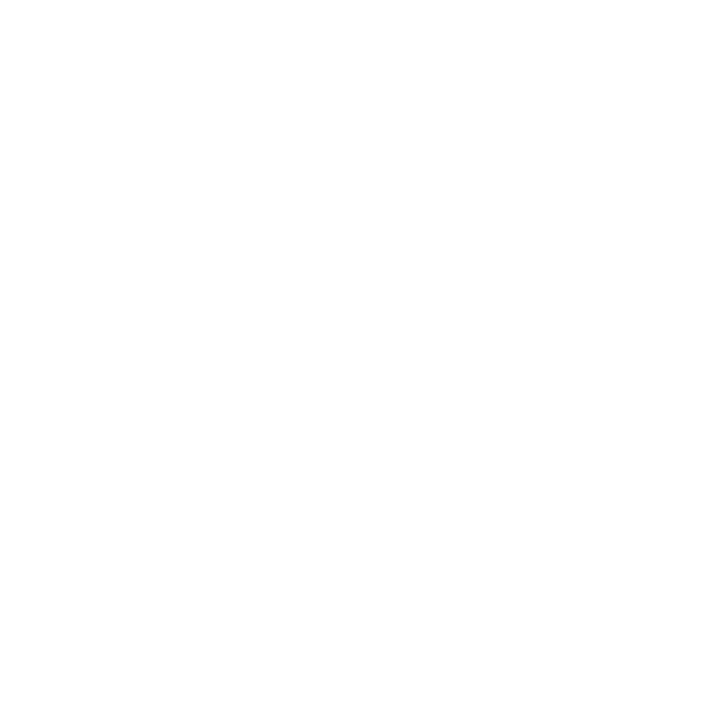

In [120]:
library(ROCR)
models=list(logit=rlogFit,cart=rpartFit,nnet=nnetFit,rf=rfFit,gbm=gbmFit)
testProb=predict(models, newdata = testDescr,type="prob")
predroc=lapply(testProb,function(x)prediction(x[,1],testY==FALSE))
perfroc=lapply(predroc,
function(x)performance(x, "tpr", "fpr"))
plot(perfroc$logit,col=1)
plot(perfroc$cart,col=2,add=TRUE)
plot(perfroc$nnet,col=3,add=TRUE)
plot(perfroc$rf,col=4,add=TRUE)
plot(perfroc$gbm,col=5,add=TRUE)
plot(perfroc$xgb,col=6,add=TRUE)
legend("bottomright",legend=c("logit","CART","nnet","RF","boost","xgBoost"),col=c(1:6),pch="_")

### [Validation croisée *Monte Carlo*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf)
L'échantillon est de faible taille (#200), et les estimations des taux de bien classés comme le tracé des courbes ROC sont très dépendants de l’échantillon test; on peut s’interroger sur l’identité du modèle le plus performant ainsi que sur la significativité des différences observées entre les méthodes. Il est donc important d’itérer le processus (validation croisée *Monte Carlo*) sur plusieurs échantillons tests. Exécuter la fonction en annexe en choisissant les méthodes semblant les plus performantes. Attention au temps de calcul ! CART peut performant est supprimé.

In [121]:
# Choisir la liste des méthodes et l’effort d’optimisation
models=c("gbm","rf","nnet","glmStepAIC","xgbTree")
noptim=c(6,6,6,6,6)
# Initialiser le générateur et fixer le nombre d’itérations
# Changer ces valeurs. Attention au temps de calcul! Être patient!
Niter=10 ; Init=11  
# Appel de la fonction définie en annexe
pred.ozone=pred.autom(X,Y,methodes=models,N=Niter,xinit=Init,size=noptim,type="prob")

ERROR: Error in pred.autom(X, Y, methodes = models, N = Niter, xinit = Init, : impossible de trouver la fonction "pred.autom"


Puis calculer et représenter les erreurs pour les méthodes considérées

In [200]:
# Calcul des taux de bien classés
obs=pred.ozone$obs
prev.ozone=pred.ozone$pred
res.ozone=lapply(prev.ozone,function(x)apply((x>0.5)==(obs==1),2,mean))
# Moyennes des taux de bien classés par méthode
lapply(res.ozone,mean)
# distributions des taux de bien classés
boxplot(data.frame(res.ozone))

ERROR: Error in eval(expr, envir, enclos): objet 'pred.ozone' introuvable


Les commandes suivandes tracent les courbes ROC moyennes.

In [ ]:
## Comparaison des méthodes par le
# tracer des courbes ROC moyennes
# Problème pas identifié avec rlogit!
predroc.ozone=lapply(prev.ozone,function(x)prediction(x,obs==1))
perfroc.ozone=lapply(predroc.ozone,function(x)performance(x,"tpr","fpr"))
plot(perfroc.ozone$gbm,col=1,lwd=2,avg="vertical")
plot(perfroc.ozone$rf,col=2,add=TRUE,lwd=2,avg="vertical")
plot(perfroc.ozone$nnet,add=TRUE,col=3,lwd=1.5,avg="vertical")
plot(perfroc.ozone$xgbTree,add=TRUE,col=4,lwd=1.5,avg="vertical")
plot(perfroc.ozone$glmStepAIC,add=TRUE,col=5,lwd=1.5,avg="vertical")
legend("bottomright",legend=c("boost","RF", "nnet","xgBoost","logit"),col=c(1:5),pch="_")

**Q** Quelle méthode retenir, en fonction du taux de faux positif acceptable, pour prévoir le dépassement du seuil? Et si le comanditaire veut une solution explicable?

La même démarche réalisée sur la prévision de concentration avant de prédire le dépassement du seuil conduit à des résutlats similaire. 

*N.B.* 
* Ce n'est pas la régression logistique avec interactions (quadratique) qui a été testée dans cette dernière comparaison
* L'algorithme xgboost nécessiterait des efforts plus important d'optimisation des paramètres mais le coût de calcul s'en ressent. A tester en Python avec un accès à une carte GPU.

# <FONT COLOR="Red">Épisode 5</font>
**Remarque** Il est possible d'exécuter directement l'*épisode 5* sans passer par toutes les étapes de classification supervisée. Il suffit d'exécuter les *sections 2 et 3* de l'*épisode 1*, phase exploratoire, afin de construire les données utilisées dans les sections 13 et 14 d'imputation des données manquantes et de détection d'atypiques.

## [Gestion des données manquantes](http://wikistat.fr/pdf/st-m-app-idm.pdf)
Les vraies données sont le plus souvent mitées par l'absence de données, conséquences d'erreurs de saisie, de pannes de capteurs... Les librairies de R offrent de très nombreux choix pour faire des imputations de données manquantes quand celles-ci le sont de façon complètement aléatoire. Il n'est pas question de toutes les aborder sur ces données, ce serait particulièrement fastidieux. Seules deux stratégies sont exécutées et comparées après avoir généré aléatoirement un pourcentage de défaillances (trous) dans les valeurs des variables explicatives. 

La **première stratégie** commence par imputer les données manquantes en les prévoyant par toute une batterie de modèles. 

**Q** Pourquoi la structure de la base des variables explicatives incite à exécuter l'algorithme missForest de la librairie éponyme? 

Une fois les données manquantes imputées, différentes méthodes de prévision sont utilisables comme précédemment. Deux sont exécutées: forêts aléatoires et *extrem gradient boosting*.

La **deuxième stratégie** évite l'étape d'imputation en exécutant directement un algorithme de prévision tolérant des données manquantes. Peu le fond, c'est le cas de `XGBoost`.

Attention, les commandes ci-dessous font appel à de nombreux fichiers qu'il est facile de mélanger.
- `X` données complètes initiales et `Xd` la version où les variables qualitatives sont remplacées par des indicatrices, 
- `Xna` les données avec des trous, `Xdna` la version avec indicatrices,
- `XnaImp` les données avec imputations et `XdnaImp` la version avec indicatrices.

Le remplacement des variables qualitatives par des variables indicatrices est imposé par l'utilisation de la librairie `XGBoost` et cela ne change en rien les résultats des forêts aléatoires.

### Préparation des trous dans `ozone`
Les données initiales de la base `ozone` sont reprises. Seule la variable à expliquer de dépassement de seuil est conservée. La librairie `missForest`propose une fonction pour générer un pourcentage fixé a priori de données manquantes dans une base.

In [124]:
# Variable cible
Y=ozone[,"DepSeuil"]
# Variables explicatives
X=ozone[,-c(2,11)]
n=nrow(X); p=ncol(X)
summary(Y); summary(X)

FALSE  TRUE 
  863   178

 JOUR        MOCAGE          TEMPE       STATION      VentMOD       
 0:724   Min.   : 46,4   Min.   :10,40   Aix:199   Min.   : 0,1414  
 1:317   1st Qu.: 97,5   1st Qu.:20,20   Als:222   1st Qu.: 3,9623  
         Median :125,6   Median :23,80   Cad:202   Median : 5,5973  
         Mean   :127,2   Mean   :23,88   Pla:208   Mean   : 5,9072  
         3rd Qu.:153,6   3rd Qu.:27,60   Ram:210   3rd Qu.: 7,1063  
         Max.   :284,7   Max.   :38,00             Max.   :19,8910  
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548   Min.   :-6,9078  
 1st Qu.:-0,3948   1st Qu.:0,08735   1st Qu.: 0,2215   1st Qu.:-1,4439  
 Median : 0,2783   Median :0,09925   Median : 0,7462   Median :-0,9467  
 Mean   : 0,1631   Mean   :0,09957   Mean   : 0,8440   Mean   :-0,8399  
 3rd Qu.: 0,6926   3rd Qu.:0,11153   3rd Qu.: 1,4017   3rd Qu.:-0,2957  
 Max.   : 1,5708   Max.   :0,16592   Max.   : 3,7931   Max.   : 2,2438  

In [128]:
library(missForest)
# faire une proportion tauxNA de trous aléatoires dans X
# Données missing at random
tauxNa=0.1
set.seed(11)
Xna=prodNA(X,tauxNa)
summary(Xna)


Loading required package: itertools


   JOUR         MOCAGE           TEMPE       STATION       VentMOD       
 0   :646   Min.   : 46,40   Min.   :10,40   Aix :178   Min.   : 0,1414  
 1   :297   1st Qu.: 97,78   1st Qu.:20,20   Als :199   1st Qu.: 3,9774  
 NA's: 98   Median :126,10   Median :23,90   Cad :184   Median : 5,5938  
            Mean   :127,60   Mean   :23,92   Pla :185   Mean   : 5,9417  
            3rd Qu.:153,93   3rd Qu.:27,60   Ram :184   3rd Qu.: 7,1037  
            Max.   :284,70   Max.   :38,00   NA's:111   Max.   :19,8910  
            NA's   :117      NA's   :105                NA's   :93       
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548   Min.   :-6,9078  
 1st Qu.:-0,3952   1st Qu.:0,08801   1st Qu.: 0,2329   1st Qu.:-1,4271  
 Median : 0,2736   Median :0,09975   Median : 0,7481   Median :-0,9365  
 Mean   : 0,1592   Mean   :0,10006   Mean   : 0,8467   Mean   :-0,8334  
 3rd Qu.: 0,6823   3rd Qu.:0,11216   3rd Qu

In [126]:
install.packages("missForest")

also installing the dependency ‘itertools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [129]:
mean(c(98,117,105,111,93,109,106,89,108))

[1] 104

**Q** Quel est en moyenne le nombre de données manquantes par colonne?

**Réponse** 104

### Imputation
Connaissant les "vraies" données initiales, il est possible, dans ce cas de calculer des erreurs d'imputation de `missForest`.

**Q** Quelles sont elles? Quelles estimation de l'erreur est fournie quand les données manquantes le sont vraiment?


**Réponse** 
*NRMSE 
*PFC

In [130]:
XnaImp=missForest(Xna,xtrue=X)

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!


In [131]:
XnaImp$OOBerror;XnaImp$error

NRMSE       PFC 
0,1828795 0,3076877

NRMSE       PFC 
0,2046132 0,3062201

Vérifier que les imputations sont réalisées.

In [132]:
summary(XnaImp$ximp)

 JOUR        MOCAGE          TEMPE       STATION      VentMOD       
 0:722   Min.   : 46,4   Min.   :10,40   Aix:199   Min.   : 0,1414  
 1:319   1st Qu.: 98,0   1st Qu.:20,40   Als:220   1st Qu.: 4,0050  
         Median :126,0   Median :23,70   Cad:200   Median : 5,5703  
         Mean   :127,4   Mean   :23,91   Pla:207   Mean   : 5,9278  
         3rd Qu.:153,3   3rd Qu.:27,60   Ram:215   3rd Qu.: 7,0456  
         Max.   :284,7   Max.   :38,00             Max.   :19,8910  
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1,5708   Min.   :0,05339   Min.   :-1,3548   Min.   :-6,9078  
 1st Qu.:-0,3430   1st Qu.:0,08857   1st Qu.: 0,2374   1st Qu.:-1,4313  
 Median : 0,2582   Median :0,09960   Median : 0,7448   Median :-0,9493  
 Mean   : 0,1650   Mean   :0,09993   Mean   : 0,8457   Mean   :-0,8396  
 3rd Qu.: 0,6611   3rd Qu.:0,11077   3rd Qu.: 1,4004   3rd Qu.:-0,3011  
 Max.   : 1,5708   Max.   :0,16592   Max.   : 3,7931   Max.   : 2,2438  

Comme précédemment, l'utilisation de `XGBoost` impose de transformer les facteurs en indicatrices.

In [133]:
library(FactoMineR)
# données complètes
Xd=data.frame(tab.disjonctif(X[,c(1,4)]),X[,-c(1,4)])
# données avec trous
Xdna=data.frame(tab.disjonctif(Xna[,c(1,4)]),Xna[,-c(1,4)]) 
# données avec imputations
XdnaImp=data.frame(tab.disjonctif(XnaImp$ximp[,c(1,4)]),XnaImp$ximp[,-c(1,4)]) 

La librairie `caret` facilite beaucoup la syntaxe pour l'exécution de `xgboost`. elle est reprise. Il faudrait sinon transformer les données sous un autre format. C'est intégré par `caret`.

Construction des mêmes échantillons d'apprentissage et de test dans les trois cas: données initiales, manquantes, imputées.

In [1]:
library(caret)
# parallélisation
library(doParallel)
cl <- makeCluster(4)
registerDoParallel(cl) 
# indices de l’échantillon d’apprentissage
xx=11 # Changer cette valeur pour personnaliser l'échantillonnage
set.seed(xx)
inTrain = createDataPartition(X[,1],p = 0.8, list = FALSE)
# Extraction des échantillons
trainDescr=Xd[inTrain,]
testDescr=Xd[-inTrain,]
# Les mêmes avec trous
trainDescrNA=Xdna[inTrain,]
testDescrNA=Xdna[-inTrain,]
# Les mêmes avec données manquantes imputées
trainDescrNAimp=XdnaImp[inTrain,]
testDescrNAimp=XdnaImp[-inTrain,]
testY=Y[-inTrain]
trainY=Y[inTrain]
cvControl=trainControl(method="cv",number=10)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


ERROR: Error in createDataPartition(X[, 1], p = 0.8, list = FALSE): objet 'X' introuvable


In [135]:
# prévision avec random forest sur données initiales
set.seed(2)
rfFit = train(trainDescr, trainY,method = "rf", tuneLength = 8,
              trControl = cvControl, trace=FALSE)

In [ ]:
# Prévision avec XGBoost sur données initiales
set.seed(2)
xgbFit = train(trainDescr, trainY,method = "xgbTree", tuneLength = 6,
               trControl = cvControl, trace=FALSE)

**Q** Pendant que `XGBoost` tourne, réviser les [principes de cet algorithme](http://wikistat.fr/pdf/st-m-app-agreg.pdf).

In [ ]:
# erreur de prévision sur le test avec données initiales
models=list(rf=rfFit,xgb=xgbFit)
testPred=predict(models, newdata = testDescr)
# taux de bien classés
lapply(testPred,function(x)mean(x==testY))

In [ ]:
# Prévision avec random forest sur données imputées
set.seed(2)
rfFitNAimp = train(trainDescrNAimp, trainY,method = "rf", tuneLength = 8,
              trControl = cvControl, trace=FALSE)

In [ ]:
# Prévision avec XGBoost sur données imputées
xgbFitNAimp = train(trainDescrNAimp, trainY,method = "xgbTree", tuneLength = 6,
               trControl = cvControl, trace=FALSE)

**Q** Pendant que `XGBoost` tourne, réviser les [principes de missForest](http://wikistat.fr/pdf/st-m-app-idm.pdf).

In [ ]:
# erreur de prévision sur le test avec données imputées
models=list(rfNAimp=rfFitNAimp,xgbNAimp=xgbFitNAimp)
testPred=predict(models, newdata = testDescrNAimp)
# taux de bien classés
lapply(testPred,function(x)mean(x==testY))

### Prévision sans imputation 

La phase d'imputation est rendue obligatoire par l'usage de nombreuses méthodes qui n'acceptent pas les données manquantes. Il peut être intéressant de s'en passer car les informations reconstruites ne sont pas utilisables à d'autres fins; `XGBoost` offre cette oppotunité. Pendant qu'il tourne, [essayer de comprendre](https://arxiv.org/abs/1603.02754) les astuces mises en oeuvre pour tolérer des données manquanres.

In [ ]:
# Prévision avec XGBoost avec données manquantes
xgbFitNA = train(trainDescrNA, trainY,method = "xgbTree", tuneLength = 6,
               trControl = cvControl, trace=FALSE)

In [ ]:
# Erreur de prévision avec XGBoot tolérant les données manquantes.
testPred=predict(xgbFitNA, newdata = testDescrNA)
mean(testPred==testY)

**Q** Comparer les résultats obtenus par les différents stratégies. En tenant compte des temps de calcul, laquelle semble la plus efficace sur ces données. 

*NB* L'utilisation avancée de `XGBoost` nécessite plus de puissance de calcul afin d'affiner le réglage des nombreux paramètres.

**Q** Qu'en serait-il en utlisant Python au lieu de R?

## Détection d'observations atypiques ou anomalies
La détection d'observations *atypiques*, *anomalies* ou *outliers* nommée également *OCC* (*One Class Classification*) ou *novelty detection* est source d'une très abondante bibliographie; voir par exemple [Aggarwal 2016](http://www.charuaggarwal.net/outlierbook.pdf). A ne pas confondre avec les modèles de *valeurs extrêmes*, les valeurs atypiques dans le cas unidimensionnel sont généralement traitées en référence à des modèles paramétriques: gaussien ou autre, qui caractérisent la "normalité". Systématiquement et également dans le cas multidimensionnelle, la notion d'anomalie est définie relativement à un modèle et sous le contrôle d'un paramètre à "régler". Le modèle est paramétrique ou non, local ou global. Par example dans le cas du modèle linéaire, la distance de Cook est un indicateur de points influents ou atypique par rapport au modèle.

R propose quelques librairies et fonctions de détection d'atypiques. 
- [`outliers`](https://cran.r-project.org/web/packages/outliers/outliers.pdf) propose un ensemble de tests univariés.
- [`Rlof`]() propose une version parallélisée du calcul du score LOF (*Local Factor Outlier*). Une estimation locale de la denisité en un point est comparée à celle de ses voisins. 
- [`dbscan`](https://cran.r-project.org/web/packages/dbscan/dbscan.pdf) propose en ples d'algorihtmes de classification non-superviée originaux, le calcul de `glosh` (*Global-Local Outlier Score from Hierarchies*).
- [`kernlab`](http://ftp.auckland.ac.nz/software/CRAN/doc/vignettes/kernlab/kernlab.pdf) propose une option de *One Class Classification SVM* qui cherche à séparer l'origine de l'ensemble des points; `e1071`le propose aussi mais avec des problèmes d'exécution!
- [`randomForest`](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#micro7) estime, dans le cas supervisé lorsque une variable explicative est connue, une notion de "distance" de chaque point avec ses voisins en considérant les co-appartenances des points aux mêmes feuilles des arbres. Dans le cas contraire, comme pour la situation d'OCC, une approche non supervisée consiste à générer tout un ensemble d' observations atypiques avant de construire un modèle prédisant pour chaque observation la variable échantillon initiale *vs.* atypique simulé. La notion précédente de "distance" est à nouveau utilisé comme score d'atypicité.

Quelques cas sont considérés ici.

Ce traitement intervient dans ce tutoriel avec une finalité essentiellement pédagogique. Il n'est pas indispensale sur ces données, relativement cohérentes alors que l'objectif poursuivit n'est pas la recherche d'une défaillance contrairement à une situation du domaine industriel: suivi de fabrication ou de fonctionnement. 

Néanmoins, sur tout jeu de données, l'étape préalable exploratoire peut inclure la recherche d'observations atypiques multidimensionnelles qui permettraient d'identifier des incohérences de mesure en complément des études unidimensionnelles de la première partie.

Considérons quatre approches suivant des principes très différents parmi bien d'autres. Elles vont permettre d'identifier des observations atypiques avant de les représenter dans l'ACP.
### *Local Outlier Factor*
Les données sont restreintes aux seules variables quantitatives explicatives.

**Q** Quel est le rôle du paramètre *k* ci-dessous?

In [ ]:
library(Rlof)
ozoneR=ozone[,-c(1,2,5,11)]
atypLof=lof(ozoneR,k=c(3:7),cores=3)
options(repr.plot.width=3, repr.plot.height=4)
boxplot(atypLof)

In [ ]:
table(atypLof[,1]>1.5,Y)

**Q** Comment intervient la borne 1.5? A quelles classe appartiennent majoritairement les observations jugées atypiques.

In [ ]:
atypLofInd=which(atypLof[,1]>1.5)
coul=as.integer(ozone[,"DepSeuil"])+2
taille=rep(0.5,length(coul))
acp=princomp(ozoneR,cor=TRUE)
options(repr.plot.width=4, repr.plot.height=4)
coul[atypLofInd]=2
taille[atypLofInd]=.8
plot(acp$scores,col=coul, pch=17+coul-2,cex=taille)

**Q** Que dire de la localisation des observations atypiques dans le plan de l'acp?

### *Global-Local Outlier Score from Hierarchies* 
Les scores proches de 1 signalent des atypiques.

In [ ]:
library(dbscan)
atypGlosh=glosh(as.matrix(ozoneR),k=3)
options(repr.plot.width=2, repr.plot.height=4)
boxplot(atypGlosh)

In [ ]:
table(atypLof[,1]>1.5,atypGlosh>0.82)

**Q** Que dire de ces deux critères?

In [ ]:
atypGloshInd=which(atypGlosh>0.82)
coul=as.integer(ozone[,"DepSeuil"])+2
taille=rep(0.5,length(coul))
coul[atypGloshInd]=2; taille[atypGloshInd]=.8
options(repr.plot.width=4, repr.plot.height=4)
plot(acp$scores,col=coul, pch=17+coul-2,cex=taille)

### *One Class Classification SVM*
**Q** Quel est le rôle du paramètre `nu`?

In [ ]:
library(kernlab)
ozoneOcc=ksvm(x=as.matrix(ozoneR),y=NULL,type="one-svc",
              kernel="rbfdot",nu = 0.005)
atypOcc=!fitted(ozoneOcc)
ozoneOcc

In [ ]:
coul=as.integer(ozone[,"DepSeuil"])+2
taille=rep(.5,length(coul))
options(repr.plot.width=4, repr.plot.height=4)
coul[atypOcc]=2
taille[atypOcc]=0.8
plot(acp$scores,col=coul, pch=17+coul-2,cex=taille)

**Q** Même question sir la répartition des observations atypiques.

In [ ]:
table(atypLof[,1]>1.5,atypOcc)

**Q** Comment interpréter la table ci-dessus?

### Anomalies au sens de *random forest*
#### Cas supervisé
La première approche prend en compte la variable explicative et considère donc les observations les plu sen en marge du modèle.

In [ ]:
library(randomForest)
Y=ozone[,11]
X=ozone[,-c(2,11)]
ozoneRF=randomForest(X,Y,proximity=TRUE)
atypRF=outlier(ozoneRF)
options(repr.plot.width=2, repr.plot.height=3)
boxplot(atypRF)

In [ ]:
atypRFInd=which(atypRF>20)
coul=as.numeric(Y)+2
options(repr.plot.width=4, repr.plot.height=4)
plot(atypRF,type="h",col=coul)
legend("topright",legend=levels(Y),text.col=c(3:4))

In [ ]:
table(atypRF>20,Y)

**Q** Que dire de la répartition des atypiques par rapport à la variable de dépassement de seuil.

In [ ]:
coul=as.integer(ozone[,"DepSeuil"])+2
taille=rep(.5,length(coul))
acp=princomp(ozoneR,cor=TRUE)
options(repr.plot.width=4, repr.plot.height=4)
coul[atypRFInd]=2
taille[atypRFInd]=.8
plot(acp$scores,col=coul, pch=17+coul-2,cex=taille)

**Q** Commenter la répartition des atypiques au sens de **Random Forest** supervisée. Serait-il raisonnable de supprimer ces observations ?

**Remarque** Si la variable à expliquer *Y* est telle que l'on soupçonne des possibles erreur de label, ce peut être une façon de les détecter.

#### Cas non-supervisé
Moins connue, Breiman à proposé une version [non-supervisée](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#unsup) de randomForest. Elle fournit *in fine* le même type de critère mais sans faire intervenir *Y*.

In [ ]:
set.seed(11)
ozoneURF <- randomForest(x=ozoneR,y=NULL,proximity=TRUE)
atypURF=outlier(ozoneURF)
options(repr.plot.width=2, repr.plot.height=3)
boxplot(atypURF)
#MDSplot(ozoneURF, ozone$Depseuil)

In [ ]:
atypURFInd=which(atypURF>2.5)
coul=as.numeric(Y)+2
options(repr.plot.width=4, repr.plot.height=4)
plot(atypURF,type="h",col=coul)
legend("topright",legend=levels(Y),text.col=c(3:4))

In [ ]:
coul=as.integer(ozone[,"DepSeuil"])+2
taille=rep(.5,length(coul))
options(repr.plot.width=4, repr.plot.height=4)
coul[atypURFInd]=2
taille[atypURFInd]=.8
plot(acp$scores,col=coul, pch=17+coul-2,cex=taille)

In [ ]:
table(atypURF>2.5,atypLof[,1]>1.5)
table(atypURF>2.5,atypOcc)
table(atypLof[,1]>1.5,atypURF>2.5)

**Q** Que dire sur la correspondance entre les trois stratégies de détection d'observations atypiques?

**Q** Qu'est-ce qui psermettrait d'en choisir une parmi les trois ou parmi les très nombreuses autres disponibles dans la littérature?

## Annexe: Fonction de validation croisée *Monte Carlo*
*N* réplications des estimations / prévisions

In [ ]:
pred.autom=function(X,Y,p=1/2,methodes=c("knn",
"rf"),size=c(10,2),xinit=11,N=10,typerr="cv",
number=4,type="raw") {
# Fonction de prévision de N échantillons tests
# par une liste de méthodes de régression
# ou classification (uniquement 2 classes)
# Optimisation des paramètres par validation
# croisée (défaut) ou bootstrap ou... (cf. caret)
# X : matrice ou frame des variables explicatives
# Y : variable cible quantitative ou qualitative
# p : proportion entre apprentissage et test
# methodes : liste des méthodes de rdiscrimination
# size : e grille des paramètres à optimiser
# xinit : générateur de nombres aléatoires
# N : nombre de réplications apprentissage/test
# typerr : "cv" ou "boo" ou "oob"
# number : nombre de répétitions CV ou bootstrap
# pred : liste des matrices de prévision
# type d’erreur
Control=trainControl(method=typerr,number=number)
# initialisation du générateur
set.seed(xinit)
# liste de matrices stockant les prévisions
# une par méthode
inTrain=createDataPartition(Y,p=p,list=FALSE)
ntest=length(Y[-inTrain])
pred=vector("list",length(methodes))
names(pred)=methodes
pred=lapply(pred,function(x)x=matrix(0,
nrow=ntest,ncol=N))
obs=matrix(0,ntest,N)
set.seed(xinit)
for(i in 1:N) {
# N itérations
# indices de l’échantillon d’apprentissage
inTrain=createDataPartition(Y,p=p,list=FALSE)
# Extraction des échantillons
trainDescr=X[inTrain,]
testDescr=X[-inTrain,]
trainY=Y[inTrain]
testY=Y[-inTrain]
# stockage des observés de testY
obs[,i]=testY
# centrage et réduction des variables
xTrans=preProcess(trainDescr)
trainDescr=predict(xTrans,trainDescr)
testDescr=predict(xTrans,testDescr)
# estimation et optimisation des modèles
# pour chaque méthode de la liste
for(j in 1:length(methodes)) {
# modélisation
modFit = train(trainDescr, trainY,method = methodes[j], tuneLength = size[j],
               trControl = Control)
# prévisions
if (type=="prob")  pred[[j]][,i]=predict(modFit,
newdata = testDescr,type=type)[,1]
else pred[[j]][,i]=predict(modFit,
newdata = testDescr)
}}
list(pred=pred,obs=obs)
# résultats
}